In [ ]:
day
from google.colab import drive
drive.mount('/content/drive')

dct_compress_path = "/content/drive/MyDrive/dct_images"
# facial_age_zip_path = "/content/drive/My Drive/Age_Classification_with_Faces_datasets/ZIPPED_DATASETS/facial-age.zip"

Mounted at /content/drive


In [ ]:
print(dct_compress_path)

/content/drive/MyDrive/dct_images


In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from matplotlib.image import imread
from tqdm.notebook import tqdm
import os

def dct_compress(img, k):
    # Convert the image to grayscale and floating point
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.float32(img)

    # Apply DCT
    dct = cv2.dct(img)

    # Keep only the top k coefficients
    dct[k:, k:] = 0

    # Inverse DCT and convert back to 8-bit integer
    compressed_img = cv2.idct(dct)
    compressed_img = np.clip(compressed_img, 0, 255)
    compressed_img = np.uint8(compressed_img)

    return compressed_img

# Set the value of k for the DCT compression
k = 15

# Load the image files $ setting the path
uploaded = os.listdir(dct_compress_path)
path = '/content/drive/MyDrive/dct_images/'

# Create a directory for the compressed image in google drive
import os

if not os.path.exists("/content/drive/My Drive/compressed_images_15"):
  os.makedirs("/content/drive/My Drive/compressed_images_15")

# Get the file name and data for the uploaded image
for filename in tqdm(uploaded):
  img_path = imread(path + filename)
  # Decode the image data into a NumPy array
  # img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_UNCHANGED)

  # Compress the image using DCT
  compressed_img = dct_compress(img_path, k)

# Save the compressed image in the google drive storage
  with open("/content/drive/My Drive/compressed_images_15/compressed_" + filename, "wb") as f:
    f.write(cv2.imencode('.jpg', compressed_img)[1])


# Show the original and compressed images
# cv2_imshow(img_path)
# cv2_imshow(compressed_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


  0%|          | 0/1415 [00:00<?, ?it/s]

In [ ]:
print(img_path)

[[[163 192 198]
  [168 197 203]
  [167 196 202]
  ...
  [165 189 193]
  [167 191 195]
  [170 194 198]]

 [[164 193 199]
  [170 199 205]
  [173 202 208]
  ...
  [163 187 191]
  [165 189 193]
  [167 191 195]]

 [[157 186 192]
  [163 192 198]
  [168 197 203]
  ...
  [163 187 191]
  [164 188 192]
  [165 189 193]]

 ...

 [[175 206 209]
  [176 207 210]
  [176 207 210]
  ...
  [ 51  51  39]
  [ 52  52  40]
  [ 52  52  40]]

 [[172 203 206]
  [173 204 207]
  [173 204 207]
  ...
  [ 44  44  32]
  [ 46  46  34]
  [ 47  47  35]]

 [[175 206 209]
  [176 207 210]
  [177 208 211]
  ...
  [ 42  42  30]
  [ 44  44  32]
  [ 46  46  34]]]


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil

In [ ]:
#from keras.preprocessing import image
import keras
import tensorflow as tf
import keras.utils as image
from keras.utils import load_img, img_to_array
# Function to Extract features from the images
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='/content/drive/My Drive/compressed_images'+'/'+i
        img = keras.utils.load_img(fname, target_size=(224, 224))
        #img = img_to_array(img)
        #img=image.load_img(fname,target_size=(224,224))
        #img=image.load_img(fname,target_size=(224,224))
        #img = imread(fname)
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
img_path=os.listdir('/content/drive/My Drive/compressed_images')

In [ ]:
img_features, img_name=image_feature(img_path)

87910968/87910968 [==============================] - 0s 0us/step


  0%|          | 0/1415 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/1415 [00:02<57:13,  2.43s/it]

1/1 [==============================] - 0s 169ms/step


  0%|          | 2/1415 [00:02<30:50,  1.31s/it]

1/1 [==============================] - 0s 155ms/step


  0%|          | 3/1415 [00:03<21:42,  1.08it/s]

1/1 [==============================] - 0s 232ms/step


  0%|          | 4/1415 [00:04<18:45,  1.25it/s]

1/1 [==============================] - 0s 192ms/step


  0%|          | 5/1415 [00:04<17:40,  1.33it/s]

1/1 [==============================] - 0s 180ms/step


  0%|          | 6/1415 [00:05<15:40,  1.50it/s]

1/1 [==============================] - 0s 173ms/step


  0%|          | 7/1415 [00:05<15:36,  1.50it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 8/1415 [00:06<14:15,  1.65it/s]

1/1 [==============================] - 0s 163ms/step


  1%|          | 9/1415 [00:06<13:00,  1.80it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 10/1415 [00:07<13:42,  1.71it/s]

1/1 [==============================] - 0s 165ms/step


  1%|          | 11/1415 [00:08<14:13,  1.64it/s]

1/1 [==============================] - 0s 147ms/step


  1%|          | 12/1415 [00:08<13:04,  1.79it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 13/1415 [00:09<12:31,  1.87it/s]

1/1 [==============================] - 0s 161ms/step


  1%|          | 14/1415 [00:09<13:21,  1.75it/s]

1/1 [==============================] - 0s 290ms/step


  1%|          | 15/1415 [00:11<18:43,  1.25it/s]

1/1 [==============================] - 0s 260ms/step


  1%|          | 16/1415 [00:28<2:16:18,  5.85s/it]

1/1 [==============================] - 0s 140ms/step


  1%|          | 17/1415 [00:28<1:36:49,  4.16s/it]

1/1 [==============================] - 0s 138ms/step


  1%|▏         | 18/1415 [00:28<1:09:04,  2.97s/it]

1/1 [==============================] - 0s 148ms/step


  1%|▏         | 19/1415 [00:29<49:47,  2.14s/it]  

1/1 [==============================] - 0s 163ms/step


  1%|▏         | 20/1415 [00:29<36:22,  1.56s/it]

1/1 [==============================] - 0s 186ms/step


  1%|▏         | 21/1415 [00:29<27:24,  1.18s/it]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 22/1415 [00:29<20:36,  1.13it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 23/1415 [00:30<16:05,  1.44it/s]

1/1 [==============================] - 0s 159ms/step


  2%|▏         | 24/1415 [00:30<13:51,  1.67it/s]

1/1 [==============================] - 0s 165ms/step


  2%|▏         | 25/1415 [00:30<12:16,  1.89it/s]

1/1 [==============================] - 0s 151ms/step


  2%|▏         | 26/1415 [00:31<10:00,  2.31it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 27/1415 [00:31<08:34,  2.70it/s]

1/1 [==============================] - 0s 158ms/step


  2%|▏         | 28/1415 [00:31<08:38,  2.67it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 29/1415 [00:31<07:26,  3.10it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 30/1415 [00:32<06:40,  3.46it/s]

1/1 [==============================] - 0s 156ms/step


  2%|▏         | 31/1415 [00:32<07:10,  3.22it/s]

1/1 [==============================] - 0s 155ms/step


  2%|▏         | 32/1415 [00:32<06:34,  3.50it/s]

1/1 [==============================] - 0s 166ms/step


  2%|▏         | 33/1415 [00:32<06:10,  3.73it/s]

1/1 [==============================] - 0s 158ms/step


  2%|▏         | 34/1415 [00:33<05:48,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 35/1415 [00:33<05:44,  4.01it/s]

1/1 [==============================] - 0s 163ms/step


  3%|▎         | 36/1415 [00:33<05:36,  4.10it/s]

1/1 [==============================] - 0s 165ms/step


  3%|▎         | 37/1415 [00:33<05:26,  4.22it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 38/1415 [00:34<05:14,  4.38it/s]

1/1 [==============================] - 0s 162ms/step


  3%|▎         | 39/1415 [00:34<06:17,  3.64it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 40/1415 [00:34<06:00,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 41/1415 [00:34<05:49,  3.93it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 42/1415 [00:35<06:40,  3.43it/s]

1/1 [==============================] - 0s 161ms/step


  3%|▎         | 43/1415 [00:35<07:12,  3.17it/s]

1/1 [==============================] - 0s 157ms/step


  3%|▎         | 44/1415 [00:35<06:29,  3.52it/s]

1/1 [==============================] - 0s 138ms/step


  3%|▎         | 45/1415 [00:36<05:54,  3.87it/s]

1/1 [==============================] - 0s 149ms/step


  3%|▎         | 46/1415 [00:36<05:30,  4.14it/s]

1/1 [==============================] - 0s 136ms/step


  3%|▎         | 47/1415 [00:36<05:08,  4.43it/s]

1/1 [==============================] - 0s 155ms/step


  3%|▎         | 48/1415 [00:36<06:06,  3.73it/s]

1/1 [==============================] - 0s 160ms/step


  3%|▎         | 49/1415 [00:37<05:55,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▎         | 50/1415 [00:37<06:50,  3.33it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▎         | 51/1415 [00:37<06:21,  3.57it/s]

1/1 [==============================] - 0s 162ms/step


  4%|▎         | 52/1415 [00:38<06:59,  3.25it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▎         | 53/1415 [00:38<06:19,  3.59it/s]

1/1 [==============================] - 0s 163ms/step


  4%|▍         | 54/1415 [00:38<05:56,  3.81it/s]

1/1 [==============================] - 0s 196ms/step


  4%|▍         | 55/1415 [00:38<06:39,  3.40it/s]

1/1 [==============================] - 0s 162ms/step


  4%|▍         | 56/1415 [00:39<07:18,  3.10it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 57/1415 [00:39<06:35,  3.44it/s]

1/1 [==============================] - 0s 164ms/step


  4%|▍         | 58/1415 [00:39<06:07,  3.69it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 59/1415 [00:39<05:44,  3.93it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▍         | 60/1415 [00:40<05:29,  4.11it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 61/1415 [00:40<06:19,  3.57it/s]

1/1 [==============================] - 0s 165ms/step


  4%|▍         | 62/1415 [00:40<05:54,  3.82it/s]

1/1 [==============================] - 0s 160ms/step


  4%|▍         | 63/1415 [00:41<06:40,  3.38it/s]

1/1 [==============================] - 0s 154ms/step


  5%|▍         | 64/1415 [00:41<06:06,  3.68it/s]

1/1 [==============================] - 0s 161ms/step


  5%|▍         | 65/1415 [00:41<06:50,  3.29it/s]

1/1 [==============================] - 0s 156ms/step


  5%|▍         | 66/1415 [00:41<06:11,  3.64it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▍         | 67/1415 [00:42<06:49,  3.29it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▍         | 68/1415 [00:42<07:15,  3.09it/s]

1/1 [==============================] - 0s 149ms/step


  5%|▍         | 69/1415 [00:42<06:37,  3.39it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 70/1415 [00:43<06:16,  3.57it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▌         | 71/1415 [00:43<05:50,  3.83it/s]

1/1 [==============================] - 0s 167ms/step


  5%|▌         | 72/1415 [00:43<05:34,  4.01it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▌         | 73/1415 [00:43<05:25,  4.12it/s]

1/1 [==============================] - 0s 152ms/step


  5%|▌         | 74/1415 [00:44<05:13,  4.28it/s]

1/1 [==============================] - 0s 162ms/step


  5%|▌         | 75/1415 [00:44<05:06,  4.37it/s]

1/1 [==============================] - 0s 147ms/step


  5%|▌         | 76/1415 [00:44<04:58,  4.48it/s]

1/1 [==============================] - 0s 143ms/step


  5%|▌         | 77/1415 [00:44<04:51,  4.59it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▌         | 78/1415 [00:44<04:48,  4.64it/s]

1/1 [==============================] - 0s 148ms/step


  6%|▌         | 79/1415 [00:45<04:46,  4.66it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 80/1415 [00:45<04:59,  4.46it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 81/1415 [00:45<06:03,  3.67it/s]

1/1 [==============================] - 0s 161ms/step


  6%|▌         | 82/1415 [00:45<05:47,  3.83it/s]

1/1 [==============================] - 0s 197ms/step


  6%|▌         | 83/1415 [00:46<06:42,  3.31it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 84/1415 [00:46<07:15,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 85/1415 [00:47<07:39,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 86/1415 [00:47<08:00,  2.77it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 87/1415 [00:47<07:11,  3.08it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 88/1415 [00:48<07:39,  2.89it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▋         | 89/1415 [00:48<08:08,  2.72it/s]

1/1 [==============================] - 0s 191ms/step


  6%|▋         | 90/1415 [00:48<08:13,  2.69it/s]

1/1 [==============================] - 0s 165ms/step


  6%|▋         | 91/1415 [00:49<07:18,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 92/1415 [00:49<06:57,  3.17it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 93/1415 [00:49<06:31,  3.37it/s]

1/1 [==============================] - 0s 164ms/step


  7%|▋         | 94/1415 [00:49<06:06,  3.61it/s]

1/1 [==============================] - 0s 155ms/step


  7%|▋         | 95/1415 [00:50<05:41,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 96/1415 [00:50<06:25,  3.42it/s]

1/1 [==============================] - 0s 185ms/step


  7%|▋         | 97/1415 [00:50<06:55,  3.18it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 98/1415 [00:51<06:22,  3.45it/s]

1/1 [==============================] - 0s 194ms/step


  7%|▋         | 99/1415 [00:51<06:12,  3.53it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 100/1415 [00:51<06:48,  3.22it/s]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 101/1415 [00:51<06:15,  3.50it/s]

1/1 [==============================] - 0s 149ms/step


  7%|▋         | 102/1415 [00:52<05:46,  3.79it/s]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 103/1415 [00:52<06:35,  3.32it/s]

1/1 [==============================] - 0s 151ms/step


  7%|▋         | 104/1415 [00:52<06:59,  3.12it/s]

1/1 [==============================] - 0s 161ms/step


  7%|▋         | 105/1415 [00:53<06:18,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 106/1415 [00:53<05:57,  3.67it/s]

1/1 [==============================] - 0s 161ms/step


  8%|▊         | 107/1415 [00:53<05:37,  3.88it/s]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 108/1415 [00:54<06:21,  3.42it/s]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 109/1415 [00:54<05:53,  3.69it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 110/1415 [00:54<06:35,  3.30it/s]

1/1 [==============================] - 0s 150ms/step


  8%|▊         | 111/1415 [00:54<05:57,  3.65it/s]

1/1 [==============================] - 0s 197ms/step


  8%|▊         | 112/1415 [00:55<06:37,  3.27it/s]

1/1 [==============================] - 0s 226ms/step


  8%|▊         | 113/1415 [00:55<06:45,  3.21it/s]

1/1 [==============================] - 0s 166ms/step


  8%|▊         | 114/1415 [00:55<06:15,  3.47it/s]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 115/1415 [00:55<05:50,  3.71it/s]

1/1 [==============================] - 0s 155ms/step


  8%|▊         | 116/1415 [00:56<05:31,  3.92it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 117/1415 [00:56<05:29,  3.94it/s]

1/1 [==============================] - 0s 153ms/step


  8%|▊         | 118/1415 [00:56<05:15,  4.11it/s]

1/1 [==============================] - 0s 154ms/step


  8%|▊         | 119/1415 [00:56<05:06,  4.23it/s]

1/1 [==============================] - 0s 153ms/step


  8%|▊         | 120/1415 [00:57<04:56,  4.37it/s]

1/1 [==============================] - 0s 168ms/step


  9%|▊         | 121/1415 [00:57<04:55,  4.38it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▊         | 122/1415 [00:57<05:53,  3.66it/s]

1/1 [==============================] - 0s 157ms/step


  9%|▊         | 123/1415 [00:57<05:28,  3.93it/s]

1/1 [==============================] - 0s 143ms/step


  9%|▉         | 124/1415 [00:58<05:10,  4.16it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 125/1415 [00:58<04:56,  4.34it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 126/1415 [00:58<04:48,  4.46it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 127/1415 [00:58<04:47,  4.48it/s]

1/1 [==============================] - 0s 155ms/step


  9%|▉         | 128/1415 [00:58<04:45,  4.51it/s]

1/1 [==============================] - 0s 147ms/step


  9%|▉         | 129/1415 [00:59<04:40,  4.58it/s]

1/1 [==============================] - 0s 145ms/step


  9%|▉         | 130/1415 [00:59<04:37,  4.63it/s]

1/1 [==============================] - 0s 159ms/step


  9%|▉         | 131/1415 [00:59<05:36,  3.81it/s]

1/1 [==============================] - 0s 145ms/step


  9%|▉         | 132/1415 [00:59<05:11,  4.12it/s]

1/1 [==============================] - 0s 148ms/step


  9%|▉         | 133/1415 [01:00<05:00,  4.26it/s]

1/1 [==============================] - 0s 152ms/step


  9%|▉         | 134/1415 [01:00<05:52,  3.63it/s]

1/1 [==============================] - 0s 159ms/step


 10%|▉         | 135/1415 [01:00<05:27,  3.91it/s]

1/1 [==============================] - 0s 157ms/step


 10%|▉         | 136/1415 [01:00<05:11,  4.10it/s]

1/1 [==============================] - 0s 168ms/step


 10%|▉         | 137/1415 [01:01<05:15,  4.05it/s]

1/1 [==============================] - 0s 163ms/step


 10%|▉         | 138/1415 [01:01<06:05,  3.49it/s]

1/1 [==============================] - 0s 188ms/step


 10%|▉         | 139/1415 [01:01<06:07,  3.47it/s]

1/1 [==============================] - 0s 166ms/step


 10%|▉         | 140/1415 [01:02<05:50,  3.64it/s]

1/1 [==============================] - 0s 153ms/step


 10%|▉         | 141/1415 [01:02<05:27,  3.90it/s]

1/1 [==============================] - 0s 145ms/step


 10%|█         | 142/1415 [01:02<05:08,  4.13it/s]

1/1 [==============================] - 0s 158ms/step


 10%|█         | 143/1415 [01:02<05:58,  3.55it/s]

1/1 [==============================] - 0s 158ms/step


 10%|█         | 144/1415 [01:03<05:31,  3.83it/s]

1/1 [==============================] - 0s 154ms/step


 10%|█         | 145/1415 [01:03<05:12,  4.06it/s]

1/1 [==============================] - 0s 158ms/step


 10%|█         | 146/1415 [01:03<06:01,  3.51it/s]

1/1 [==============================] - 0s 153ms/step


 10%|█         | 147/1415 [01:03<05:34,  3.80it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 148/1415 [01:04<05:22,  3.93it/s]

1/1 [==============================] - 0s 160ms/step


 11%|█         | 149/1415 [01:04<05:14,  4.03it/s]

1/1 [==============================] - 0s 154ms/step


 11%|█         | 150/1415 [01:04<05:04,  4.15it/s]

1/1 [==============================] - 0s 158ms/step


 11%|█         | 151/1415 [01:04<04:54,  4.29it/s]

1/1 [==============================] - 0s 152ms/step


 11%|█         | 152/1415 [01:05<04:47,  4.39it/s]

1/1 [==============================] - 0s 155ms/step


 11%|█         | 153/1415 [01:05<04:43,  4.46it/s]

1/1 [==============================] - 0s 146ms/step


 11%|█         | 154/1415 [01:05<04:36,  4.57it/s]

1/1 [==============================] - 0s 145ms/step


 11%|█         | 155/1415 [01:05<04:36,  4.56it/s]

1/1 [==============================] - 0s 152ms/step


 11%|█         | 156/1415 [01:05<04:34,  4.59it/s]

1/1 [==============================] - 0s 158ms/step


 11%|█         | 157/1415 [01:06<04:33,  4.60it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 158/1415 [01:06<05:31,  3.79it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█         | 159/1415 [01:06<05:21,  3.91it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█▏        | 160/1415 [01:07<05:28,  3.82it/s]

1/1 [==============================] - 0s 185ms/step


 11%|█▏        | 161/1415 [01:07<05:24,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█▏        | 162/1415 [01:07<06:12,  3.36it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█▏        | 163/1415 [01:07<05:54,  3.53it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 164/1415 [01:08<06:31,  3.19it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 165/1415 [01:08<07:01,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 12%|█▏        | 166/1415 [01:09<07:18,  2.85it/s]

1/1 [==============================] - 0s 163ms/step


 12%|█▏        | 167/1415 [01:09<06:29,  3.20it/s]

1/1 [==============================] - 0s 160ms/step


 12%|█▏        | 168/1415 [01:09<05:57,  3.49it/s]

1/1 [==============================] - 0s 151ms/step


 12%|█▏        | 169/1415 [01:09<05:28,  3.79it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 170/1415 [01:10<06:10,  3.36it/s]

1/1 [==============================] - 0s 151ms/step


 12%|█▏        | 171/1415 [01:10<05:41,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 12%|█▏        | 172/1415 [01:10<06:25,  3.23it/s]

1/1 [==============================] - 0s 142ms/step


 12%|█▏        | 173/1415 [01:10<05:48,  3.56it/s]

1/1 [==============================] - 0s 143ms/step


 12%|█▏        | 174/1415 [01:11<05:23,  3.84it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 175/1415 [01:11<06:07,  3.38it/s]

1/1 [==============================] - 0s 145ms/step


 12%|█▏        | 176/1415 [01:11<05:33,  3.71it/s]

1/1 [==============================] - 0s 144ms/step


 13%|█▎        | 177/1415 [01:11<05:13,  3.95it/s]

1/1 [==============================] - 0s 156ms/step


 13%|█▎        | 178/1415 [01:12<05:59,  3.44it/s]

1/1 [==============================] - 0s 149ms/step


 13%|█▎        | 179/1415 [01:12<05:29,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 13%|█▎        | 180/1415 [01:12<05:13,  3.94it/s]

1/1 [==============================] - 0s 155ms/step


 13%|█▎        | 181/1415 [01:12<05:00,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 182/1415 [01:13<05:54,  3.48it/s]

1/1 [==============================] - 0s 159ms/step


 13%|█▎        | 183/1415 [01:13<05:30,  3.73it/s]

1/1 [==============================] - 0s 145ms/step


 13%|█▎        | 184/1415 [01:13<05:10,  3.96it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 185/1415 [01:14<04:56,  4.14it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 186/1415 [01:14<04:52,  4.21it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 187/1415 [01:14<04:42,  4.35it/s]

1/1 [==============================] - 0s 161ms/step


 13%|█▎        | 188/1415 [01:14<05:35,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█▎        | 189/1415 [01:15<06:18,  3.24it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 190/1415 [01:15<06:44,  3.03it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 191/1415 [01:15<05:58,  3.42it/s]

1/1 [==============================] - 0s 152ms/step


 14%|█▎        | 192/1415 [01:16<05:28,  3.73it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▎        | 193/1415 [01:16<06:13,  3.27it/s]

1/1 [==============================] - 0s 168ms/step


 14%|█▎        | 194/1415 [01:16<06:37,  3.07it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 195/1415 [01:17<05:54,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 196/1415 [01:17<05:32,  3.66it/s]

1/1 [==============================] - 0s 157ms/step


 14%|█▍        | 197/1415 [01:17<05:16,  3.84it/s]

1/1 [==============================] - 0s 152ms/step


 14%|█▍        | 198/1415 [01:17<04:58,  4.08it/s]

1/1 [==============================] - 0s 137ms/step


 14%|█▍        | 199/1415 [01:17<04:42,  4.30it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▍        | 200/1415 [01:18<04:35,  4.42it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▍        | 201/1415 [01:18<05:36,  3.61it/s]

1/1 [==============================] - 0s 168ms/step


 14%|█▍        | 202/1415 [01:18<05:19,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▍        | 203/1415 [01:18<05:10,  3.91it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 204/1415 [01:19<05:01,  4.01it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 205/1415 [01:19<05:54,  3.41it/s]

1/1 [==============================] - 0s 166ms/step


 15%|█▍        | 206/1415 [01:19<05:36,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 207/1415 [01:20<05:27,  3.68it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▍        | 208/1415 [01:20<06:14,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▍        | 209/1415 [01:20<06:40,  3.01it/s]

1/1 [==============================] - 0s 166ms/step


 15%|█▍        | 210/1415 [01:21<06:08,  3.27it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 211/1415 [01:21<06:46,  2.96it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 212/1415 [01:21<07:00,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▌        | 213/1415 [01:22<07:15,  2.76it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▌        | 214/1415 [01:22<07:27,  2.68it/s]

1/1 [==============================] - 0s 158ms/step


 15%|█▌        | 215/1415 [01:22<06:32,  3.06it/s]

1/1 [==============================] - 0s 167ms/step


 15%|█▌        | 216/1415 [01:23<06:55,  2.89it/s]

1/1 [==============================] - 0s 163ms/step


 15%|█▌        | 217/1415 [01:23<07:17,  2.74it/s]

1/1 [==============================] - 0s 147ms/step


 15%|█▌        | 218/1415 [01:23<06:19,  3.15it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▌        | 219/1415 [01:24<05:37,  3.55it/s]

1/1 [==============================] - 0s 141ms/step


 16%|█▌        | 220/1415 [01:24<05:11,  3.84it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 221/1415 [01:24<05:03,  3.93it/s]

1/1 [==============================] - 0s 149ms/step


 16%|█▌        | 222/1415 [01:24<04:50,  4.11it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▌        | 223/1415 [01:25<04:46,  4.17it/s]

1/1 [==============================] - 0s 157ms/step


 16%|█▌        | 224/1415 [01:25<04:39,  4.27it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 225/1415 [01:25<05:28,  3.62it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▌        | 226/1415 [01:25<05:05,  3.89it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 227/1415 [01:26<04:51,  4.08it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 228/1415 [01:26<05:34,  3.55it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▌        | 229/1415 [01:26<05:15,  3.75it/s]

1/1 [==============================] - 0s 157ms/step


 16%|█▋        | 230/1415 [01:27<05:54,  3.34it/s]

1/1 [==============================] - 0s 142ms/step


 16%|█▋        | 231/1415 [01:27<05:27,  3.62it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▋        | 232/1415 [01:27<05:10,  3.81it/s]

1/1 [==============================] - 0s 144ms/step


 16%|█▋        | 233/1415 [01:27<04:56,  3.99it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 234/1415 [01:27<04:40,  4.21it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 235/1415 [01:28<04:27,  4.41it/s]

1/1 [==============================] - 0s 153ms/step


 17%|█▋        | 236/1415 [01:28<04:24,  4.45it/s]

1/1 [==============================] - 0s 190ms/step


 17%|█▋        | 237/1415 [01:28<04:38,  4.22it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 238/1415 [01:28<04:42,  4.17it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 239/1415 [01:29<05:36,  3.49it/s]

1/1 [==============================] - 0s 161ms/step


 17%|█▋        | 240/1415 [01:29<05:16,  3.71it/s]

1/1 [==============================] - 0s 179ms/step


 17%|█▋        | 241/1415 [01:29<05:18,  3.69it/s]

1/1 [==============================] - 0s 156ms/step


 17%|█▋        | 242/1415 [01:29<05:02,  3.87it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 243/1415 [01:30<04:58,  3.92it/s]

1/1 [==============================] - 0s 165ms/step


 17%|█▋        | 244/1415 [01:30<05:47,  3.37it/s]

1/1 [==============================] - 0s 159ms/step


 17%|█▋        | 245/1415 [01:30<05:21,  3.64it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 246/1415 [01:31<04:57,  3.93it/s]

1/1 [==============================] - 0s 157ms/step


 17%|█▋        | 247/1415 [01:31<05:42,  3.41it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 248/1415 [01:31<06:11,  3.14it/s]

1/1 [==============================] - 0s 152ms/step


 18%|█▊        | 249/1415 [01:32<05:35,  3.48it/s]

1/1 [==============================] - 0s 164ms/step


 18%|█▊        | 250/1415 [01:32<05:16,  3.68it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 251/1415 [01:32<05:56,  3.27it/s]

1/1 [==============================] - 0s 160ms/step


 18%|█▊        | 252/1415 [01:33<06:20,  3.05it/s]

1/1 [==============================] - 0s 155ms/step


 18%|█▊        | 253/1415 [01:33<05:43,  3.38it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 254/1415 [01:33<06:10,  3.14it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 255/1415 [01:33<06:32,  2.96it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 256/1415 [01:34<05:54,  3.27it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 257/1415 [01:34<05:26,  3.54it/s]

1/1 [==============================] - 0s 156ms/step


 18%|█▊        | 258/1415 [01:34<05:09,  3.74it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 259/1415 [01:35<05:52,  3.28it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 260/1415 [01:35<05:21,  3.59it/s]

1/1 [==============================] - 0s 161ms/step


 18%|█▊        | 261/1415 [01:35<05:07,  3.76it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▊        | 262/1415 [01:35<05:50,  3.29it/s]

1/1 [==============================] - 0s 183ms/step


 19%|█▊        | 263/1415 [01:36<06:20,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▊        | 264/1415 [01:36<05:52,  3.27it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▊        | 265/1415 [01:36<05:29,  3.49it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 266/1415 [01:37<05:21,  3.57it/s]

1/1 [==============================] - 0s 184ms/step


 19%|█▉        | 267/1415 [01:37<06:02,  3.17it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 268/1415 [01:37<06:25,  2.97it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 269/1415 [01:38<05:42,  3.35it/s]

1/1 [==============================] - 0s 157ms/step


 19%|█▉        | 270/1415 [01:38<06:09,  3.10it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▉        | 271/1415 [01:38<05:31,  3.45it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 272/1415 [01:38<05:14,  3.63it/s]

1/1 [==============================] - 0s 143ms/step


 19%|█▉        | 273/1415 [01:39<04:55,  3.86it/s]

1/1 [==============================] - 0s 154ms/step


 19%|█▉        | 274/1415 [01:39<04:41,  4.05it/s]

1/1 [==============================] - 0s 165ms/step


 19%|█▉        | 275/1415 [01:39<05:29,  3.46it/s]

1/1 [==============================] - 0s 158ms/step


 20%|█▉        | 276/1415 [01:40<05:56,  3.19it/s]

1/1 [==============================] - 0s 160ms/step


 20%|█▉        | 277/1415 [01:40<05:24,  3.51it/s]

1/1 [==============================] - 0s 157ms/step


 20%|█▉        | 278/1415 [01:40<05:00,  3.78it/s]

1/1 [==============================] - 0s 163ms/step


 20%|█▉        | 279/1415 [01:40<04:45,  3.98it/s]

1/1 [==============================] - 0s 159ms/step


 20%|█▉        | 280/1415 [01:40<04:34,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 20%|█▉        | 281/1415 [01:41<05:20,  3.53it/s]

1/1 [==============================] - 0s 171ms/step


 20%|█▉        | 282/1415 [01:41<05:10,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


 20%|██        | 283/1415 [01:41<05:45,  3.28it/s]

1/1 [==============================] - 0s 153ms/step


 20%|██        | 284/1415 [01:42<05:21,  3.52it/s]

1/1 [==============================] - 0s 162ms/step


 20%|██        | 285/1415 [01:42<05:05,  3.69it/s]

1/1 [==============================] - 0s 184ms/step


 20%|██        | 286/1415 [01:42<05:42,  3.29it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 287/1415 [01:43<06:06,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 288/1415 [01:43<05:43,  3.28it/s]

1/1 [==============================] - 0s 158ms/step


 20%|██        | 289/1415 [01:43<05:18,  3.54it/s]

1/1 [==============================] - 0s 161ms/step


 20%|██        | 290/1415 [01:43<05:07,  3.66it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 291/1415 [01:44<05:42,  3.28it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 292/1415 [01:44<05:23,  3.47it/s]

1/1 [==============================] - 0s 157ms/step


 21%|██        | 293/1415 [01:45<06:36,  2.83it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 294/1415 [01:45<06:05,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 295/1415 [01:45<06:23,  2.92it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 296/1415 [01:45<05:51,  3.18it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 297/1415 [01:46<05:27,  3.41it/s]

1/1 [==============================] - 0s 164ms/step


 21%|██        | 298/1415 [01:46<05:57,  3.13it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 299/1415 [01:46<05:30,  3.38it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 300/1415 [01:47<05:16,  3.52it/s]

1/1 [==============================] - 0s 166ms/step


 21%|██▏       | 301/1415 [01:47<05:56,  3.13it/s]

1/1 [==============================] - 0s 154ms/step


 21%|██▏       | 302/1415 [01:47<05:25,  3.42it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██▏       | 303/1415 [01:48<05:52,  3.16it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██▏       | 304/1415 [01:48<05:25,  3.42it/s]

1/1 [==============================] - 0s 156ms/step


 22%|██▏       | 305/1415 [01:48<05:02,  3.67it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 306/1415 [01:48<04:52,  3.79it/s]

1/1 [==============================] - 0s 163ms/step


 22%|██▏       | 307/1415 [01:49<05:31,  3.34it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 308/1415 [01:49<05:03,  3.64it/s]

1/1 [==============================] - 0s 144ms/step


 22%|██▏       | 309/1415 [01:49<04:44,  3.88it/s]

1/1 [==============================] - 0s 142ms/step


 22%|██▏       | 310/1415 [01:49<04:30,  4.08it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 311/1415 [01:50<04:20,  4.24it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 312/1415 [01:50<04:22,  4.21it/s]

1/1 [==============================] - 0s 163ms/step


 22%|██▏       | 313/1415 [01:50<05:07,  3.58it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 314/1415 [01:50<04:46,  3.85it/s]

1/1 [==============================] - 0s 155ms/step


 22%|██▏       | 315/1415 [01:51<04:34,  4.01it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 316/1415 [01:51<04:30,  4.07it/s]

1/1 [==============================] - 0s 153ms/step


 22%|██▏       | 317/1415 [01:51<04:22,  4.19it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 318/1415 [01:51<04:10,  4.39it/s]

1/1 [==============================] - 0s 152ms/step


 23%|██▎       | 319/1415 [01:51<04:05,  4.46it/s]

1/1 [==============================] - 0s 155ms/step


 23%|██▎       | 320/1415 [01:52<04:01,  4.53it/s]

1/1 [==============================] - 0s 165ms/step


 23%|██▎       | 321/1415 [01:52<04:51,  3.75it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 322/1415 [01:52<04:36,  3.96it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 323/1415 [01:53<04:23,  4.15it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 324/1415 [01:53<05:05,  3.57it/s]

1/1 [==============================] - 0s 140ms/step


 23%|██▎       | 325/1415 [01:53<04:43,  3.84it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██▎       | 326/1415 [01:53<04:23,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 327/1415 [01:54<04:14,  4.28it/s]

1/1 [==============================] - 0s 138ms/step


 23%|██▎       | 328/1415 [01:54<04:05,  4.44it/s]

1/1 [==============================] - 0s 156ms/step


 23%|██▎       | 329/1415 [01:54<04:51,  3.72it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 330/1415 [01:54<05:27,  3.31it/s]

1/1 [==============================] - 0s 165ms/step


 23%|██▎       | 331/1415 [01:55<05:03,  3.57it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 332/1415 [01:55<04:55,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 24%|██▎       | 333/1415 [01:55<05:09,  3.49it/s]

1/1 [==============================] - 0s 196ms/step


 24%|██▎       | 334/1415 [01:56<05:44,  3.14it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▎       | 335/1415 [01:56<06:01,  2.99it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 336/1415 [01:56<05:29,  3.27it/s]

1/1 [==============================] - 0s 161ms/step


 24%|██▍       | 337/1415 [01:57<05:51,  3.07it/s]

1/1 [==============================] - 0s 214ms/step


 24%|██▍       | 338/1415 [01:57<05:34,  3.22it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▍       | 339/1415 [01:57<05:30,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 340/1415 [01:57<05:18,  3.38it/s]

1/1 [==============================] - 0s 166ms/step


 24%|██▍       | 341/1415 [01:58<05:47,  3.09it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 342/1415 [01:58<06:08,  2.91it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▍       | 343/1415 [01:59<05:34,  3.21it/s]

1/1 [==============================] - 0s 148ms/step


 24%|██▍       | 344/1415 [01:59<05:09,  3.46it/s]

1/1 [==============================] - 0s 153ms/step


 24%|██▍       | 345/1415 [01:59<04:49,  3.69it/s]

1/1 [==============================] - 0s 165ms/step


 24%|██▍       | 346/1415 [01:59<05:19,  3.35it/s]

1/1 [==============================] - 0s 141ms/step


 25%|██▍       | 347/1415 [02:00<04:50,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 25%|██▍       | 348/1415 [02:00<05:25,  3.27it/s]

1/1 [==============================] - 0s 153ms/step


 25%|██▍       | 349/1415 [02:00<04:55,  3.61it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 350/1415 [02:00<04:36,  3.85it/s]

1/1 [==============================] - 0s 151ms/step


 25%|██▍       | 351/1415 [02:01<04:21,  4.07it/s]

1/1 [==============================] - 0s 154ms/step


 25%|██▍       | 352/1415 [02:01<04:17,  4.13it/s]

1/1 [==============================] - 0s 156ms/step


 25%|██▍       | 353/1415 [02:01<04:08,  4.28it/s]

1/1 [==============================] - 0s 163ms/step


 25%|██▌       | 354/1415 [02:01<04:05,  4.32it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 355/1415 [02:02<04:56,  3.58it/s]

1/1 [==============================] - 0s 154ms/step


 25%|██▌       | 356/1415 [02:02<04:36,  3.83it/s]

1/1 [==============================] - 0s 146ms/step


 25%|██▌       | 357/1415 [02:02<04:23,  4.01it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▌       | 358/1415 [02:02<05:03,  3.49it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▌       | 359/1415 [02:03<04:41,  3.75it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▌       | 360/1415 [02:03<04:35,  3.83it/s]

1/1 [==============================] - 0s 153ms/step


 26%|██▌       | 361/1415 [02:03<04:28,  3.92it/s]

1/1 [==============================] - 0s 154ms/step


 26%|██▌       | 362/1415 [02:03<04:18,  4.08it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 363/1415 [02:04<04:14,  4.13it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▌       | 364/1415 [02:04<04:10,  4.20it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 365/1415 [02:04<04:54,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 366/1415 [02:05<05:24,  3.23it/s]

1/1 [==============================] - 0s 157ms/step


 26%|██▌       | 367/1415 [02:05<04:57,  3.52it/s]

1/1 [==============================] - 0s 150ms/step


 26%|██▌       | 368/1415 [02:05<04:35,  3.80it/s]

1/1 [==============================] - 0s 159ms/step


 26%|██▌       | 369/1415 [02:05<04:25,  3.94it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 370/1415 [02:06<04:18,  4.05it/s]

1/1 [==============================] - 0s 165ms/step


 26%|██▌       | 371/1415 [02:06<04:59,  3.48it/s]

1/1 [==============================] - 0s 151ms/step


 26%|██▋       | 372/1415 [02:06<04:43,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 26%|██▋       | 373/1415 [02:06<04:34,  3.80it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▋       | 374/1415 [02:07<04:42,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 27%|██▋       | 375/1415 [02:07<04:42,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 27%|██▋       | 376/1415 [02:07<04:23,  3.94it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 377/1415 [02:07<04:12,  4.11it/s]

1/1 [==============================] - 0s 157ms/step


 27%|██▋       | 378/1415 [02:08<04:07,  4.19it/s]

1/1 [==============================] - 0s 161ms/step


 27%|██▋       | 379/1415 [02:08<04:11,  4.12it/s]

1/1 [==============================] - 0s 152ms/step


 27%|██▋       | 380/1415 [02:08<04:06,  4.20it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██▋       | 381/1415 [02:08<03:58,  4.33it/s]

1/1 [==============================] - 0s 162ms/step


 27%|██▋       | 382/1415 [02:09<04:42,  3.66it/s]

1/1 [==============================] - 0s 163ms/step


 27%|██▋       | 383/1415 [02:09<05:12,  3.30it/s]

1/1 [==============================] - 0s 147ms/step


 27%|██▋       | 384/1415 [02:09<04:43,  3.64it/s]

1/1 [==============================] - 0s 153ms/step


 27%|██▋       | 385/1415 [02:09<04:26,  3.87it/s]

1/1 [==============================] - 0s 153ms/step


 27%|██▋       | 386/1415 [02:10<04:12,  4.08it/s]

1/1 [==============================] - 0s 153ms/step


 27%|██▋       | 387/1415 [02:10<04:05,  4.19it/s]

1/1 [==============================] - 0s 147ms/step


 27%|██▋       | 388/1415 [02:10<04:00,  4.28it/s]

1/1 [==============================] - 0s 145ms/step


 27%|██▋       | 389/1415 [02:10<03:54,  4.38it/s]

1/1 [==============================] - 0s 158ms/step


 28%|██▊       | 390/1415 [02:11<03:48,  4.49it/s]

1/1 [==============================] - 0s 151ms/step


 28%|██▊       | 391/1415 [02:11<03:45,  4.54it/s]

1/1 [==============================] - 0s 144ms/step


 28%|██▊       | 392/1415 [02:11<03:46,  4.52it/s]

1/1 [==============================] - 0s 144ms/step


 28%|██▊       | 393/1415 [02:11<03:47,  4.49it/s]

1/1 [==============================] - 0s 145ms/step


 28%|██▊       | 394/1415 [02:11<03:39,  4.66it/s]

1/1 [==============================] - 0s 161ms/step


 28%|██▊       | 395/1415 [02:12<04:26,  3.83it/s]

1/1 [==============================] - 0s 154ms/step


 28%|██▊       | 396/1415 [02:12<04:12,  4.04it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 397/1415 [02:12<04:01,  4.21it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 398/1415 [02:12<03:52,  4.37it/s]

1/1 [==============================] - 0s 160ms/step


 28%|██▊       | 399/1415 [02:13<03:49,  4.43it/s]

1/1 [==============================] - 0s 161ms/step


 28%|██▊       | 400/1415 [02:13<03:47,  4.46it/s]

1/1 [==============================] - 0s 154ms/step


 28%|██▊       | 401/1415 [02:13<03:47,  4.46it/s]

1/1 [==============================] - 0s 186ms/step


 28%|██▊       | 402/1415 [02:13<04:38,  3.64it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 403/1415 [02:14<04:24,  3.83it/s]

1/1 [==============================] - 0s 150ms/step


 29%|██▊       | 404/1415 [02:14<04:12,  4.00it/s]

1/1 [==============================] - 0s 158ms/step


 29%|██▊       | 405/1415 [02:14<04:04,  4.13it/s]

1/1 [==============================] - 0s 147ms/step


 29%|██▊       | 406/1415 [02:14<03:59,  4.22it/s]

1/1 [==============================] - 0s 152ms/step


 29%|██▉       | 407/1415 [02:15<03:53,  4.32it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 408/1415 [02:15<03:51,  4.36it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██▉       | 409/1415 [02:15<04:37,  3.63it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 410/1415 [02:15<04:17,  3.90it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 411/1415 [02:16<04:04,  4.10it/s]

1/1 [==============================] - 0s 161ms/step


 29%|██▉       | 412/1415 [02:16<04:47,  3.49it/s]

1/1 [==============================] - 0s 159ms/step


 29%|██▉       | 413/1415 [02:16<04:27,  3.74it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 414/1415 [02:16<04:19,  3.86it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 415/1415 [02:17<04:17,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 416/1415 [02:17<04:23,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 417/1415 [02:17<05:03,  3.29it/s]

1/1 [==============================] - 0s 177ms/step


 30%|██▉       | 418/1415 [02:18<05:27,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 30%|██▉       | 419/1415 [02:18<05:07,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 30%|██▉       | 420/1415 [02:18<05:32,  2.99it/s]

1/1 [==============================] - 0s 172ms/step


 30%|██▉       | 421/1415 [02:19<05:05,  3.25it/s]

1/1 [==============================] - 0s 192ms/step


 30%|██▉       | 422/1415 [02:19<04:58,  3.33it/s]

1/1 [==============================] - 0s 192ms/step


 30%|██▉       | 423/1415 [02:19<05:25,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


 30%|██▉       | 424/1415 [02:20<05:46,  2.86it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 425/1415 [02:20<06:04,  2.71it/s]

1/1 [==============================] - 0s 154ms/step


 30%|███       | 426/1415 [02:20<05:21,  3.08it/s]

1/1 [==============================] - 0s 145ms/step


 30%|███       | 427/1415 [02:21<04:50,  3.40it/s]

1/1 [==============================] - 0s 144ms/step


 30%|███       | 428/1415 [02:21<04:24,  3.73it/s]

1/1 [==============================] - 0s 157ms/step


 30%|███       | 429/1415 [02:21<04:14,  3.88it/s]

1/1 [==============================] - 0s 145ms/step


 30%|███       | 430/1415 [02:21<03:59,  4.12it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███       | 431/1415 [02:21<03:47,  4.33it/s]

1/1 [==============================] - 0s 148ms/step


 31%|███       | 432/1415 [02:22<03:47,  4.33it/s]

1/1 [==============================] - 0s 182ms/step


 31%|███       | 433/1415 [02:22<03:54,  4.19it/s]

1/1 [==============================] - 0s 160ms/step


 31%|███       | 434/1415 [02:22<03:54,  4.18it/s]

1/1 [==============================] - 0s 152ms/step


 31%|███       | 435/1415 [02:22<03:49,  4.27it/s]

1/1 [==============================] - 0s 160ms/step


 31%|███       | 436/1415 [02:23<04:33,  3.58it/s]

1/1 [==============================] - 0s 159ms/step


 31%|███       | 437/1415 [02:23<04:13,  3.85it/s]

1/1 [==============================] - 0s 140ms/step


 31%|███       | 438/1415 [02:23<03:58,  4.09it/s]

1/1 [==============================] - 0s 145ms/step


 31%|███       | 439/1415 [02:23<03:47,  4.29it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███       | 440/1415 [02:24<04:29,  3.61it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 441/1415 [02:24<04:13,  3.84it/s]

1/1 [==============================] - 0s 141ms/step


 31%|███       | 442/1415 [02:24<04:01,  4.03it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███▏      | 443/1415 [02:24<03:54,  4.14it/s]

1/1 [==============================] - 0s 164ms/step


 31%|███▏      | 444/1415 [02:25<03:50,  4.21it/s]

1/1 [==============================] - 0s 154ms/step


 31%|███▏      | 445/1415 [02:25<04:30,  3.58it/s]

1/1 [==============================] - 0s 144ms/step


 32%|███▏      | 446/1415 [02:25<04:12,  3.84it/s]

1/1 [==============================] - 0s 153ms/step


 32%|███▏      | 447/1415 [02:26<03:58,  4.05it/s]

1/1 [==============================] - 0s 147ms/step


 32%|███▏      | 448/1415 [02:26<03:49,  4.22it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 449/1415 [02:26<03:47,  4.24it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 450/1415 [02:26<03:57,  4.06it/s]

1/1 [==============================] - 0s 167ms/step


 32%|███▏      | 451/1415 [02:27<04:39,  3.44it/s]

1/1 [==============================] - 0s 167ms/step


 32%|███▏      | 452/1415 [02:27<04:26,  3.61it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 453/1415 [02:27<04:30,  3.56it/s]

1/1 [==============================] - 0s 144ms/step


 32%|███▏      | 454/1415 [02:27<04:11,  3.83it/s]

1/1 [==============================] - 0s 137ms/step


 32%|███▏      | 455/1415 [02:28<03:54,  4.09it/s]

1/1 [==============================] - 0s 141ms/step


 32%|███▏      | 456/1415 [02:28<03:45,  4.24it/s]

1/1 [==============================] - 0s 141ms/step


 32%|███▏      | 457/1415 [02:28<03:37,  4.41it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 458/1415 [02:28<04:24,  3.62it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 459/1415 [02:29<04:09,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 33%|███▎      | 460/1415 [02:29<03:57,  4.02it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 461/1415 [02:29<03:43,  4.27it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 462/1415 [02:29<03:40,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 33%|███▎      | 463/1415 [02:29<03:33,  4.46it/s]

1/1 [==============================] - 0s 139ms/step


 33%|███▎      | 464/1415 [02:30<03:26,  4.61it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 465/1415 [02:30<03:24,  4.63it/s]

1/1 [==============================] - 0s 146ms/step


 33%|███▎      | 466/1415 [02:30<03:24,  4.64it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 467/1415 [02:30<03:28,  4.54it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 468/1415 [02:31<03:26,  4.59it/s]

1/1 [==============================] - 0s 142ms/step


 33%|███▎      | 469/1415 [02:31<03:24,  4.63it/s]

1/1 [==============================] - 0s 141ms/step


 33%|███▎      | 470/1415 [02:31<03:22,  4.67it/s]

1/1 [==============================] - 0s 150ms/step


 33%|███▎      | 471/1415 [02:31<03:23,  4.65it/s]

1/1 [==============================] - 0s 147ms/step


 33%|███▎      | 472/1415 [02:31<03:30,  4.48it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 473/1415 [02:32<03:29,  4.50it/s]

1/1 [==============================] - 0s 144ms/step


 33%|███▎      | 474/1415 [02:32<03:27,  4.54it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▎      | 475/1415 [02:32<03:24,  4.59it/s]

1/1 [==============================] - 0s 167ms/step


 34%|███▎      | 476/1415 [02:32<03:26,  4.55it/s]

1/1 [==============================] - 0s 166ms/step


 34%|███▎      | 477/1415 [02:33<03:32,  4.41it/s]

1/1 [==============================] - 0s 157ms/step


 34%|███▍      | 478/1415 [02:33<04:16,  3.65it/s]

1/1 [==============================] - 0s 161ms/step


 34%|███▍      | 479/1415 [02:33<04:02,  3.86it/s]

1/1 [==============================] - 0s 161ms/step


 34%|███▍      | 480/1415 [02:34<04:37,  3.37it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▍      | 481/1415 [02:34<04:11,  3.71it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 482/1415 [02:34<03:57,  3.93it/s]

1/1 [==============================] - 0s 153ms/step


 34%|███▍      | 483/1415 [02:34<03:51,  4.03it/s]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 484/1415 [02:35<04:29,  3.45it/s]

1/1 [==============================] - 0s 159ms/step


 34%|███▍      | 485/1415 [02:35<04:11,  3.69it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▍      | 486/1415 [02:35<03:59,  3.87it/s]

1/1 [==============================] - 0s 146ms/step


 34%|███▍      | 487/1415 [02:35<03:48,  4.06it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 488/1415 [02:36<04:29,  3.44it/s]

1/1 [==============================] - 0s 163ms/step


 35%|███▍      | 489/1415 [02:36<04:13,  3.66it/s]

1/1 [==============================] - 0s 159ms/step


 35%|███▍      | 490/1415 [02:36<04:01,  3.82it/s]

1/1 [==============================] - 0s 152ms/step


 35%|███▍      | 491/1415 [02:36<03:50,  4.01it/s]

1/1 [==============================] - 0s 138ms/step


 35%|███▍      | 492/1415 [02:37<03:43,  4.13it/s]

1/1 [==============================] - 0s 149ms/step


 35%|███▍      | 493/1415 [02:37<03:39,  4.19it/s]

1/1 [==============================] - 0s 155ms/step


 35%|███▍      | 494/1415 [02:37<03:33,  4.31it/s]

1/1 [==============================] - 0s 151ms/step


 35%|███▍      | 495/1415 [02:37<03:30,  4.37it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 496/1415 [02:38<04:11,  3.65it/s]

1/1 [==============================] - 0s 149ms/step


 35%|███▌      | 497/1415 [02:38<03:52,  3.94it/s]

1/1 [==============================] - 0s 152ms/step


 35%|███▌      | 498/1415 [02:38<03:42,  4.12it/s]

1/1 [==============================] - 0s 148ms/step


 35%|███▌      | 499/1415 [02:38<03:36,  4.24it/s]

1/1 [==============================] - 0s 170ms/step


 35%|███▌      | 500/1415 [02:39<04:13,  3.61it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 501/1415 [02:39<04:02,  3.77it/s]

1/1 [==============================] - 0s 153ms/step


 35%|███▌      | 502/1415 [02:39<03:53,  3.91it/s]

1/1 [==============================] - 0s 160ms/step


 36%|███▌      | 503/1415 [02:39<03:50,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 504/1415 [02:40<04:27,  3.41it/s]

1/1 [==============================] - 0s 157ms/step


 36%|███▌      | 505/1415 [02:40<04:04,  3.72it/s]

1/1 [==============================] - 0s 147ms/step


 36%|███▌      | 506/1415 [02:40<03:50,  3.95it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 507/1415 [02:40<03:38,  4.15it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 508/1415 [02:41<03:35,  4.20it/s]

1/1 [==============================] - 0s 153ms/step


 36%|███▌      | 509/1415 [02:41<04:14,  3.57it/s]

1/1 [==============================] - 0s 151ms/step


 36%|███▌      | 510/1415 [02:41<03:56,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


 36%|███▌      | 511/1415 [02:41<03:42,  4.06it/s]

1/1 [==============================] - 0s 168ms/step


 36%|███▌      | 512/1415 [02:42<04:18,  3.49it/s]

1/1 [==============================] - 0s 165ms/step


 36%|███▋      | 513/1415 [02:42<04:05,  3.67it/s]

1/1 [==============================] - 0s 148ms/step


 36%|███▋      | 514/1415 [02:42<03:52,  3.87it/s]

1/1 [==============================] - 0s 144ms/step


 36%|███▋      | 515/1415 [02:42<03:42,  4.05it/s]

1/1 [==============================] - 0s 154ms/step


 36%|███▋      | 516/1415 [02:43<03:38,  4.11it/s]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 517/1415 [02:43<03:30,  4.27it/s]

1/1 [==============================] - 0s 152ms/step


 37%|███▋      | 518/1415 [02:43<03:25,  4.37it/s]

1/1 [==============================] - 0s 152ms/step


 37%|███▋      | 519/1415 [02:43<03:21,  4.45it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 520/1415 [02:44<03:23,  4.39it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 521/1415 [02:44<03:26,  4.32it/s]

1/1 [==============================] - 0s 160ms/step


 37%|███▋      | 522/1415 [02:44<03:26,  4.32it/s]

1/1 [==============================] - 0s 143ms/step


 37%|███▋      | 523/1415 [02:44<03:20,  4.45it/s]

1/1 [==============================] - 0s 146ms/step


 37%|███▋      | 524/1415 [02:45<03:23,  4.39it/s]

1/1 [==============================] - 0s 164ms/step


 37%|███▋      | 525/1415 [02:45<03:27,  4.28it/s]

1/1 [==============================] - 0s 160ms/step


 37%|███▋      | 526/1415 [02:45<04:10,  3.54it/s]

1/1 [==============================] - 0s 152ms/step


 37%|███▋      | 527/1415 [02:45<03:53,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 528/1415 [02:46<03:38,  4.06it/s]

1/1 [==============================] - 0s 182ms/step


 37%|███▋      | 529/1415 [02:46<03:35,  4.12it/s]

1/1 [==============================] - 0s 162ms/step


 37%|███▋      | 530/1415 [02:46<04:14,  3.47it/s]

1/1 [==============================] - 0s 153ms/step


 38%|███▊      | 531/1415 [02:46<03:54,  3.77it/s]

1/1 [==============================] - 0s 159ms/step


 38%|███▊      | 532/1415 [02:47<03:43,  3.95it/s]

1/1 [==============================] - 0s 152ms/step


 38%|███▊      | 533/1415 [02:47<03:40,  4.01it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 534/1415 [02:47<03:32,  4.14it/s]

1/1 [==============================] - 0s 144ms/step


 38%|███▊      | 535/1415 [02:47<03:25,  4.29it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 536/1415 [02:48<03:17,  4.45it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 537/1415 [02:48<03:13,  4.53it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 538/1415 [02:48<03:15,  4.49it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 539/1415 [02:48<03:14,  4.51it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 540/1415 [02:48<03:12,  4.54it/s]

1/1 [==============================] - 0s 158ms/step


 38%|███▊      | 541/1415 [02:49<03:52,  3.76it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 542/1415 [02:49<03:40,  3.95it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 543/1415 [02:49<03:29,  4.16it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 544/1415 [02:49<03:24,  4.25it/s]

1/1 [==============================] - 0s 155ms/step


 39%|███▊      | 545/1415 [02:50<03:19,  4.36it/s]

1/1 [==============================] - 0s 159ms/step


 39%|███▊      | 546/1415 [02:50<03:57,  3.65it/s]

1/1 [==============================] - 0s 143ms/step


 39%|███▊      | 547/1415 [02:50<03:39,  3.95it/s]

1/1 [==============================] - 0s 144ms/step


 39%|███▊      | 548/1415 [02:50<03:27,  4.18it/s]

1/1 [==============================] - 0s 165ms/step


 39%|███▉      | 549/1415 [02:51<03:24,  4.24it/s]

1/1 [==============================] - 0s 168ms/step


 39%|███▉      | 550/1415 [02:51<04:00,  3.60it/s]

1/1 [==============================] - 0s 246ms/step


 39%|███▉      | 551/1415 [02:51<04:10,  3.44it/s]

1/1 [==============================] - 0s 288ms/step


 39%|███▉      | 552/1415 [02:52<04:31,  3.17it/s]

1/1 [==============================] - 0s 300ms/step


 39%|███▉      | 553/1415 [02:52<04:57,  2.89it/s]

1/1 [==============================] - 0s 291ms/step


 39%|███▉      | 554/1415 [02:53<05:19,  2.69it/s]

1/1 [==============================] - 0s 293ms/step


 39%|███▉      | 555/1415 [02:53<05:19,  2.69it/s]

1/1 [==============================] - 0s 304ms/step


 39%|███▉      | 556/1415 [02:53<05:38,  2.54it/s]

1/1 [==============================] - 0s 302ms/step


 39%|███▉      | 557/1415 [02:54<05:38,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 39%|███▉      | 558/1415 [02:54<05:46,  2.47it/s]

1/1 [==============================] - 0s 272ms/step


 40%|███▉      | 559/1415 [02:55<05:31,  2.58it/s]

1/1 [==============================] - 0s 312ms/step


 40%|███▉      | 560/1415 [02:55<05:38,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


 40%|███▉      | 561/1415 [02:55<05:47,  2.46it/s]

1/1 [==============================] - 0s 279ms/step


 40%|███▉      | 562/1415 [02:56<05:39,  2.51it/s]

1/1 [==============================] - 0s 160ms/step


 40%|███▉      | 563/1415 [02:56<05:32,  2.56it/s]

1/1 [==============================] - 0s 153ms/step


 40%|███▉      | 564/1415 [02:57<05:32,  2.56it/s]

1/1 [==============================] - 0s 164ms/step


 40%|███▉      | 565/1415 [02:57<05:30,  2.57it/s]

1/1 [==============================] - 0s 163ms/step


 40%|████      | 566/1415 [02:57<04:48,  2.94it/s]

1/1 [==============================] - 0s 146ms/step


 40%|████      | 567/1415 [02:57<04:19,  3.27it/s]

1/1 [==============================] - 0s 145ms/step


 40%|████      | 568/1415 [02:58<03:56,  3.58it/s]

1/1 [==============================] - 0s 164ms/step


 40%|████      | 569/1415 [02:58<04:20,  3.25it/s]

1/1 [==============================] - 0s 156ms/step


 40%|████      | 570/1415 [02:58<04:36,  3.05it/s]

1/1 [==============================] - 0s 149ms/step


 40%|████      | 571/1415 [02:59<04:08,  3.40it/s]

1/1 [==============================] - 0s 143ms/step


 40%|████      | 572/1415 [02:59<03:48,  3.69it/s]

1/1 [==============================] - 0s 146ms/step


 40%|████      | 573/1415 [02:59<03:33,  3.95it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████      | 574/1415 [02:59<03:24,  4.11it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 575/1415 [02:59<03:22,  4.15it/s]

1/1 [==============================] - 0s 153ms/step


 41%|████      | 576/1415 [03:00<03:15,  4.28it/s]

1/1 [==============================] - 0s 158ms/step


 41%|████      | 577/1415 [03:00<03:13,  4.34it/s]

1/1 [==============================] - 0s 144ms/step


 41%|████      | 578/1415 [03:00<03:08,  4.45it/s]

1/1 [==============================] - 0s 161ms/step


 41%|████      | 579/1415 [03:00<03:08,  4.43it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████      | 580/1415 [03:01<03:03,  4.55it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████      | 581/1415 [03:01<03:01,  4.59it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 582/1415 [03:01<03:03,  4.55it/s]

1/1 [==============================] - 0s 156ms/step


 41%|████      | 583/1415 [03:01<03:41,  3.76it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████▏     | 584/1415 [03:02<03:29,  3.98it/s]

1/1 [==============================] - 0s 154ms/step


 41%|████▏     | 585/1415 [03:02<03:20,  4.14it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████▏     | 586/1415 [03:02<03:13,  4.29it/s]

1/1 [==============================] - 0s 150ms/step


 41%|████▏     | 587/1415 [03:02<03:10,  4.36it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 588/1415 [03:02<03:15,  4.23it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 589/1415 [03:03<03:11,  4.32it/s]

1/1 [==============================] - 0s 160ms/step


 42%|████▏     | 590/1415 [03:03<03:49,  3.60it/s]

1/1 [==============================] - 0s 156ms/step


 42%|████▏     | 591/1415 [03:03<03:35,  3.83it/s]

1/1 [==============================] - 0s 158ms/step


 42%|████▏     | 592/1415 [03:04<03:26,  3.99it/s]

1/1 [==============================] - 0s 158ms/step


 42%|████▏     | 593/1415 [03:04<03:20,  4.11it/s]

1/1 [==============================] - 0s 159ms/step


 42%|████▏     | 594/1415 [03:04<03:20,  4.09it/s]

1/1 [==============================] - 0s 150ms/step


 42%|████▏     | 595/1415 [03:04<03:14,  4.21it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 596/1415 [03:05<03:49,  3.57it/s]

1/1 [==============================] - 0s 150ms/step


 42%|████▏     | 597/1415 [03:05<03:32,  3.84it/s]

1/1 [==============================] - 0s 156ms/step


 42%|████▏     | 598/1415 [03:05<03:24,  3.99it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 599/1415 [03:05<03:16,  4.16it/s]

1/1 [==============================] - 0s 163ms/step


 42%|████▏     | 600/1415 [03:06<03:49,  3.55it/s]

1/1 [==============================] - 0s 155ms/step


 42%|████▏     | 601/1415 [03:06<03:33,  3.81it/s]

1/1 [==============================] - 0s 155ms/step


 43%|████▎     | 602/1415 [03:06<03:24,  3.98it/s]

1/1 [==============================] - 0s 155ms/step


 43%|████▎     | 603/1415 [03:06<03:17,  4.11it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 604/1415 [03:07<03:16,  4.13it/s]

1/1 [==============================] - 0s 167ms/step


 43%|████▎     | 605/1415 [03:07<03:24,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


 43%|████▎     | 606/1415 [03:07<03:16,  4.11it/s]

1/1 [==============================] - 0s 160ms/step


 43%|████▎     | 607/1415 [03:07<03:50,  3.50it/s]

1/1 [==============================] - 0s 159ms/step


 43%|████▎     | 608/1415 [03:08<04:11,  3.21it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 609/1415 [03:08<03:49,  3.52it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 610/1415 [03:08<03:32,  3.78it/s]

1/1 [==============================] - 0s 153ms/step


 43%|████▎     | 611/1415 [03:08<03:20,  4.01it/s]

1/1 [==============================] - 0s 159ms/step


 43%|████▎     | 612/1415 [03:09<03:50,  3.48it/s]

1/1 [==============================] - 0s 159ms/step


 43%|████▎     | 613/1415 [03:09<03:33,  3.76it/s]

1/1 [==============================] - 0s 155ms/step


 43%|████▎     | 614/1415 [03:09<03:20,  3.99it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 615/1415 [03:09<03:13,  4.13it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▎     | 616/1415 [03:10<03:07,  4.27it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▎     | 617/1415 [03:10<03:00,  4.41it/s]

1/1 [==============================] - 0s 159ms/step


 44%|████▎     | 618/1415 [03:10<03:36,  3.69it/s]

1/1 [==============================] - 0s 142ms/step


 44%|████▎     | 619/1415 [03:10<03:18,  4.02it/s]

1/1 [==============================] - 0s 159ms/step


 44%|████▍     | 620/1415 [03:11<03:12,  4.13it/s]

1/1 [==============================] - 0s 143ms/step


 44%|████▍     | 621/1415 [03:11<03:03,  4.32it/s]

1/1 [==============================] - 0s 159ms/step


 44%|████▍     | 622/1415 [03:11<03:38,  3.63it/s]

1/1 [==============================] - 0s 144ms/step


 44%|████▍     | 623/1415 [03:12<03:21,  3.92it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 624/1415 [03:12<03:13,  4.10it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▍     | 625/1415 [03:12<03:47,  3.48it/s]

1/1 [==============================] - 0s 146ms/step


 44%|████▍     | 626/1415 [03:12<03:30,  3.75it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 627/1415 [03:13<03:18,  3.97it/s]

1/1 [==============================] - 0s 158ms/step


 44%|████▍     | 628/1415 [03:13<03:48,  3.44it/s]

1/1 [==============================] - 0s 159ms/step


 44%|████▍     | 629/1415 [03:13<03:30,  3.74it/s]

1/1 [==============================] - 0s 152ms/step


 45%|████▍     | 630/1415 [03:13<03:20,  3.92it/s]

1/1 [==============================] - 0s 142ms/step


 45%|████▍     | 631/1415 [03:14<03:08,  4.16it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▍     | 632/1415 [03:14<03:39,  3.56it/s]

1/1 [==============================] - 0s 160ms/step


 45%|████▍     | 633/1415 [03:14<03:26,  3.80it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▍     | 634/1415 [03:14<03:14,  4.01it/s]

1/1 [==============================] - 0s 145ms/step


 45%|████▍     | 635/1415 [03:15<03:10,  4.10it/s]

1/1 [==============================] - 0s 174ms/step


 45%|████▍     | 636/1415 [03:15<03:08,  4.14it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▌     | 637/1415 [03:15<03:00,  4.30it/s]

1/1 [==============================] - 0s 148ms/step


 45%|████▌     | 638/1415 [03:15<02:59,  4.32it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▌     | 639/1415 [03:16<02:55,  4.42it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▌     | 640/1415 [03:16<02:54,  4.45it/s]

1/1 [==============================] - 0s 158ms/step


 45%|████▌     | 641/1415 [03:16<03:32,  3.65it/s]

1/1 [==============================] - 0s 148ms/step


 45%|████▌     | 642/1415 [03:16<03:19,  3.87it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▌     | 643/1415 [03:17<03:11,  4.03it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 644/1415 [03:17<03:41,  3.48it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 645/1415 [03:17<03:37,  3.54it/s]

1/1 [==============================] - 0s 157ms/step


 46%|████▌     | 646/1415 [03:18<03:59,  3.21it/s]

1/1 [==============================] - 0s 156ms/step


 46%|████▌     | 647/1415 [03:18<03:38,  3.52it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▌     | 648/1415 [03:18<03:25,  3.73it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 649/1415 [03:18<03:14,  3.94it/s]

1/1 [==============================] - 0s 141ms/step


 46%|████▌     | 650/1415 [03:18<03:01,  4.21it/s]

1/1 [==============================] - 0s 143ms/step


 46%|████▌     | 651/1415 [03:19<02:55,  4.35it/s]

1/1 [==============================] - 0s 154ms/step


 46%|████▌     | 652/1415 [03:19<03:27,  3.67it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▌     | 653/1415 [03:19<03:14,  3.92it/s]

1/1 [==============================] - 0s 141ms/step


 46%|████▌     | 654/1415 [03:19<03:04,  4.12it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▋     | 655/1415 [03:20<03:00,  4.22it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▋     | 656/1415 [03:20<02:54,  4.35it/s]

1/1 [==============================] - 0s 154ms/step


 46%|████▋     | 657/1415 [03:20<02:52,  4.39it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 658/1415 [03:20<02:49,  4.46it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 659/1415 [03:21<02:47,  4.50it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 660/1415 [03:21<02:44,  4.59it/s]

1/1 [==============================] - 0s 156ms/step


 47%|████▋     | 661/1415 [03:21<02:45,  4.56it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 662/1415 [03:21<02:43,  4.61it/s]

1/1 [==============================] - 0s 140ms/step


 47%|████▋     | 663/1415 [03:21<02:38,  4.76it/s]

1/1 [==============================] - 0s 153ms/step


 47%|████▋     | 664/1415 [03:22<03:14,  3.85it/s]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 665/1415 [03:22<03:08,  3.98it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 666/1415 [03:22<02:59,  4.17it/s]

1/1 [==============================] - 0s 139ms/step


 47%|████▋     | 667/1415 [03:22<02:51,  4.35it/s]

1/1 [==============================] - 0s 144ms/step


 47%|████▋     | 668/1415 [03:23<02:47,  4.45it/s]

1/1 [==============================] - 0s 149ms/step


 47%|████▋     | 669/1415 [03:23<02:45,  4.51it/s]

1/1 [==============================] - 0s 155ms/step


 47%|████▋     | 670/1415 [03:23<02:45,  4.49it/s]

1/1 [==============================] - 0s 153ms/step


 47%|████▋     | 671/1415 [03:23<02:45,  4.49it/s]

1/1 [==============================] - 0s 152ms/step


 47%|████▋     | 672/1415 [03:24<02:45,  4.49it/s]

1/1 [==============================] - 0s 152ms/step


 48%|████▊     | 673/1415 [03:24<02:44,  4.51it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 674/1415 [03:24<02:44,  4.51it/s]

1/1 [==============================] - 0s 151ms/step


 48%|████▊     | 675/1415 [03:24<02:47,  4.41it/s]

1/1 [==============================] - 0s 145ms/step


 48%|████▊     | 676/1415 [03:24<02:47,  4.41it/s]

1/1 [==============================] - 0s 160ms/step


 48%|████▊     | 677/1415 [03:25<03:21,  3.67it/s]

1/1 [==============================] - 0s 159ms/step


 48%|████▊     | 678/1415 [03:25<03:10,  3.86it/s]

1/1 [==============================] - 0s 155ms/step


 48%|████▊     | 679/1415 [03:25<03:04,  3.98it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 680/1415 [03:26<02:56,  4.16it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 681/1415 [03:26<02:50,  4.32it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 682/1415 [03:26<02:47,  4.39it/s]

1/1 [==============================] - 0s 162ms/step


 48%|████▊     | 683/1415 [03:26<03:18,  3.68it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 684/1415 [03:27<03:01,  4.02it/s]

1/1 [==============================] - 0s 157ms/step


 48%|████▊     | 685/1415 [03:27<02:57,  4.11it/s]

1/1 [==============================] - 0s 152ms/step


 48%|████▊     | 686/1415 [03:27<02:52,  4.22it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▊     | 687/1415 [03:27<03:23,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▊     | 688/1415 [03:28<03:15,  3.72it/s]

1/1 [==============================] - 0s 154ms/step


 49%|████▊     | 689/1415 [03:28<03:06,  3.90it/s]

1/1 [==============================] - 0s 152ms/step


 49%|████▉     | 690/1415 [03:28<03:31,  3.43it/s]

1/1 [==============================] - 0s 160ms/step


 49%|████▉     | 691/1415 [03:28<03:15,  3.71it/s]

1/1 [==============================] - 0s 152ms/step


 49%|████▉     | 692/1415 [03:29<03:03,  3.93it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 693/1415 [03:29<02:53,  4.16it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 694/1415 [03:29<02:47,  4.30it/s]

1/1 [==============================] - 0s 166ms/step


 49%|████▉     | 695/1415 [03:29<02:46,  4.32it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 696/1415 [03:29<02:45,  4.35it/s]

1/1 [==============================] - 0s 156ms/step


 49%|████▉     | 697/1415 [03:30<03:16,  3.66it/s]

1/1 [==============================] - 0s 150ms/step


 49%|████▉     | 698/1415 [03:30<03:03,  3.91it/s]

1/1 [==============================] - 0s 160ms/step


 49%|████▉     | 699/1415 [03:30<03:28,  3.44it/s]

1/1 [==============================] - 0s 149ms/step


 49%|████▉     | 700/1415 [03:31<03:10,  3.76it/s]

1/1 [==============================] - 0s 153ms/step


 50%|████▉     | 701/1415 [03:31<02:58,  4.00it/s]

1/1 [==============================] - 0s 151ms/step


 50%|████▉     | 702/1415 [03:31<02:50,  4.17it/s]

1/1 [==============================] - 0s 160ms/step


 50%|████▉     | 703/1415 [03:31<03:20,  3.55it/s]

1/1 [==============================] - 0s 150ms/step


 50%|████▉     | 704/1415 [03:32<03:04,  3.86it/s]

1/1 [==============================] - 0s 141ms/step


 50%|████▉     | 705/1415 [03:32<02:52,  4.11it/s]

1/1 [==============================] - 0s 143ms/step


 50%|████▉     | 706/1415 [03:32<02:49,  4.18it/s]

1/1 [==============================] - 0s 157ms/step


 50%|████▉     | 707/1415 [03:32<02:45,  4.27it/s]

1/1 [==============================] - 0s 147ms/step


 50%|█████     | 708/1415 [03:33<02:44,  4.30it/s]

1/1 [==============================] - 0s 155ms/step


 50%|█████     | 709/1415 [03:33<03:13,  3.64it/s]

1/1 [==============================] - 0s 142ms/step


 50%|█████     | 710/1415 [03:33<02:59,  3.92it/s]

1/1 [==============================] - 0s 156ms/step


 50%|█████     | 711/1415 [03:34<03:26,  3.41it/s]

1/1 [==============================] - 0s 144ms/step


 50%|█████     | 712/1415 [03:34<03:07,  3.74it/s]

1/1 [==============================] - 0s 151ms/step


 50%|█████     | 713/1415 [03:34<02:56,  3.97it/s]

1/1 [==============================] - 0s 150ms/step


 50%|█████     | 714/1415 [03:34<03:21,  3.48it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 715/1415 [03:35<03:06,  3.76it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 716/1415 [03:35<02:58,  3.92it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████     | 717/1415 [03:35<02:49,  4.13it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 718/1415 [03:35<02:43,  4.26it/s]

1/1 [==============================] - 0s 161ms/step


 51%|█████     | 719/1415 [03:36<03:12,  3.62it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 720/1415 [03:36<02:57,  3.92it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████     | 721/1415 [03:36<02:46,  4.16it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 722/1415 [03:36<02:41,  4.29it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████     | 723/1415 [03:36<02:35,  4.44it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 724/1415 [03:37<02:36,  4.41it/s]

1/1 [==============================] - 0s 157ms/step


 51%|█████     | 725/1415 [03:37<03:06,  3.70it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████▏    | 726/1415 [03:37<02:53,  3.98it/s]

1/1 [==============================] - 0s 158ms/step


 51%|█████▏    | 727/1415 [03:38<03:18,  3.47it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████▏    | 728/1415 [03:38<03:00,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 729/1415 [03:38<02:56,  3.89it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 730/1415 [03:38<02:47,  4.08it/s]

1/1 [==============================] - 0s 165ms/step


 52%|█████▏    | 731/1415 [03:39<03:14,  3.51it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 732/1415 [03:39<02:58,  3.83it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 733/1415 [03:39<02:46,  4.09it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▏    | 734/1415 [03:39<03:13,  3.52it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 735/1415 [03:40<02:59,  3.78it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 736/1415 [03:40<02:52,  3.95it/s]

1/1 [==============================] - 0s 157ms/step


 52%|█████▏    | 737/1415 [03:40<02:45,  4.10it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 738/1415 [03:40<03:12,  3.52it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 739/1415 [03:41<03:00,  3.75it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 740/1415 [03:41<02:49,  3.99it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 741/1415 [03:41<02:41,  4.18it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 742/1415 [03:41<02:36,  4.31it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 743/1415 [03:42<02:36,  4.29it/s]

1/1 [==============================] - 0s 145ms/step


 53%|█████▎    | 744/1415 [03:42<02:33,  4.37it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 745/1415 [03:42<02:30,  4.46it/s]

1/1 [==============================] - 0s 149ms/step


 53%|█████▎    | 746/1415 [03:42<02:28,  4.50it/s]

1/1 [==============================] - 0s 150ms/step


 53%|█████▎    | 747/1415 [03:42<02:26,  4.55it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 748/1415 [03:43<02:28,  4.48it/s]

1/1 [==============================] - 0s 154ms/step


 53%|█████▎    | 749/1415 [03:43<02:30,  4.42it/s]

1/1 [==============================] - 0s 150ms/step


 53%|█████▎    | 750/1415 [03:43<02:27,  4.51it/s]

1/1 [==============================] - 0s 157ms/step


 53%|█████▎    | 751/1415 [03:43<02:27,  4.50it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 752/1415 [03:44<02:25,  4.55it/s]

1/1 [==============================] - 0s 146ms/step


 53%|█████▎    | 753/1415 [03:44<02:26,  4.53it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 754/1415 [03:44<02:23,  4.60it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 755/1415 [03:44<02:22,  4.62it/s]

1/1 [==============================] - 0s 136ms/step


 53%|█████▎    | 756/1415 [03:44<02:23,  4.60it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 757/1415 [03:45<02:23,  4.60it/s]

1/1 [==============================] - 0s 154ms/step


 54%|█████▎    | 758/1415 [03:45<02:26,  4.49it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▎    | 759/1415 [03:45<02:24,  4.55it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▎    | 760/1415 [03:45<02:23,  4.57it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 761/1415 [03:46<02:22,  4.58it/s]

1/1 [==============================] - 0s 165ms/step


 54%|█████▍    | 762/1415 [03:46<02:24,  4.52it/s]

1/1 [==============================] - 0s 146ms/step


 54%|█████▍    | 763/1415 [03:46<02:22,  4.57it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 764/1415 [03:46<02:26,  4.45it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 765/1415 [03:46<02:23,  4.53it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 766/1415 [03:47<02:20,  4.62it/s]

1/1 [==============================] - 0s 160ms/step


 54%|█████▍    | 767/1415 [03:47<02:24,  4.47it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▍    | 768/1415 [03:47<02:23,  4.51it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 769/1415 [03:47<02:19,  4.62it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 770/1415 [03:47<02:18,  4.65it/s]

1/1 [==============================] - 0s 153ms/step


 54%|█████▍    | 771/1415 [03:48<02:18,  4.65it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▍    | 772/1415 [03:48<02:20,  4.57it/s]

1/1 [==============================] - 0s 153ms/step


 55%|█████▍    | 773/1415 [03:48<02:19,  4.60it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▍    | 774/1415 [03:48<02:18,  4.63it/s]

1/1 [==============================] - 0s 178ms/step


 55%|█████▍    | 775/1415 [03:49<02:22,  4.48it/s]

1/1 [==============================] - 0s 166ms/step


 55%|█████▍    | 776/1415 [03:49<02:25,  4.40it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▍    | 777/1415 [03:49<02:25,  4.40it/s]

1/1 [==============================] - 0s 154ms/step


 55%|█████▍    | 778/1415 [03:49<02:22,  4.48it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 779/1415 [03:49<02:18,  4.58it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 780/1415 [03:50<02:19,  4.55it/s]

1/1 [==============================] - 0s 161ms/step


 55%|█████▌    | 781/1415 [03:50<02:50,  3.71it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▌    | 782/1415 [03:50<02:38,  3.98it/s]

1/1 [==============================] - 0s 151ms/step


 55%|█████▌    | 783/1415 [03:51<02:32,  4.13it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▌    | 784/1415 [03:51<02:29,  4.22it/s]

1/1 [==============================] - 0s 178ms/step


 55%|█████▌    | 785/1415 [03:51<02:56,  3.56it/s]

1/1 [==============================] - 0s 155ms/step


 56%|█████▌    | 786/1415 [03:51<03:12,  3.26it/s]

1/1 [==============================] - 0s 145ms/step


 56%|█████▌    | 787/1415 [03:52<02:55,  3.57it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 788/1415 [03:52<02:48,  3.71it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▌    | 789/1415 [03:52<02:38,  3.94it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▌    | 790/1415 [03:52<02:33,  4.08it/s]

1/1 [==============================] - 0s 137ms/step


 56%|█████▌    | 791/1415 [03:53<02:28,  4.22it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▌    | 792/1415 [03:53<02:22,  4.39it/s]

1/1 [==============================] - 0s 164ms/step


 56%|█████▌    | 793/1415 [03:53<02:23,  4.33it/s]

1/1 [==============================] - 0s 143ms/step


 56%|█████▌    | 794/1415 [03:53<02:19,  4.45it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 795/1415 [03:53<02:14,  4.59it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▋    | 796/1415 [03:54<02:14,  4.61it/s]

1/1 [==============================] - 0s 156ms/step


 56%|█████▋    | 797/1415 [03:54<02:16,  4.54it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▋    | 798/1415 [03:54<02:18,  4.44it/s]

1/1 [==============================] - 0s 151ms/step


 56%|█████▋    | 799/1415 [03:54<02:17,  4.49it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 800/1415 [03:55<02:15,  4.54it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 801/1415 [03:55<02:14,  4.56it/s]

1/1 [==============================] - 0s 159ms/step


 57%|█████▋    | 802/1415 [03:55<02:15,  4.54it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 803/1415 [03:55<02:14,  4.54it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 804/1415 [03:55<02:15,  4.50it/s]

1/1 [==============================] - 0s 154ms/step


 57%|█████▋    | 805/1415 [03:56<02:14,  4.54it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 806/1415 [03:56<02:13,  4.55it/s]

1/1 [==============================] - 0s 160ms/step


 57%|█████▋    | 807/1415 [03:56<02:17,  4.42it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 808/1415 [03:56<02:15,  4.49it/s]

1/1 [==============================] - 0s 155ms/step


 57%|█████▋    | 809/1415 [03:57<02:43,  3.71it/s]

1/1 [==============================] - 0s 155ms/step


 57%|█████▋    | 810/1415 [03:57<02:33,  3.94it/s]

1/1 [==============================] - 0s 159ms/step


 57%|█████▋    | 811/1415 [03:57<02:28,  4.08it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 812/1415 [03:57<02:24,  4.17it/s]

1/1 [==============================] - 0s 145ms/step


 57%|█████▋    | 813/1415 [03:58<02:18,  4.34it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 814/1415 [03:58<02:15,  4.42it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 815/1415 [03:58<02:15,  4.43it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 816/1415 [03:58<02:15,  4.41it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 817/1415 [03:59<02:15,  4.41it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 818/1415 [03:59<02:13,  4.48it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 819/1415 [03:59<02:12,  4.51it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 820/1415 [03:59<02:18,  4.29it/s]

1/1 [==============================] - 0s 147ms/step


 58%|█████▊    | 821/1415 [03:59<02:18,  4.30it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 822/1415 [04:00<02:42,  3.65it/s]

1/1 [==============================] - 0s 156ms/step


 58%|█████▊    | 823/1415 [04:00<02:32,  3.88it/s]

1/1 [==============================] - 0s 154ms/step


 58%|█████▊    | 824/1415 [04:00<02:25,  4.07it/s]

1/1 [==============================] - 0s 137ms/step


 58%|█████▊    | 825/1415 [04:00<02:17,  4.28it/s]

1/1 [==============================] - 0s 137ms/step


 58%|█████▊    | 826/1415 [04:01<02:13,  4.40it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 827/1415 [04:01<02:13,  4.41it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▊    | 828/1415 [04:01<02:14,  4.37it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▊    | 829/1415 [04:02<02:41,  3.64it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▊    | 830/1415 [04:02<02:29,  3.91it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▊    | 831/1415 [04:02<02:21,  4.12it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 832/1415 [04:02<02:18,  4.20it/s]

1/1 [==============================] - 0s 152ms/step


 59%|█████▉    | 833/1415 [04:02<02:15,  4.29it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 834/1415 [04:03<02:11,  4.41it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 835/1415 [04:03<02:12,  4.39it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▉    | 836/1415 [04:03<02:10,  4.42it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 837/1415 [04:03<02:07,  4.53it/s]

1/1 [==============================] - 0s 153ms/step


 59%|█████▉    | 838/1415 [04:03<02:11,  4.38it/s]

1/1 [==============================] - 0s 159ms/step


 59%|█████▉    | 839/1415 [04:04<02:38,  3.64it/s]

1/1 [==============================] - 0s 164ms/step


 59%|█████▉    | 840/1415 [04:04<02:54,  3.29it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▉    | 841/1415 [04:04<02:40,  3.58it/s]

1/1 [==============================] - 0s 147ms/step


 60%|█████▉    | 842/1415 [04:05<02:29,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 60%|█████▉    | 843/1415 [04:05<02:50,  3.35it/s]

1/1 [==============================] - 0s 149ms/step


 60%|█████▉    | 844/1415 [04:05<02:34,  3.69it/s]

1/1 [==============================] - 0s 153ms/step


 60%|█████▉    | 845/1415 [04:06<02:28,  3.83it/s]

1/1 [==============================] - 0s 148ms/step


 60%|█████▉    | 846/1415 [04:06<02:22,  4.00it/s]

1/1 [==============================] - 0s 150ms/step


 60%|█████▉    | 847/1415 [04:06<02:16,  4.16it/s]

1/1 [==============================] - 0s 154ms/step


 60%|█████▉    | 848/1415 [04:06<02:14,  4.21it/s]

1/1 [==============================] - 0s 156ms/step


 60%|██████    | 849/1415 [04:06<02:11,  4.32it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 850/1415 [04:07<02:09,  4.38it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 851/1415 [04:07<02:06,  4.45it/s]

1/1 [==============================] - 0s 165ms/step


 60%|██████    | 852/1415 [04:07<02:31,  3.71it/s]

1/1 [==============================] - 0s 164ms/step


 60%|██████    | 853/1415 [04:08<02:48,  3.33it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 854/1415 [04:08<02:33,  3.64it/s]

1/1 [==============================] - 0s 148ms/step


 60%|██████    | 855/1415 [04:08<02:25,  3.85it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 856/1415 [04:08<02:19,  4.00it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 857/1415 [04:09<02:19,  4.01it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 858/1415 [04:09<02:14,  4.14it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 859/1415 [04:09<02:10,  4.25it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 860/1415 [04:09<02:08,  4.33it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████    | 861/1415 [04:09<02:05,  4.40it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 862/1415 [04:10<02:36,  3.54it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 863/1415 [04:10<02:23,  3.84it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 864/1415 [04:10<02:15,  4.06it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 865/1415 [04:10<02:11,  4.18it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████    | 866/1415 [04:11<02:09,  4.23it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████▏   | 867/1415 [04:11<02:05,  4.36it/s]

1/1 [==============================] - 0s 146ms/step


 61%|██████▏   | 868/1415 [04:11<02:06,  4.32it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████▏   | 869/1415 [04:11<02:04,  4.38it/s]

1/1 [==============================] - 0s 163ms/step


 61%|██████▏   | 870/1415 [04:12<02:28,  3.67it/s]

1/1 [==============================] - 0s 143ms/step


 62%|██████▏   | 871/1415 [04:12<02:18,  3.93it/s]

1/1 [==============================] - 0s 158ms/step


 62%|██████▏   | 872/1415 [04:12<02:12,  4.10it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 873/1415 [04:12<02:09,  4.20it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 874/1415 [04:13<02:06,  4.27it/s]

1/1 [==============================] - 0s 142ms/step


 62%|██████▏   | 875/1415 [04:13<02:05,  4.30it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 876/1415 [04:13<02:02,  4.40it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 877/1415 [04:13<02:01,  4.44it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 878/1415 [04:14<02:03,  4.36it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 879/1415 [04:14<02:01,  4.42it/s]

1/1 [==============================] - 0s 144ms/step


 62%|██████▏   | 880/1415 [04:14<02:00,  4.45it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 881/1415 [04:14<01:59,  4.46it/s]

1/1 [==============================] - 0s 160ms/step


 62%|██████▏   | 882/1415 [04:15<02:28,  3.59it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 883/1415 [04:15<02:44,  3.23it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 884/1415 [04:15<02:29,  3.54it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 885/1415 [04:15<02:20,  3.77it/s]

1/1 [==============================] - 0s 145ms/step


 63%|██████▎   | 886/1415 [04:16<02:12,  3.99it/s]

1/1 [==============================] - 0s 145ms/step


 63%|██████▎   | 887/1415 [04:16<02:08,  4.10it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 888/1415 [04:16<02:05,  4.19it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 889/1415 [04:16<02:03,  4.25it/s]

1/1 [==============================] - 0s 143ms/step


 63%|██████▎   | 890/1415 [04:17<02:00,  4.37it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 891/1415 [04:17<02:00,  4.35it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 892/1415 [04:17<02:23,  3.65it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 893/1415 [04:17<02:12,  3.93it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 894/1415 [04:18<02:07,  4.10it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 895/1415 [04:18<02:27,  3.52it/s]

1/1 [==============================] - 0s 143ms/step


 63%|██████▎   | 896/1415 [04:18<02:15,  3.82it/s]

1/1 [==============================] - 0s 159ms/step


 63%|██████▎   | 897/1415 [04:18<02:10,  3.98it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 898/1415 [04:19<02:04,  4.14it/s]

1/1 [==============================] - 0s 161ms/step


 64%|██████▎   | 899/1415 [04:19<02:05,  4.12it/s]

1/1 [==============================] - 0s 143ms/step


 64%|██████▎   | 900/1415 [04:19<02:01,  4.25it/s]

1/1 [==============================] - 0s 143ms/step


 64%|██████▎   | 901/1415 [04:19<01:57,  4.37it/s]

1/1 [==============================] - 0s 145ms/step


 64%|██████▎   | 902/1415 [04:19<01:56,  4.40it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 903/1415 [04:20<01:54,  4.47it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▍   | 904/1415 [04:20<01:55,  4.43it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▍   | 905/1415 [04:20<01:53,  4.50it/s]

1/1 [==============================] - 0s 152ms/step


 64%|██████▍   | 906/1415 [04:20<01:53,  4.50it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 907/1415 [04:21<01:51,  4.55it/s]

1/1 [==============================] - 0s 162ms/step


 64%|██████▍   | 908/1415 [04:21<01:52,  4.50it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 909/1415 [04:21<01:58,  4.28it/s]

1/1 [==============================] - 0s 149ms/step


 64%|██████▍   | 910/1415 [04:21<01:56,  4.34it/s]

1/1 [==============================] - 0s 145ms/step


 64%|██████▍   | 911/1415 [04:22<01:55,  4.36it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 912/1415 [04:22<01:54,  4.39it/s]

1/1 [==============================] - 0s 159ms/step


 65%|██████▍   | 913/1415 [04:22<01:54,  4.40it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 914/1415 [04:22<01:52,  4.44it/s]

1/1 [==============================] - 0s 157ms/step


 65%|██████▍   | 915/1415 [04:23<02:15,  3.69it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▍   | 916/1415 [04:23<02:05,  3.96it/s]

1/1 [==============================] - 0s 163ms/step


 65%|██████▍   | 917/1415 [04:23<02:25,  3.42it/s]

1/1 [==============================] - 0s 149ms/step


 65%|██████▍   | 918/1415 [04:23<02:13,  3.73it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▍   | 919/1415 [04:24<02:07,  3.89it/s]

1/1 [==============================] - 0s 143ms/step


 65%|██████▌   | 920/1415 [04:24<01:59,  4.13it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 921/1415 [04:24<01:58,  4.15it/s]

1/1 [==============================] - 0s 148ms/step


 65%|██████▌   | 922/1415 [04:24<01:55,  4.27it/s]

1/1 [==============================] - 0s 151ms/step


 65%|██████▌   | 923/1415 [04:24<01:53,  4.34it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▌   | 924/1415 [04:25<01:50,  4.43it/s]

1/1 [==============================] - 0s 159ms/step


 65%|██████▌   | 925/1415 [04:25<02:14,  3.65it/s]

1/1 [==============================] - 0s 144ms/step


 65%|██████▌   | 926/1415 [04:25<02:04,  3.94it/s]

1/1 [==============================] - 0s 148ms/step


 66%|██████▌   | 927/1415 [04:26<01:59,  4.10it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 928/1415 [04:26<01:54,  4.27it/s]

1/1 [==============================] - 0s 156ms/step


 66%|██████▌   | 929/1415 [04:26<02:16,  3.56it/s]

1/1 [==============================] - 0s 145ms/step


 66%|██████▌   | 930/1415 [04:26<02:06,  3.84it/s]

1/1 [==============================] - 0s 148ms/step


 66%|██████▌   | 931/1415 [04:27<01:59,  4.04it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 932/1415 [04:27<01:55,  4.19it/s]

1/1 [==============================] - 0s 158ms/step


 66%|██████▌   | 933/1415 [04:27<02:16,  3.54it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▌   | 934/1415 [04:27<02:07,  3.76it/s]

1/1 [==============================] - 0s 146ms/step


 66%|██████▌   | 935/1415 [04:28<02:01,  3.96it/s]

1/1 [==============================] - 0s 147ms/step


 66%|██████▌   | 936/1415 [04:28<01:55,  4.13it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 937/1415 [04:28<02:15,  3.52it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▋   | 938/1415 [04:28<02:03,  3.85it/s]

1/1 [==============================] - 0s 155ms/step


 66%|██████▋   | 939/1415 [04:29<02:22,  3.33it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▋   | 940/1415 [04:29<02:09,  3.67it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 941/1415 [04:29<02:04,  3.82it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 942/1415 [04:29<01:57,  4.04it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 943/1415 [04:30<01:54,  4.12it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 944/1415 [04:30<01:50,  4.25it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 945/1415 [04:30<01:48,  4.32it/s]

1/1 [==============================] - 0s 143ms/step


 67%|██████▋   | 946/1415 [04:30<01:47,  4.37it/s]

1/1 [==============================] - 0s 150ms/step


 67%|██████▋   | 947/1415 [04:31<01:46,  4.41it/s]

1/1 [==============================] - 0s 147ms/step


 67%|██████▋   | 948/1415 [04:31<01:43,  4.51it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 949/1415 [04:31<01:43,  4.51it/s]

1/1 [==============================] - 0s 163ms/step


 67%|██████▋   | 950/1415 [04:31<02:04,  3.73it/s]

1/1 [==============================] - 0s 163ms/step


 67%|██████▋   | 951/1415 [04:32<01:57,  3.93it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 952/1415 [04:32<01:55,  4.00it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 953/1415 [04:32<01:53,  4.07it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 954/1415 [04:32<01:49,  4.20it/s]

1/1 [==============================] - 0s 152ms/step


 67%|██████▋   | 955/1415 [04:33<02:09,  3.56it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 956/1415 [04:33<01:59,  3.84it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 957/1415 [04:33<01:52,  4.07it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 958/1415 [04:33<01:50,  4.12it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 959/1415 [04:34<01:45,  4.31it/s]

1/1 [==============================] - 0s 143ms/step


 68%|██████▊   | 960/1415 [04:34<01:45,  4.32it/s]

1/1 [==============================] - 0s 152ms/step


 68%|██████▊   | 961/1415 [04:34<01:43,  4.37it/s]

1/1 [==============================] - 0s 153ms/step


 68%|██████▊   | 962/1415 [04:34<01:42,  4.42it/s]

1/1 [==============================] - 0s 148ms/step


 68%|██████▊   | 963/1415 [04:34<01:42,  4.41it/s]

1/1 [==============================] - 0s 161ms/step


 68%|██████▊   | 964/1415 [04:35<01:42,  4.41it/s]

1/1 [==============================] - 0s 146ms/step


 68%|██████▊   | 965/1415 [04:35<01:41,  4.44it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 966/1415 [04:35<01:40,  4.48it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 967/1415 [04:35<01:41,  4.41it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 968/1415 [04:36<01:41,  4.42it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 969/1415 [04:36<01:40,  4.42it/s]

1/1 [==============================] - 0s 145ms/step


 69%|██████▊   | 970/1415 [04:36<01:41,  4.38it/s]

1/1 [==============================] - 0s 143ms/step


 69%|██████▊   | 971/1415 [04:36<01:39,  4.45it/s]

1/1 [==============================] - 0s 154ms/step


 69%|██████▊   | 972/1415 [04:36<01:40,  4.43it/s]

1/1 [==============================] - 0s 159ms/step


 69%|██████▉   | 973/1415 [04:37<02:00,  3.67it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 974/1415 [04:37<01:50,  3.98it/s]

1/1 [==============================] - 0s 147ms/step


 69%|██████▉   | 975/1415 [04:37<01:46,  4.13it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 976/1415 [04:38<01:43,  4.26it/s]

1/1 [==============================] - 0s 156ms/step


 69%|██████▉   | 977/1415 [04:38<01:42,  4.29it/s]

1/1 [==============================] - 0s 149ms/step


 69%|██████▉   | 978/1415 [04:38<01:39,  4.38it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 979/1415 [04:38<01:38,  4.43it/s]

1/1 [==============================] - 0s 167ms/step


 69%|██████▉   | 980/1415 [04:38<01:39,  4.36it/s]

1/1 [==============================] - 0s 149ms/step


 69%|██████▉   | 981/1415 [04:39<01:38,  4.42it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 982/1415 [04:39<01:38,  4.41it/s]

1/1 [==============================] - 0s 145ms/step


 69%|██████▉   | 983/1415 [04:39<01:36,  4.49it/s]

1/1 [==============================] - 0s 149ms/step


 70%|██████▉   | 984/1415 [04:39<01:35,  4.51it/s]

1/1 [==============================] - 0s 151ms/step


 70%|██████▉   | 985/1415 [04:40<01:34,  4.55it/s]

1/1 [==============================] - 0s 156ms/step


 70%|██████▉   | 986/1415 [04:40<01:54,  3.73it/s]

1/1 [==============================] - 0s 143ms/step


 70%|██████▉   | 987/1415 [04:40<01:46,  4.04it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 988/1415 [04:40<01:43,  4.12it/s]

1/1 [==============================] - 0s 159ms/step


 70%|██████▉   | 989/1415 [04:41<01:40,  4.23it/s]

1/1 [==============================] - 0s 152ms/step


 70%|██████▉   | 990/1415 [04:41<01:39,  4.27it/s]

1/1 [==============================] - 0s 147ms/step


 70%|███████   | 991/1415 [04:41<01:38,  4.29it/s]

1/1 [==============================] - 0s 156ms/step


 70%|███████   | 992/1415 [04:41<01:37,  4.35it/s]

1/1 [==============================] - 0s 165ms/step


 70%|███████   | 993/1415 [04:41<01:37,  4.34it/s]

1/1 [==============================] - 0s 144ms/step


 70%|███████   | 994/1415 [04:42<01:35,  4.41it/s]

1/1 [==============================] - 0s 148ms/step


 70%|███████   | 995/1415 [04:42<01:34,  4.42it/s]

1/1 [==============================] - 0s 145ms/step


 70%|███████   | 996/1415 [04:42<01:33,  4.48it/s]

1/1 [==============================] - 0s 142ms/step


 70%|███████   | 997/1415 [04:42<01:32,  4.50it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 998/1415 [04:43<01:51,  3.72it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████   | 999/1415 [04:43<01:43,  4.01it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████   | 1000/1415 [04:43<01:41,  4.10it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 1001/1415 [04:43<01:37,  4.26it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████   | 1002/1415 [04:44<01:55,  3.59it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 1003/1415 [04:44<01:48,  3.81it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████   | 1004/1415 [04:44<01:42,  4.02it/s]

1/1 [==============================] - 0s 146ms/step


 71%|███████   | 1005/1415 [04:44<01:38,  4.16it/s]

1/1 [==============================] - 0s 154ms/step


 71%|███████   | 1006/1415 [04:45<01:36,  4.25it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 1007/1415 [04:45<01:34,  4.34it/s]

1/1 [==============================] - 0s 144ms/step


 71%|███████   | 1008/1415 [04:45<01:32,  4.40it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████▏  | 1009/1415 [04:45<01:31,  4.43it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████▏  | 1010/1415 [04:46<01:32,  4.39it/s]

1/1 [==============================] - 0s 151ms/step


 71%|███████▏  | 1011/1415 [04:46<01:31,  4.40it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 1012/1415 [04:46<01:31,  4.40it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 1013/1415 [04:46<01:50,  3.65it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 1014/1415 [04:47<01:40,  3.99it/s]

1/1 [==============================] - 0s 160ms/step


 72%|███████▏  | 1015/1415 [04:47<01:38,  4.05it/s]

1/1 [==============================] - 0s 140ms/step


 72%|███████▏  | 1016/1415 [04:47<01:35,  4.17it/s]

1/1 [==============================] - 0s 148ms/step


 72%|███████▏  | 1017/1415 [04:47<01:31,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 1018/1415 [04:47<01:28,  4.46it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 1019/1415 [04:48<01:27,  4.51it/s]

1/1 [==============================] - 0s 166ms/step


 72%|███████▏  | 1020/1415 [04:48<01:29,  4.39it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 1021/1415 [04:48<01:28,  4.46it/s]

1/1 [==============================] - 0s 145ms/step


 72%|███████▏  | 1022/1415 [04:48<01:26,  4.53it/s]

1/1 [==============================] - 0s 147ms/step


 72%|███████▏  | 1023/1415 [04:49<01:26,  4.53it/s]

1/1 [==============================] - 0s 156ms/step


 72%|███████▏  | 1024/1415 [04:49<01:45,  3.71it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 1025/1415 [04:49<01:38,  3.95it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 1026/1415 [04:49<01:33,  4.18it/s]

1/1 [==============================] - 0s 137ms/step


 73%|███████▎  | 1027/1415 [04:50<01:30,  4.28it/s]

1/1 [==============================] - 0s 160ms/step


 73%|███████▎  | 1028/1415 [04:50<01:47,  3.60it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 1029/1415 [04:50<01:40,  3.86it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 1030/1415 [04:50<01:33,  4.10it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 1031/1415 [04:51<01:32,  4.14it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 1032/1415 [04:51<01:32,  4.13it/s]

1/1 [==============================] - 0s 143ms/step


 73%|███████▎  | 1033/1415 [04:51<01:30,  4.22it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 1034/1415 [04:51<01:28,  4.29it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 1035/1415 [04:52<01:26,  4.40it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 1036/1415 [04:52<01:25,  4.43it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 1037/1415 [04:52<01:43,  3.65it/s]

1/1 [==============================] - 0s 147ms/step


 73%|███████▎  | 1038/1415 [04:52<01:36,  3.92it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 1039/1415 [04:53<01:31,  4.09it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 1040/1415 [04:53<01:27,  4.27it/s]

1/1 [==============================] - 0s 152ms/step


 74%|███████▎  | 1041/1415 [04:53<01:48,  3.45it/s]

1/1 [==============================] - 0s 145ms/step


 74%|███████▎  | 1042/1415 [04:53<01:39,  3.76it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▎  | 1043/1415 [04:54<01:35,  3.90it/s]

1/1 [==============================] - 0s 146ms/step


 74%|███████▍  | 1044/1415 [04:54<01:31,  4.03it/s]

1/1 [==============================] - 0s 158ms/step


 74%|███████▍  | 1045/1415 [04:54<01:30,  4.07it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▍  | 1046/1415 [04:54<01:28,  4.18it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 1047/1415 [04:55<01:25,  4.28it/s]

1/1 [==============================] - 0s 144ms/step


 74%|███████▍  | 1048/1415 [04:55<01:23,  4.38it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▍  | 1049/1415 [04:55<01:40,  3.64it/s]

1/1 [==============================] - 0s 138ms/step


 74%|███████▍  | 1050/1415 [04:55<01:32,  3.96it/s]

1/1 [==============================] - 0s 138ms/step


 74%|███████▍  | 1051/1415 [04:56<01:28,  4.12it/s]

1/1 [==============================] - 0s 145ms/step


 74%|███████▍  | 1052/1415 [04:56<01:26,  4.22it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▍  | 1053/1415 [04:56<01:25,  4.23it/s]

1/1 [==============================] - 0s 147ms/step


 74%|███████▍  | 1054/1415 [04:56<01:23,  4.33it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▍  | 1055/1415 [04:56<01:21,  4.41it/s]

1/1 [==============================] - 0s 155ms/step


 75%|███████▍  | 1056/1415 [04:57<01:21,  4.42it/s]

1/1 [==============================] - 0s 150ms/step


 75%|███████▍  | 1057/1415 [04:57<01:37,  3.66it/s]

1/1 [==============================] - 0s 155ms/step


 75%|███████▍  | 1058/1415 [04:57<01:48,  3.30it/s]

1/1 [==============================] - 0s 150ms/step


 75%|███████▍  | 1059/1415 [04:58<01:37,  3.63it/s]

1/1 [==============================] - 0s 143ms/step


 75%|███████▍  | 1060/1415 [04:58<01:31,  3.88it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▍  | 1061/1415 [04:58<01:46,  3.33it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 1062/1415 [04:58<01:36,  3.67it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 1063/1415 [04:59<01:30,  3.89it/s]

1/1 [==============================] - 0s 144ms/step


 75%|███████▌  | 1064/1415 [04:59<01:25,  4.10it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▌  | 1065/1415 [04:59<01:39,  3.52it/s]

1/1 [==============================] - 0s 145ms/step


 75%|███████▌  | 1066/1415 [04:59<01:30,  3.84it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▌  | 1067/1415 [05:00<01:25,  4.05it/s]

1/1 [==============================] - 0s 145ms/step


 75%|███████▌  | 1068/1415 [05:00<01:22,  4.19it/s]

1/1 [==============================] - 0s 162ms/step


 76%|███████▌  | 1069/1415 [05:00<01:38,  3.52it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 1070/1415 [05:01<01:30,  3.83it/s]

1/1 [==============================] - 0s 148ms/step


 76%|███████▌  | 1071/1415 [05:01<01:25,  4.00it/s]

1/1 [==============================] - 0s 144ms/step


 76%|███████▌  | 1072/1415 [05:01<01:23,  4.10it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▌  | 1073/1415 [05:01<01:23,  4.10it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▌  | 1074/1415 [05:01<01:20,  4.25it/s]

1/1 [==============================] - 0s 150ms/step


 76%|███████▌  | 1075/1415 [05:02<01:18,  4.35it/s]

1/1 [==============================] - 0s 149ms/step


 76%|███████▌  | 1076/1415 [05:02<01:17,  4.38it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▌  | 1077/1415 [05:02<01:16,  4.43it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 1078/1415 [05:02<01:17,  4.37it/s]

1/1 [==============================] - 0s 149ms/step


 76%|███████▋  | 1079/1415 [05:03<01:15,  4.46it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▋  | 1080/1415 [05:03<01:14,  4.49it/s]

1/1 [==============================] - 0s 148ms/step


 76%|███████▋  | 1081/1415 [05:03<01:15,  4.44it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▋  | 1082/1415 [05:03<01:30,  3.70it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 1083/1415 [05:04<01:23,  3.98it/s]

1/1 [==============================] - 0s 152ms/step


 77%|███████▋  | 1084/1415 [05:04<01:20,  4.13it/s]

1/1 [==============================] - 0s 151ms/step


 77%|███████▋  | 1085/1415 [05:04<01:17,  4.25it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 1086/1415 [05:04<01:32,  3.57it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 1087/1415 [05:05<01:25,  3.83it/s]

1/1 [==============================] - 0s 158ms/step


 77%|███████▋  | 1088/1415 [05:05<01:38,  3.33it/s]

1/1 [==============================] - 0s 155ms/step


 77%|███████▋  | 1089/1415 [05:05<01:44,  3.11it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 1090/1415 [05:06<01:34,  3.45it/s]

1/1 [==============================] - 0s 144ms/step


 77%|███████▋  | 1091/1415 [05:06<01:26,  3.74it/s]

1/1 [==============================] - 0s 150ms/step


 77%|███████▋  | 1092/1415 [05:06<01:23,  3.89it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 1093/1415 [05:06<01:34,  3.39it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 1094/1415 [05:07<01:27,  3.68it/s]

1/1 [==============================] - 0s 139ms/step


 77%|███████▋  | 1095/1415 [05:07<01:20,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


 77%|███████▋  | 1096/1415 [05:07<01:17,  4.10it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 1097/1415 [05:07<01:15,  4.19it/s]

1/1 [==============================] - 0s 153ms/step


 78%|███████▊  | 1098/1415 [05:08<01:15,  4.22it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 1099/1415 [05:08<01:12,  4.35it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 1100/1415 [05:08<01:11,  4.41it/s]

1/1 [==============================] - 0s 149ms/step


 78%|███████▊  | 1101/1415 [05:08<01:10,  4.45it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 1102/1415 [05:08<01:11,  4.39it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 1103/1415 [05:09<01:10,  4.43it/s]

1/1 [==============================] - 0s 157ms/step


 78%|███████▊  | 1104/1415 [05:09<01:24,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 1105/1415 [05:09<01:33,  3.33it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 1106/1415 [05:10<01:23,  3.69it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 1107/1415 [05:10<01:34,  3.28it/s]

1/1 [==============================] - 0s 149ms/step


 78%|███████▊  | 1108/1415 [05:10<01:25,  3.61it/s]

1/1 [==============================] - 0s 156ms/step


 78%|███████▊  | 1109/1415 [05:11<01:35,  3.21it/s]

1/1 [==============================] - 0s 144ms/step


 78%|███████▊  | 1110/1415 [05:11<01:25,  3.56it/s]

1/1 [==============================] - 0s 148ms/step


 79%|███████▊  | 1111/1415 [05:11<01:21,  3.75it/s]

1/1 [==============================] - 0s 150ms/step


 79%|███████▊  | 1112/1415 [05:11<01:16,  3.96it/s]

1/1 [==============================] - 0s 158ms/step


 79%|███████▊  | 1113/1415 [05:11<01:14,  4.06it/s]

1/1 [==============================] - 0s 145ms/step


 79%|███████▊  | 1114/1415 [05:12<01:11,  4.18it/s]

1/1 [==============================] - 0s 156ms/step


 79%|███████▉  | 1115/1415 [05:12<01:10,  4.25it/s]

1/1 [==============================] - 0s 151ms/step


 79%|███████▉  | 1116/1415 [05:12<01:09,  4.32it/s]

1/1 [==============================] - 0s 160ms/step


 79%|███████▉  | 1117/1415 [05:12<01:08,  4.34it/s]

1/1 [==============================] - 0s 157ms/step


 79%|███████▉  | 1118/1415 [05:13<01:07,  4.37it/s]

1/1 [==============================] - 0s 152ms/step


 79%|███████▉  | 1119/1415 [05:13<01:07,  4.38it/s]

1/1 [==============================] - 0s 148ms/step


 79%|███████▉  | 1120/1415 [05:13<01:06,  4.41it/s]

1/1 [==============================] - 0s 152ms/step


 79%|███████▉  | 1121/1415 [05:13<01:06,  4.42it/s]

1/1 [==============================] - 0s 156ms/step


 79%|███████▉  | 1122/1415 [05:14<01:21,  3.61it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▉  | 1123/1415 [05:14<01:14,  3.91it/s]

1/1 [==============================] - 0s 151ms/step


 79%|███████▉  | 1124/1415 [05:14<01:11,  4.05it/s]

1/1 [==============================] - 0s 148ms/step


 80%|███████▉  | 1125/1415 [05:14<01:09,  4.17it/s]

1/1 [==============================] - 0s 158ms/step


 80%|███████▉  | 1126/1415 [05:15<01:21,  3.53it/s]

1/1 [==============================] - 0s 162ms/step


 80%|███████▉  | 1127/1415 [05:15<01:17,  3.72it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 1128/1415 [05:15<01:11,  3.99it/s]

1/1 [==============================] - 0s 152ms/step


 80%|███████▉  | 1129/1415 [05:15<01:09,  4.12it/s]

1/1 [==============================] - 0s 168ms/step


 80%|███████▉  | 1130/1415 [05:16<01:21,  3.52it/s]

1/1 [==============================] - 0s 148ms/step


 80%|███████▉  | 1131/1415 [05:16<01:14,  3.82it/s]

1/1 [==============================] - 0s 152ms/step


 80%|████████  | 1132/1415 [05:16<01:11,  3.94it/s]

1/1 [==============================] - 0s 153ms/step


 80%|████████  | 1133/1415 [05:17<01:22,  3.40it/s]

1/1 [==============================] - 0s 148ms/step


 80%|████████  | 1134/1415 [05:17<01:15,  3.72it/s]

1/1 [==============================] - 0s 143ms/step


 80%|████████  | 1135/1415 [05:17<01:10,  3.96it/s]

1/1 [==============================] - 0s 152ms/step


 80%|████████  | 1136/1415 [05:17<01:07,  4.13it/s]

1/1 [==============================] - 0s 159ms/step


 80%|████████  | 1137/1415 [05:18<01:18,  3.52it/s]

1/1 [==============================] - 0s 150ms/step


 80%|████████  | 1138/1415 [05:18<01:12,  3.81it/s]

1/1 [==============================] - 0s 153ms/step


 80%|████████  | 1139/1415 [05:18<01:09,  3.98it/s]

1/1 [==============================] - 0s 148ms/step


 81%|████████  | 1140/1415 [05:18<01:06,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 81%|████████  | 1141/1415 [05:18<01:04,  4.25it/s]

1/1 [==============================] - 0s 164ms/step


 81%|████████  | 1142/1415 [05:19<01:05,  4.19it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 1143/1415 [05:19<01:03,  4.29it/s]

1/1 [==============================] - 0s 143ms/step


 81%|████████  | 1144/1415 [05:19<01:02,  4.33it/s]

1/1 [==============================] - 0s 144ms/step


 81%|████████  | 1145/1415 [05:19<01:01,  4.38it/s]

1/1 [==============================] - 0s 158ms/step


 81%|████████  | 1146/1415 [05:20<01:13,  3.64it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 1147/1415 [05:20<01:08,  3.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 1148/1415 [05:20<01:05,  4.10it/s]

1/1 [==============================] - 0s 150ms/step


 81%|████████  | 1149/1415 [05:20<01:03,  4.19it/s]

1/1 [==============================] - 0s 152ms/step


 81%|████████▏ | 1150/1415 [05:21<01:02,  4.21it/s]

1/1 [==============================] - 0s 161ms/step


 81%|████████▏ | 1151/1415 [05:21<01:14,  3.56it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████▏ | 1152/1415 [05:21<01:08,  3.84it/s]

1/1 [==============================] - 0s 160ms/step


 81%|████████▏ | 1153/1415 [05:21<01:05,  4.00it/s]

1/1 [==============================] - 0s 160ms/step


 82%|████████▏ | 1154/1415 [05:22<01:15,  3.44it/s]

1/1 [==============================] - 0s 145ms/step


 82%|████████▏ | 1155/1415 [05:22<01:09,  3.75it/s]

1/1 [==============================] - 0s 143ms/step


 82%|████████▏ | 1156/1415 [05:22<01:05,  3.93it/s]

1/1 [==============================] - 0s 162ms/step


 82%|████████▏ | 1157/1415 [05:23<01:15,  3.41it/s]

1/1 [==============================] - 0s 151ms/step


 82%|████████▏ | 1158/1415 [05:23<01:09,  3.67it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 1159/1415 [05:23<01:04,  3.95it/s]

1/1 [==============================] - 0s 159ms/step


 82%|████████▏ | 1160/1415 [05:23<01:02,  4.09it/s]

1/1 [==============================] - 0s 161ms/step


 82%|████████▏ | 1161/1415 [05:24<01:12,  3.50it/s]

1/1 [==============================] - 0s 152ms/step


 82%|████████▏ | 1162/1415 [05:24<01:08,  3.69it/s]

1/1 [==============================] - 0s 148ms/step


 82%|████████▏ | 1163/1415 [05:24<01:05,  3.87it/s]

1/1 [==============================] - 0s 139ms/step


 82%|████████▏ | 1164/1415 [05:24<01:02,  4.03it/s]

1/1 [==============================] - 0s 153ms/step


 82%|████████▏ | 1165/1415 [05:25<01:00,  4.15it/s]

1/1 [==============================] - 0s 167ms/step


 82%|████████▏ | 1166/1415 [05:25<00:59,  4.19it/s]

1/1 [==============================] - 0s 146ms/step


 82%|████████▏ | 1167/1415 [05:25<00:57,  4.31it/s]

1/1 [==============================] - 0s 148ms/step


 83%|████████▎ | 1168/1415 [05:25<00:56,  4.35it/s]

1/1 [==============================] - 0s 172ms/step


 83%|████████▎ | 1169/1415 [05:26<00:57,  4.26it/s]

1/1 [==============================] - 0s 155ms/step


 83%|████████▎ | 1170/1415 [05:26<00:57,  4.29it/s]

1/1 [==============================] - 0s 155ms/step


 83%|████████▎ | 1171/1415 [05:26<00:57,  4.28it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 1172/1415 [05:26<00:55,  4.34it/s]

1/1 [==============================] - 0s 151ms/step


 83%|████████▎ | 1173/1415 [05:26<00:54,  4.42it/s]

1/1 [==============================] - 0s 159ms/step


 83%|████████▎ | 1174/1415 [05:27<01:06,  3.63it/s]

1/1 [==============================] - 0s 153ms/step


 83%|████████▎ | 1175/1415 [05:27<01:02,  3.85it/s]

1/1 [==============================] - 0s 165ms/step


 83%|████████▎ | 1176/1415 [05:27<01:11,  3.33it/s]

1/1 [==============================] - 0s 259ms/step


 83%|████████▎ | 1177/1415 [05:28<01:18,  3.01it/s]

1/1 [==============================] - 0s 262ms/step


 83%|████████▎ | 1178/1415 [05:28<01:19,  2.97it/s]

1/1 [==============================] - 0s 280ms/step


 83%|████████▎ | 1179/1415 [05:29<01:27,  2.71it/s]

1/1 [==============================] - 0s 286ms/step


 83%|████████▎ | 1180/1415 [05:29<01:26,  2.71it/s]

1/1 [==============================] - 0s 262ms/step


 83%|████████▎ | 1181/1415 [05:29<01:31,  2.57it/s]

1/1 [==============================] - 0s 271ms/step


 84%|████████▎ | 1182/1415 [05:30<01:32,  2.52it/s]

1/1 [==============================] - 0s 273ms/step


 84%|████████▎ | 1183/1415 [05:30<01:34,  2.46it/s]

1/1 [==============================] - 0s 268ms/step


 84%|████████▎ | 1184/1415 [05:31<01:30,  2.55it/s]

1/1 [==============================] - 0s 304ms/step


 84%|████████▎ | 1185/1415 [05:31<01:29,  2.57it/s]

1/1 [==============================] - 0s 284ms/step


 84%|████████▍ | 1186/1415 [05:31<01:27,  2.62it/s]

1/1 [==============================] - 0s 281ms/step


 84%|████████▍ | 1187/1415 [05:32<01:28,  2.57it/s]

1/1 [==============================] - 0s 277ms/step


 84%|████████▍ | 1188/1415 [05:32<01:29,  2.54it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▍ | 1189/1415 [05:32<01:16,  2.94it/s]

1/1 [==============================] - 0s 149ms/step


 84%|████████▍ | 1190/1415 [05:33<01:08,  3.29it/s]

1/1 [==============================] - 0s 155ms/step


 84%|████████▍ | 1191/1415 [05:33<01:02,  3.57it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 1192/1415 [05:33<00:59,  3.76it/s]

1/1 [==============================] - 0s 159ms/step


 84%|████████▍ | 1193/1415 [05:33<00:56,  3.92it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▍ | 1194/1415 [05:34<00:53,  4.14it/s]

1/1 [==============================] - 0s 154ms/step


 84%|████████▍ | 1195/1415 [05:34<00:52,  4.21it/s]

1/1 [==============================] - 0s 144ms/step


 85%|████████▍ | 1196/1415 [05:34<00:51,  4.26it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▍ | 1197/1415 [05:34<00:50,  4.35it/s]

1/1 [==============================] - 0s 155ms/step


 85%|████████▍ | 1198/1415 [05:34<00:49,  4.37it/s]

1/1 [==============================] - 0s 153ms/step


 85%|████████▍ | 1199/1415 [05:35<00:49,  4.38it/s]

1/1 [==============================] - 0s 158ms/step


 85%|████████▍ | 1200/1415 [05:35<00:58,  3.65it/s]

1/1 [==============================] - 0s 157ms/step


 85%|████████▍ | 1201/1415 [05:35<01:05,  3.28it/s]

1/1 [==============================] - 0s 144ms/step


 85%|████████▍ | 1202/1415 [05:36<00:59,  3.56it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▌ | 1203/1415 [05:36<00:55,  3.81it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▌ | 1204/1415 [05:36<00:53,  3.95it/s]

1/1 [==============================] - 0s 164ms/step


 85%|████████▌ | 1205/1415 [05:37<01:01,  3.44it/s]

1/1 [==============================] - 0s 150ms/step


 85%|████████▌ | 1206/1415 [05:37<00:55,  3.76it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 1207/1415 [05:37<00:53,  3.89it/s]

1/1 [==============================] - 0s 146ms/step


 85%|████████▌ | 1208/1415 [05:37<00:50,  4.06it/s]

1/1 [==============================] - 0s 165ms/step


 85%|████████▌ | 1209/1415 [05:37<00:50,  4.12it/s]

1/1 [==============================] - 0s 148ms/step


 86%|████████▌ | 1210/1415 [05:38<00:48,  4.19it/s]

1/1 [==============================] - 0s 144ms/step


 86%|████████▌ | 1211/1415 [05:38<00:47,  4.29it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 1212/1415 [05:38<00:47,  4.28it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▌ | 1213/1415 [05:38<00:47,  4.27it/s]

1/1 [==============================] - 0s 152ms/step


 86%|████████▌ | 1214/1415 [05:39<00:46,  4.34it/s]

1/1 [==============================] - 0s 149ms/step


 86%|████████▌ | 1215/1415 [05:39<00:45,  4.38it/s]

1/1 [==============================] - 0s 155ms/step


 86%|████████▌ | 1216/1415 [05:39<00:45,  4.40it/s]

1/1 [==============================] - 0s 150ms/step


 86%|████████▌ | 1217/1415 [05:39<00:45,  4.40it/s]

1/1 [==============================] - 0s 165ms/step


 86%|████████▌ | 1218/1415 [05:39<00:45,  4.38it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▌ | 1219/1415 [05:40<00:44,  4.38it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 1220/1415 [05:40<00:43,  4.44it/s]

1/1 [==============================] - 0s 151ms/step


 86%|████████▋ | 1221/1415 [05:40<00:43,  4.43it/s]

1/1 [==============================] - 0s 140ms/step


 86%|████████▋ | 1222/1415 [05:40<00:43,  4.47it/s]

1/1 [==============================] - 0s 150ms/step


 86%|████████▋ | 1223/1415 [05:41<00:43,  4.39it/s]

1/1 [==============================] - 0s 155ms/step


 87%|████████▋ | 1224/1415 [05:41<00:43,  4.42it/s]

1/1 [==============================] - 0s 155ms/step


 87%|████████▋ | 1225/1415 [05:41<00:42,  4.45it/s]

1/1 [==============================] - 0s 146ms/step


 87%|████████▋ | 1226/1415 [05:41<00:42,  4.43it/s]

1/1 [==============================] - 0s 158ms/step


 87%|████████▋ | 1227/1415 [05:42<00:50,  3.70it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 1228/1415 [05:42<00:46,  3.98it/s]

1/1 [==============================] - 0s 152ms/step


 87%|████████▋ | 1229/1415 [05:42<00:45,  4.09it/s]

1/1 [==============================] - 0s 155ms/step


 87%|████████▋ | 1230/1415 [05:42<00:44,  4.16it/s]

1/1 [==============================] - 0s 153ms/step


 87%|████████▋ | 1231/1415 [05:43<00:43,  4.21it/s]

1/1 [==============================] - 0s 147ms/step


 87%|████████▋ | 1232/1415 [05:43<00:43,  4.18it/s]

1/1 [==============================] - 0s 152ms/step


 87%|████████▋ | 1233/1415 [05:43<00:43,  4.19it/s]

1/1 [==============================] - 0s 155ms/step


 87%|████████▋ | 1234/1415 [05:43<00:51,  3.52it/s]

1/1 [==============================] - 0s 159ms/step


 87%|████████▋ | 1235/1415 [05:44<00:47,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 1236/1415 [05:44<00:45,  3.96it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 1237/1415 [05:44<00:43,  4.13it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 1238/1415 [05:44<00:41,  4.25it/s]

1/1 [==============================] - 0s 148ms/step


 88%|████████▊ | 1239/1415 [05:45<00:40,  4.34it/s]

1/1 [==============================] - 0s 163ms/step


 88%|████████▊ | 1240/1415 [05:45<00:40,  4.28it/s]

1/1 [==============================] - 0s 148ms/step


 88%|████████▊ | 1241/1415 [05:45<00:39,  4.35it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 1242/1415 [05:45<00:39,  4.39it/s]

1/1 [==============================] - 0s 148ms/step


 88%|████████▊ | 1243/1415 [05:45<00:39,  4.37it/s]

1/1 [==============================] - 0s 170ms/step


 88%|████████▊ | 1244/1415 [05:46<00:39,  4.32it/s]

1/1 [==============================] - 0s 147ms/step


 88%|████████▊ | 1245/1415 [05:46<00:38,  4.37it/s]

1/1 [==============================] - 0s 149ms/step


 88%|████████▊ | 1246/1415 [05:46<00:37,  4.45it/s]

1/1 [==============================] - 0s 162ms/step


 88%|████████▊ | 1247/1415 [05:46<00:46,  3.63it/s]

1/1 [==============================] - 0s 155ms/step


 88%|████████▊ | 1248/1415 [05:47<00:43,  3.87it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 1249/1415 [05:47<00:41,  4.00it/s]

1/1 [==============================] - 0s 159ms/step


 88%|████████▊ | 1250/1415 [05:47<00:47,  3.45it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 1251/1415 [05:48<00:43,  3.74it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 1252/1415 [05:48<00:49,  3.32it/s]

1/1 [==============================] - 0s 159ms/step


 89%|████████▊ | 1253/1415 [05:48<00:52,  3.06it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▊ | 1254/1415 [05:49<00:47,  3.41it/s]

1/1 [==============================] - 0s 161ms/step


 89%|████████▊ | 1255/1415 [05:49<00:43,  3.66it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 1256/1415 [05:49<00:41,  3.85it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▉ | 1257/1415 [05:49<00:39,  4.00it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▉ | 1258/1415 [05:49<00:37,  4.14it/s]

1/1 [==============================] - 0s 146ms/step


 89%|████████▉ | 1259/1415 [05:50<00:36,  4.22it/s]

1/1 [==============================] - 0s 153ms/step


 89%|████████▉ | 1260/1415 [05:50<00:36,  4.29it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▉ | 1261/1415 [05:50<00:35,  4.36it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▉ | 1262/1415 [05:50<00:35,  4.33it/s]

1/1 [==============================] - 0s 147ms/step


 89%|████████▉ | 1263/1415 [05:51<00:42,  3.58it/s]

1/1 [==============================] - 0s 157ms/step


 89%|████████▉ | 1264/1415 [05:51<00:46,  3.22it/s]

1/1 [==============================] - 0s 152ms/step


 89%|████████▉ | 1265/1415 [05:51<00:42,  3.56it/s]

1/1 [==============================] - 0s 148ms/step


 89%|████████▉ | 1266/1415 [05:52<00:39,  3.79it/s]

1/1 [==============================] - 0s 146ms/step


 90%|████████▉ | 1267/1415 [05:52<00:37,  3.93it/s]

1/1 [==============================] - 0s 143ms/step


 90%|████████▉ | 1268/1415 [05:52<00:36,  4.00it/s]

1/1 [==============================] - 0s 155ms/step


 90%|████████▉ | 1269/1415 [05:52<00:42,  3.45it/s]

1/1 [==============================] - 0s 142ms/step


 90%|████████▉ | 1270/1415 [05:53<00:38,  3.72it/s]

1/1 [==============================] - 0s 145ms/step


 90%|████████▉ | 1271/1415 [05:53<00:36,  3.98it/s]

1/1 [==============================] - 0s 148ms/step


 90%|████████▉ | 1272/1415 [05:53<00:35,  4.07it/s]

1/1 [==============================] - 0s 150ms/step


 90%|████████▉ | 1273/1415 [05:53<00:34,  4.11it/s]

1/1 [==============================] - 0s 140ms/step


 90%|█████████ | 1274/1415 [05:54<00:33,  4.27it/s]

1/1 [==============================] - 0s 148ms/step


 90%|█████████ | 1275/1415 [05:54<00:32,  4.36it/s]

1/1 [==============================] - 0s 165ms/step


 90%|█████████ | 1276/1415 [05:54<00:38,  3.59it/s]

1/1 [==============================] - 0s 149ms/step


 90%|█████████ | 1277/1415 [05:54<00:36,  3.81it/s]

1/1 [==============================] - 0s 145ms/step


 90%|█████████ | 1278/1415 [05:55<00:34,  3.96it/s]

1/1 [==============================] - 0s 152ms/step


 90%|█████████ | 1279/1415 [05:55<00:39,  3.43it/s]

1/1 [==============================] - 0s 150ms/step


 90%|█████████ | 1280/1415 [05:55<00:36,  3.70it/s]

1/1 [==============================] - 0s 147ms/step


 91%|█████████ | 1281/1415 [05:55<00:34,  3.90it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 1282/1415 [05:56<00:32,  4.07it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 1283/1415 [05:56<00:31,  4.17it/s]

1/1 [==============================] - 0s 153ms/step


 91%|█████████ | 1284/1415 [05:56<00:31,  4.19it/s]

1/1 [==============================] - 0s 154ms/step


 91%|█████████ | 1285/1415 [05:56<00:30,  4.27it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 1286/1415 [05:57<00:29,  4.32it/s]

1/1 [==============================] - 0s 163ms/step


 91%|█████████ | 1287/1415 [05:57<00:35,  3.61it/s]

1/1 [==============================] - 0s 145ms/step


 91%|█████████ | 1288/1415 [05:57<00:33,  3.85it/s]

1/1 [==============================] - 0s 157ms/step


 91%|█████████ | 1289/1415 [05:57<00:31,  4.00it/s]

1/1 [==============================] - 0s 176ms/step


 91%|█████████ | 1290/1415 [05:58<00:36,  3.42it/s]

1/1 [==============================] - 0s 151ms/step


 91%|█████████ | 1291/1415 [05:58<00:39,  3.14it/s]

1/1 [==============================] - 0s 157ms/step


 91%|█████████▏| 1292/1415 [05:58<00:35,  3.48it/s]

1/1 [==============================] - 0s 145ms/step


 91%|█████████▏| 1293/1415 [05:59<00:32,  3.74it/s]

1/1 [==============================] - 0s 156ms/step


 91%|█████████▏| 1294/1415 [05:59<00:31,  3.86it/s]

1/1 [==============================] - 0s 160ms/step


 92%|█████████▏| 1295/1415 [05:59<00:30,  3.99it/s]

1/1 [==============================] - 0s 153ms/step


 92%|█████████▏| 1296/1415 [05:59<00:28,  4.13it/s]

1/1 [==============================] - 0s 157ms/step


 92%|█████████▏| 1297/1415 [06:00<00:28,  4.19it/s]

1/1 [==============================] - 0s 149ms/step


 92%|█████████▏| 1298/1415 [06:00<00:27,  4.27it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 1299/1415 [06:00<00:26,  4.36it/s]

1/1 [==============================] - 0s 155ms/step


 92%|█████████▏| 1300/1415 [06:00<00:32,  3.57it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1301/1415 [06:01<00:29,  3.83it/s]

1/1 [==============================] - 0s 146ms/step


 92%|█████████▏| 1302/1415 [06:01<00:28,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 1303/1415 [06:01<00:27,  4.11it/s]

1/1 [==============================] - 0s 145ms/step


 92%|█████████▏| 1304/1415 [06:01<00:26,  4.15it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1305/1415 [06:01<00:26,  4.22it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1306/1415 [06:02<00:25,  4.26it/s]

1/1 [==============================] - 0s 148ms/step


 92%|█████████▏| 1307/1415 [06:02<00:24,  4.34it/s]

1/1 [==============================] - 0s 169ms/step


 92%|█████████▏| 1308/1415 [06:02<00:29,  3.59it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 1309/1415 [06:03<00:27,  3.83it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 1310/1415 [06:03<00:26,  3.99it/s]

1/1 [==============================] - 0s 146ms/step


 93%|█████████▎| 1311/1415 [06:03<00:25,  4.14it/s]

1/1 [==============================] - 0s 157ms/step


 93%|█████████▎| 1312/1415 [06:03<00:24,  4.18it/s]

1/1 [==============================] - 0s 160ms/step


 93%|█████████▎| 1313/1415 [06:04<00:28,  3.53it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 1314/1415 [06:04<00:26,  3.76it/s]

1/1 [==============================] - 0s 154ms/step


 93%|█████████▎| 1315/1415 [06:04<00:25,  3.93it/s]

1/1 [==============================] - 0s 158ms/step


 93%|█████████▎| 1316/1415 [06:04<00:29,  3.39it/s]

1/1 [==============================] - 0s 148ms/step


 93%|█████████▎| 1317/1415 [06:05<00:26,  3.71it/s]

1/1 [==============================] - 0s 151ms/step


 93%|█████████▎| 1318/1415 [06:05<00:24,  3.92it/s]

1/1 [==============================] - 0s 148ms/step


 93%|█████████▎| 1319/1415 [06:05<00:23,  4.06it/s]

1/1 [==============================] - 0s 150ms/step


 93%|█████████▎| 1320/1415 [06:05<00:22,  4.16it/s]

1/1 [==============================] - 0s 162ms/step


 93%|█████████▎| 1321/1415 [06:06<00:22,  4.19it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 1322/1415 [06:06<00:21,  4.33it/s]

1/1 [==============================] - 0s 147ms/step


 93%|█████████▎| 1323/1415 [06:06<00:21,  4.38it/s]

1/1 [==============================] - 0s 160ms/step


 94%|█████████▎| 1324/1415 [06:06<00:25,  3.52it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▎| 1325/1415 [06:07<00:23,  3.82it/s]

1/1 [==============================] - 0s 155ms/step


 94%|█████████▎| 1326/1415 [06:07<00:22,  3.95it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 1327/1415 [06:07<00:21,  4.09it/s]

1/1 [==============================] - 0s 156ms/step


 94%|█████████▍| 1328/1415 [06:07<00:25,  3.46it/s]

1/1 [==============================] - 0s 157ms/step


 94%|█████████▍| 1329/1415 [06:08<00:26,  3.20it/s]

1/1 [==============================] - 0s 151ms/step


 94%|█████████▍| 1330/1415 [06:08<00:23,  3.54it/s]

1/1 [==============================] - 0s 183ms/step


 94%|█████████▍| 1331/1415 [06:08<00:26,  3.16it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 1332/1415 [06:09<00:23,  3.51it/s]

1/1 [==============================] - 0s 153ms/step


 94%|█████████▍| 1333/1415 [06:09<00:21,  3.73it/s]

1/1 [==============================] - 0s 150ms/step


 94%|█████████▍| 1334/1415 [06:09<00:20,  3.87it/s]

1/1 [==============================] - 0s 152ms/step


 94%|█████████▍| 1335/1415 [06:10<00:30,  2.58it/s]

1/1 [==============================] - 0s 159ms/step


 94%|█████████▍| 1336/1415 [06:10<00:30,  2.59it/s]

1/1 [==============================] - 0s 154ms/step


 94%|█████████▍| 1337/1415 [06:11<00:29,  2.61it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▍| 1338/1415 [06:11<00:25,  3.02it/s]

1/1 [==============================] - 0s 144ms/step


 95%|█████████▍| 1339/1415 [06:11<00:22,  3.36it/s]

1/1 [==============================] - 0s 156ms/step


 95%|█████████▍| 1340/1415 [06:11<00:20,  3.63it/s]

1/1 [==============================] - 0s 165ms/step


 95%|█████████▍| 1341/1415 [06:12<00:22,  3.25it/s]

1/1 [==============================] - 0s 150ms/step


 95%|█████████▍| 1342/1415 [06:12<00:20,  3.58it/s]

1/1 [==============================] - 0s 156ms/step


 95%|█████████▍| 1343/1415 [06:12<00:18,  3.81it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▍| 1344/1415 [06:12<00:17,  4.05it/s]

1/1 [==============================] - 0s 162ms/step


 95%|█████████▌| 1345/1415 [06:12<00:17,  4.08it/s]

1/1 [==============================] - 0s 146ms/step


 95%|█████████▌| 1346/1415 [06:13<00:16,  4.15it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▌| 1347/1415 [06:13<00:15,  4.25it/s]

1/1 [==============================] - 0s 147ms/step


 95%|█████████▌| 1348/1415 [06:13<00:15,  4.30it/s]

1/1 [==============================] - 0s 148ms/step


 95%|█████████▌| 1349/1415 [06:14<00:18,  3.62it/s]

1/1 [==============================] - 0s 151ms/step


 95%|█████████▌| 1350/1415 [06:14<00:16,  3.85it/s]

1/1 [==============================] - 0s 155ms/step


 95%|█████████▌| 1351/1415 [06:14<00:16,  3.99it/s]

1/1 [==============================] - 0s 148ms/step


 96%|█████████▌| 1352/1415 [06:14<00:15,  4.14it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▌| 1353/1415 [06:15<00:17,  3.47it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▌| 1354/1415 [06:15<00:16,  3.76it/s]

1/1 [==============================] - 0s 153ms/step


 96%|█████████▌| 1355/1415 [06:15<00:15,  3.92it/s]

1/1 [==============================] - 0s 154ms/step


 96%|█████████▌| 1356/1415 [06:15<00:14,  4.08it/s]

1/1 [==============================] - 0s 156ms/step


 96%|█████████▌| 1357/1415 [06:16<00:13,  4.19it/s]

1/1 [==============================] - 0s 155ms/step


 96%|█████████▌| 1358/1415 [06:16<00:13,  4.23it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▌| 1359/1415 [06:16<00:12,  4.35it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 1360/1415 [06:16<00:12,  4.38it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▌| 1361/1415 [06:16<00:12,  4.44it/s]

1/1 [==============================] - 0s 159ms/step


 96%|█████████▋| 1362/1415 [06:17<00:12,  4.41it/s]

1/1 [==============================] - 0s 154ms/step


 96%|█████████▋| 1363/1415 [06:17<00:11,  4.38it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▋| 1364/1415 [06:17<00:11,  4.49it/s]

1/1 [==============================] - 0s 150ms/step


 96%|█████████▋| 1365/1415 [06:17<00:11,  4.43it/s]

1/1 [==============================] - 0s 158ms/step


 97%|█████████▋| 1366/1415 [06:18<00:11,  4.39it/s]

1/1 [==============================] - 0s 167ms/step


 97%|█████████▋| 1367/1415 [06:18<00:13,  3.65it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 1368/1415 [06:18<00:12,  3.91it/s]

1/1 [==============================] - 0s 157ms/step


 97%|█████████▋| 1369/1415 [06:18<00:11,  4.08it/s]

1/1 [==============================] - 0s 178ms/step


 97%|█████████▋| 1370/1415 [06:19<00:12,  3.48it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 1371/1415 [06:19<00:11,  3.82it/s]

1/1 [==============================] - 0s 153ms/step


 97%|█████████▋| 1372/1415 [06:19<00:10,  3.94it/s]

1/1 [==============================] - 0s 152ms/step


 97%|█████████▋| 1373/1415 [06:19<00:10,  4.06it/s]

1/1 [==============================] - 0s 155ms/step


 97%|█████████▋| 1374/1415 [06:20<00:09,  4.14it/s]

1/1 [==============================] - 0s 153ms/step


 97%|█████████▋| 1375/1415 [06:20<00:09,  4.08it/s]

1/1 [==============================] - 0s 149ms/step


 97%|█████████▋| 1376/1415 [06:20<00:09,  4.19it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████▋| 1377/1415 [06:20<00:08,  4.26it/s]

1/1 [==============================] - 0s 144ms/step


 97%|█████████▋| 1378/1415 [06:21<00:08,  4.35it/s]

1/1 [==============================] - 0s 166ms/step


 97%|█████████▋| 1379/1415 [06:21<00:09,  3.61it/s]

1/1 [==============================] - 0s 154ms/step


 98%|█████████▊| 1380/1415 [06:21<00:09,  3.86it/s]

1/1 [==============================] - 0s 154ms/step


 98%|█████████▊| 1381/1415 [06:21<00:08,  3.98it/s]

1/1 [==============================] - 0s 148ms/step


 98%|█████████▊| 1382/1415 [06:22<00:08,  4.12it/s]

1/1 [==============================] - 0s 168ms/step


 98%|█████████▊| 1383/1415 [06:22<00:09,  3.48it/s]

1/1 [==============================] - 0s 153ms/step


 98%|█████████▊| 1384/1415 [06:22<00:08,  3.78it/s]

1/1 [==============================] - 0s 144ms/step


 98%|█████████▊| 1385/1415 [06:22<00:07,  3.92it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 1386/1415 [06:23<00:07,  4.12it/s]

1/1 [==============================] - 0s 171ms/step


 98%|█████████▊| 1387/1415 [06:23<00:08,  3.47it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1388/1415 [06:23<00:07,  3.78it/s]

1/1 [==============================] - 0s 147ms/step


 98%|█████████▊| 1389/1415 [06:23<00:06,  4.03it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 1390/1415 [06:24<00:06,  4.14it/s]

1/1 [==============================] - 0s 149ms/step


 98%|█████████▊| 1391/1415 [06:24<00:05,  4.12it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1392/1415 [06:24<00:05,  4.23it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1393/1415 [06:24<00:05,  4.34it/s]

1/1 [==============================] - 0s 156ms/step


 99%|█████████▊| 1394/1415 [06:25<00:04,  4.33it/s]

1/1 [==============================] - 0s 170ms/step


 99%|█████████▊| 1395/1415 [06:25<00:04,  4.26it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████▊| 1396/1415 [06:25<00:04,  4.30it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▊| 1397/1415 [06:25<00:04,  4.36it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████▉| 1398/1415 [06:26<00:03,  4.39it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████▉| 1399/1415 [06:26<00:03,  4.43it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 1400/1415 [06:26<00:03,  4.24it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████▉| 1401/1415 [06:26<00:03,  4.26it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████▉| 1402/1415 [06:26<00:02,  4.35it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 1403/1415 [06:27<00:02,  4.35it/s]

1/1 [==============================] - 0s 164ms/step


 99%|█████████▉| 1404/1415 [06:27<00:03,  3.59it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 1405/1415 [06:27<00:02,  3.85it/s]

1/1 [==============================] - 0s 153ms/step


 99%|█████████▉| 1406/1415 [06:28<00:02,  4.01it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████▉| 1407/1415 [06:28<00:02,  3.48it/s]

1/1 [==============================] - 0s 155ms/step


100%|█████████▉| 1408/1415 [06:28<00:01,  3.74it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████▉| 1409/1415 [06:28<00:01,  3.92it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████▉| 1410/1415 [06:29<00:01,  4.06it/s]

1/1 [==============================] - 0s 143ms/step


100%|█████████▉| 1411/1415 [06:29<00:00,  4.16it/s]

1/1 [==============================] - 0s 170ms/step


100%|█████████▉| 1412/1415 [06:29<00:00,  4.16it/s]

1/1 [==============================] - 0s 145ms/step


100%|█████████▉| 1413/1415 [06:29<00:00,  4.29it/s]

1/1 [==============================] - 0s 151ms/step


100%|█████████▉| 1414/1415 [06:29<00:00,  4.27it/s]

1/1 [==============================] - 0s 160ms/step


100%|██████████| 1415/1415 [06:30<00:00,  3.63it/s]


In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])

In [ ]:
image_cluster

,image
0,compressed_cat.470.jpg
1,compressed_cat.472.jpg
2,compressed_cat.469.jpg
3,compressed_cat.476.jpg
4,compressed_cat.468.jpg
...,...
1410,compressed_cat.475.jpg
1411,compressed_cat.473.jpg
1412,compressed_cat.474.jpg
1413,compressed_cat.471.jpg


In [ ]:
#Creating Clusters
k = 2
clusters = KMeans(k, random_state = 40)
clusters.fit(img_features)

KMeans(n_clusters=2, random_state=40)

In [ ]:
image_cluster["clusterid"] = clusters.labels_ # To mention which image belong to which cluster

In [ ]:
image_cluster[:10] # 0 denotes dog and 1 denotes cat

,image,clusterid
0,compressed_cat.470.jpg,0
1,compressed_cat.472.jpg,1
2,compressed_cat.469.jpg,0
3,compressed_cat.476.jpg,0
4,compressed_cat.468.jpg,0
5,compressed_cat.466.jpg,0
6,compressed_cat.467.jpg,0
7,compressed_cat.465.jpg,0
8,compressed_cat.464.jpg,0
9,compressed_cat.461.jpg,0


In [ ]:
#image[image.clusterid == 1]
image_cluster[image_cluster.clusterid==1]

,image,clusterid
1,compressed_cat.472.jpg,1
20,compressed_cat.508.jpg,1
22,compressed_cat.506.jpg,1
23,compressed_cat.504.jpg,1
24,compressed_cat.503.jpg,1
...,...,...
1383,compressed_cat.44.jpg,1
1385,compressed_cat.435.jpg,1
1395,compressed_cat.426.jpg,1
1397,compressed_cat.423.jpg,1


**Printing cluster with clusterid == 0**

In [ ]:
#image[image.clusterid == 1]
image_cluster[image_cluster.clusterid==0]

,image,clusterid
0,compressed_cat.470.jpg,0
2,compressed_cat.469.jpg,0
3,compressed_cat.476.jpg,0
4,compressed_cat.468.jpg,0
5,compressed_cat.466.jpg,0
...,...,...
1410,compressed_cat.475.jpg,0
1411,compressed_cat.473.jpg,0
1412,compressed_cat.474.jpg,0
1413,compressed_cat.471.jpg,0


**Creating a folder for both Dogs and Cats on google drive**

In [ ]:
# Made folder to seperate images
os.mkdir('/content/drive/My Drive/cats')
os.mkdir('/content/drive/My Drive/dogs')

**Separate Cats from Dogs into different folders**

In [ ]:
import os
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i] ==0:
        shutil.copy(os.path.join('/content/drive/My Drive/compressed_images', image_cluster['image'][i]), '/content/drive/My Drive/dogs')
    else:
        shutil.copy(os.path.join('/content/drive/My Drive/compressed_images', image_cluster['image'][i]), '/content/drive/My Drive/cats')

**Cluster Plotting**

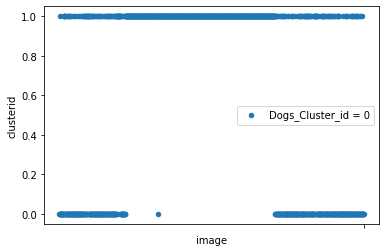

In [ ]:
import matplotlib.pyplot as plt

image_cluster.plot.scatter('image', 'clusterid', xticks="", legend="1")
plt.legend(['Dogs_Cluster_id = 0', 'Cats_Cluster_id = 1'])

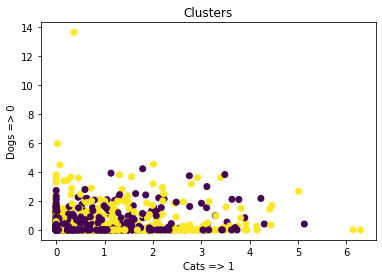

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert img_features to a NumPy array
img_features = np.array(img_features)

# Extract the coordinates of the points in the clusters
x = img_features[:, 0] # x-coordinates of the points
y = img_features[:, 1] # y-coordinates of the points

# Extract the cluster labels for each point
labels = clusters.labels_

# Create a scatter plot of the points, colored by cluster label
plt.scatter(x, y, c=labels, cmap='viridis')

# Show the plot
plt.xlabel('Cats => 1')
plt.ylabel('Dogs => 0')
plt.title('Clusters')
plt.show()


**Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette score for the clusters
score = silhouette_score(img_features, clusters.labels_, metric = 'manhattan')
print("The Silhouette Score: {:.3f}".format(score))

The Silhouette Score: 0.045


**Calculate the compression ratio**

In [ ]:
import os

# Set the value of k for the DCT compression
k = 30

# Load the image files and set the path
uploaded = os.listdir(dct_compress_path)
path = '/content/drive/MyDrive/dct_images/'

# Create a directory for the compressed image in google drive
if not os.path.exists("/content/drive/My Drive/compressed_images_15"):
  os.makedirs("/content/drive/My Drive/compressed_images_15")

# Get the file name and data for the uploaded image
for filename in tqdm(uploaded):
  img_path = imread(path + filename)
  # Decode the image data into a NumPy array
  # img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_UNCHANGED)

  # Compress the image using DCT
  #compressed_img = dct_compress(img_path, k)

  # Calculate the size of the original image
  original_size = os.path.getsize(path + filename)
  # Calculate the size of the compressed image
  compressed_size = os.path.getsize("/content/drive/My Drive/compressed_images/compressed_" + filename)

  # Calculate the compression ratio
  ratio = original_size / compressed_size
  print("Compression ratio for {}: {:.2f}".format(filename, ratio))


  1%|          | 15/1415 [00:00<00:16, 83.72it/s]

Compression ratio for cat.454.jpg: 0.62
Compression ratio for cat.442.jpg: 0.61
Compression ratio for cat.415.jpg: 0.68
Compression ratio for cat.461.jpg: 0.51
Compression ratio for cat.477.jpg: 0.51
Compression ratio for cat.484.jpg: 0.61
Compression ratio for cat.413.jpg: 0.58
Compression ratio for cat.475.jpg: 0.61
Compression ratio for cat.424.jpg: 0.58
Compression ratio for cat.412.jpg: 0.57
Compression ratio for cat.42.jpg: 0.62
Compression ratio for cat.410.jpg: 0.58
Compression ratio for cat.421.jpg: 0.61
Compression ratio for cat.426.jpg: 0.74
Compression ratio for cat.436.jpg: 0.68
Compression ratio for cat.469.jpg: 0.63
Compression ratio for cat.479.jpg: 0.53
Compression ratio for cat.428.jpg: 0.61
Compression ratio for cat.480.jpg: 0.67
Compression ratio for cat.439.jpg: 0.55


  2%|▏         | 35/1415 [00:01<00:44, 31.13it/s]

Compression ratio for cat.49.jpg: 0.58
Compression ratio for cat.464.jpg: 0.54
Compression ratio for cat.504.jpg: 0.70
Compression ratio for cat.518.jpg: 0.66
Compression ratio for cat.551.jpg: 0.64
Compression ratio for cat.497.jpg: 0.68
Compression ratio for cat.529.jpg: 0.57
Compression ratio for cat.561.jpg: 0.65
Compression ratio for cat.507.jpg: 0.65
Compression ratio for cat.56.jpg: 0.64
Compression ratio for cat.495.jpg: 0.61
Compression ratio for cat.576.jpg: 0.68
Compression ratio for cat.575.jpg: 0.60
Compression ratio for cat.526.jpg: 0.62
Compression ratio for cat.498.jpg: 0.75
Compression ratio for cat.577.jpg: 0.60
Compression ratio for cat.557.jpg: 0.58
Compression ratio for cat.496.jpg: 0.58
Compression ratio for cat.542.jpg: 0.62
Compression ratio for cat.563.jpg: 0.64
Compression ratio for cat.511.jpg: 0.60
Compression ratio for cat.534.jpg: 0.64
Compression ratio for cat.538.jpg: 0.59
Compression ratio for cat.558.jpg: 0.59
Compression ratio for cat.555.jpg: 0.61
Co

  5%|▌         | 72/1415 [00:01<00:17, 77.11it/s]

Compression ratio for cat.549.jpg: 0.59
Compression ratio for cat.503.jpg: 0.72
Compression ratio for cat.573.jpg: 0.72
Compression ratio for cat.508.jpg: 0.66
Compression ratio for cat.530.jpg: 0.64
Compression ratio for cat.519.jpg: 0.67
Compression ratio for cat.578.jpg: 0.63
Compression ratio for cat.554.jpg: 0.62
Compression ratio for cat.546.jpg: 0.59
Compression ratio for cat.556.jpg: 0.58
Compression ratio for cat.523.jpg: 0.57
Compression ratio for cat.547.jpg: 0.74
Compression ratio for cat.536.jpg: 0.60
Compression ratio for cat.527.jpg: 0.69
Compression ratio for cat.574.jpg: 0.74
Compression ratio for cat.553.jpg: 0.69
Compression ratio for cat.560.jpg: 0.71
Compression ratio for cat.539.jpg: 0.57
Compression ratio for cat.559.jpg: 0.59
Compression ratio for cat.541.jpg: 0.57
Compression ratio for cat.494.jpg: 0.64
Compression ratio for cat.533.jpg: 0.60
Compression ratio for cat.571.jpg: 0.67
Compression ratio for cat.513.jpg: 0.64
Compression ratio for cat.5.jpg: 0.58
Co

  7%|▋         | 104/1415 [00:01<00:12, 107.69it/s]

Compression ratio for cat.543.jpg: 0.62
Compression ratio for cat.57.jpg: 0.48
Compression ratio for cat.516.jpg: 0.58
Compression ratio for cat.568.jpg: 0.49
Compression ratio for cat.537.jpg: 0.57
Compression ratio for cat.520.jpg: 0.62
Compression ratio for cat.521.jpg: 0.55
Compression ratio for cat.540.jpg: 0.62
Compression ratio for cat.545.jpg: 0.66
Compression ratio for cat.567.jpg: 0.71
Compression ratio for cat.509.jpg: 0.58
Compression ratio for cat.525.jpg: 0.70
Compression ratio for cat.510.jpg: 0.63
Compression ratio for cat.50.jpg: 0.58
Compression ratio for cat.548.jpg: 0.64
Compression ratio for cat.566.jpg: 0.64
Compression ratio for cat.570.jpg: 0.61
Compression ratio for cat.493.jpg: 0.53
Compression ratio for cat.517.jpg: 0.56
Compression ratio for cat.51.jpg: 0.64
Compression ratio for cat.550.jpg: 0.65
Compression ratio for cat.54.jpg: 0.77
Compression ratio for cat.492.jpg: 0.57
Compression ratio for cat.514.jpg: 0.66
Compression ratio for cat.500.jpg: 0.73
Comp

 10%|▉         | 139/1415 [00:01<00:09, 134.99it/s]

Compression ratio for cat.499.jpg: 0.60
Compression ratio for cat.614.jpg: 0.65
Compression ratio for cat.617.jpg: 0.61
Compression ratio for cat.62.jpg: 0.60
Compression ratio for cat.666.jpg: 0.52
Compression ratio for cat.594.jpg: 0.62
Compression ratio for cat.653.jpg: 0.72
Compression ratio for cat.627.jpg: 0.65
Compression ratio for cat.631.jpg: 0.64
Compression ratio for cat.589.jpg: 0.59
Compression ratio for cat.602.jpg: 0.50
Compression ratio for cat.58.jpg: 0.56
Compression ratio for cat.618.jpg: 0.65
Compression ratio for cat.597.jpg: 0.60
Compression ratio for cat.661.jpg: 0.63
Compression ratio for cat.632.jpg: 0.56
Compression ratio for cat.657.jpg: 0.64
Compression ratio for cat.63.jpg: 0.62
Compression ratio for cat.582.jpg: 0.70
Compression ratio for cat.586.jpg: 0.63
Compression ratio for cat.628.jpg: 0.65
Compression ratio for cat.591.jpg: 0.56
Compression ratio for cat.66.jpg: 0.66
Compression ratio for cat.65.jpg: 0.62
Compression ratio for cat.619.jpg: 0.57
Compr

 12%|█▏        | 173/1415 [00:01<00:08, 147.26it/s]


Compression ratio for cat.623.jpg: 0.63
Compression ratio for cat.640.jpg: 0.67
Compression ratio for cat.622.jpg: 0.70
Compression ratio for cat.588.jpg: 0.58
Compression ratio for cat.611.jpg: 0.63
Compression ratio for cat.624.jpg: 0.70
Compression ratio for cat.630.jpg: 0.65
Compression ratio for cat.643.jpg: 0.59
Compression ratio for cat.656.jpg: 0.65
Compression ratio for cat.665.jpg: 0.63
Compression ratio for cat.604.jpg: 0.69
Compression ratio for cat.659.jpg: 0.59
Compression ratio for cat.620.jpg: 0.60
Compression ratio for cat.596.jpg: 0.65
Compression ratio for cat.60.jpg: 0.60
Compression ratio for cat.608.jpg: 0.61
Compression ratio for cat.598.jpg: 0.65
Compression ratio for cat.61.jpg: 0.75
Compression ratio for cat.607.jpg: 0.66
Compression ratio for cat.641.jpg: 0.66
Compression ratio for cat.579.jpg: 0.72
Compression ratio for cat.601.jpg: 0.77
Compression ratio for cat.647.jpg: 0.68
Compression ratio for cat.648.jpg: 0.61
Compression ratio for cat.660.jpg: 0.62
C

 15%|█▍        | 210/1415 [00:02<00:07, 157.60it/s]

Compression ratio for cat.655.jpg: 0.59
Compression ratio for cat.646.jpg: 0.61
Compression ratio for cat.603.jpg: 0.71
Compression ratio for cat.639.jpg: 0.58
Compression ratio for cat.64.jpg: 0.62
Compression ratio for cat.658.jpg: 0.62
Compression ratio for cat.629.jpg: 0.56
Compression ratio for cat.638.jpg: 0.57
Compression ratio for cat.625.jpg: 0.69
Compression ratio for cat.626.jpg: 0.59
Compression ratio for cat.593.jpg: 0.63
Compression ratio for cat.600.jpg: 0.60
Compression ratio for cat.615.jpg: 0.61
Compression ratio for cat.592.jpg: 0.88
Compression ratio for cat.637.jpg: 0.62
Compression ratio for cat.612.jpg: 0.60
Compression ratio for cat.6.jpg: 0.67
Compression ratio for cat.651.jpg: 0.61
Compression ratio for cat.644.jpg: 0.64
Compression ratio for cat.587.jpg: 0.58
Compression ratio for cat.599.jpg: 0.61
Compression ratio for cat.636.jpg: 0.60
Compression ratio for cat.652.jpg: 0.64
Compression ratio for cat.613.jpg: 0.69
Compression ratio for cat.621.jpg: 0.53
Com

 17%|█▋        | 246/1415 [00:02<00:06, 167.28it/s]

Compression ratio for cat.685.jpg: 0.57
Compression ratio for cat.677.jpg: 0.60
Compression ratio for cat.694.jpg: 0.62
Compression ratio for cat.686.jpg: 0.63
Compression ratio for cat.688.jpg: 0.62
Compression ratio for cat.675.jpg: 0.62
Compression ratio for cat.690.jpg: 0.65
Compression ratio for cat.672.jpg: 0.60
Compression ratio for cat.692.jpg: 0.70
Compression ratio for cat.699.jpg: 0.72
Compression ratio for cat.676.jpg: 0.73
Compression ratio for cat.689.jpg: 0.62
Compression ratio for cat.683.jpg: 0.70
Compression ratio for cat.705.jpg: 0.58
Compression ratio for cat.70.jpg: 0.66
Compression ratio for cat.706.jpg: 0.58
Compression ratio for cat.674.jpg: 0.60
Compression ratio for cat.691.jpg: 0.61
Compression ratio for cat.687.jpg: 0.66
Compression ratio for cat.680.jpg: 0.57
Compression ratio for cat.74.jpg: 0.62
Compression ratio for cat.75.jpg: 0.64
Compression ratio for cat.695.jpg: 0.66
Compression ratio for cat.7.jpg: 0.70
Compression ratio for cat.73.jpg: 0.59
Compre

 20%|█▉        | 281/1415 [00:02<00:07, 158.49it/s]

Compression ratio for cat.667.jpg: 0.54
Compression ratio for cat.697.jpg: 0.62
Compression ratio for cat.698.jpg: 0.61
Compression ratio for cat.682.jpg: 0.61
Compression ratio for cat.702.jpg: 0.53
Compression ratio for cat.701.jpg: 0.54
Compression ratio for cat.71.jpg: 0.60
Compression ratio for cat.68.jpg: 0.54
Compression ratio for cat.693.jpg: 0.68
Compression ratio for cat.72.jpg: 0.65
Compression ratio for cat.679.jpg: 0.61
Compression ratio for cat.703.jpg: 0.61
Compression ratio for cat.669.jpg: 0.58
Compression ratio for cat.668.jpg: 0.66
Compression ratio for cat.83.jpg: 0.59
Compression ratio for cat.81.jpg: 0.62
Compression ratio for cat.79.jpg: 0.68
Compression ratio for cat.82.jpg: 0.69
Compression ratio for cat.84.jpg: 0.66
Compression ratio for cat.80.jpg: 0.53
Compression ratio for cat.77.jpg: 0.62
Compression ratio for cat.76.jpg: 0.66
Compression ratio for cat.8.jpg: 0.61
Compression ratio for cat.78.jpg: 0.66
Compression ratio for cat.85.jpg: 0.60
Compression rat

 22%|██▏       | 317/1415 [00:02<00:06, 166.92it/s]

Compression ratio for cat.87.jpg: 0.54
Compression ratio for cat.91.jpg: 0.54
Compression ratio for cat.86.jpg: 0.66
Compression ratio for cat.95.jpg: 0.65
Compression ratio for cat.99.jpg: 0.57
Compression ratio for dog.100.jpg: 0.68
Compression ratio for dog.101.jpg: 0.64
Compression ratio for cat.94.jpg: 0.66
Compression ratio for cat.96.jpg: 0.67
Compression ratio for cat.98.jpg: 0.69
Compression ratio for cat.97.jpg: 0.66
Compression ratio for dog.1.jpg: 0.62
Compression ratio for dog.10.jpg: 0.61
Compression ratio for dog.0.jpg: 0.68
Compression ratio for dog.104.jpg: 0.55
Compression ratio for dog.108.jpg: 0.66
Compression ratio for dog.105.jpg: 0.65
Compression ratio for dog.103.jpg: 0.57
Compression ratio for dog.107.jpg: 0.79
Compression ratio for dog.102.jpg: 0.67
Compression ratio for dog.106.jpg: 0.61
Compression ratio for dog.113.jpg: 0.62
Compression ratio for dog.115.jpg: 0.66
Compression ratio for dog.111.jpg: 0.70
Compression ratio for dog.110.jpg: 0.77
Compression ra

 25%|██▍       | 353/1415 [00:03<00:06, 166.99it/s]

Compression ratio for dog.122.jpg: 0.66
Compression ratio for dog.119.jpg: 0.70
Compression ratio for dog.165.jpg: 0.66
Compression ratio for dog.137.jpg: 0.64
Compression ratio for dog.163.jpg: 0.57
Compression ratio for dog.17.jpg: 0.63
Compression ratio for dog.138.jpg: 0.59
Compression ratio for dog.130.jpg: 0.63
Compression ratio for dog.156.jpg: 0.78
Compression ratio for dog.123.jpg: 0.69
Compression ratio for dog.158.jpg: 0.64
Compression ratio for dog.164.jpg: 0.59
Compression ratio for dog.150.jpg: 0.74
Compression ratio for dog.155.jpg: 0.63
Compression ratio for dog.125.jpg: 0.64
Compression ratio for dog.152.jpg: 0.58
Compression ratio for dog.170.jpg: 0.80
Compression ratio for dog.160.jpg: 0.59
Compression ratio for dog.148.jpg: 0.66
Compression ratio for dog.153.jpg: 0.63
Compression ratio for dog.175.jpg: 0.62
Compression ratio for dog.136.jpg: 0.73
Compression ratio for dog.144.jpg: 0.70
Compression ratio for dog.168.jpg: 0.59
Compression ratio for dog.177.jpg: 0.77
C

 27%|██▋       | 388/1415 [00:03<00:06, 164.54it/s]

Compression ratio for dog.173.jpg: 0.72
Compression ratio for dog.149.jpg: 0.63
Compression ratio for dog.146.jpg: 0.64
Compression ratio for dog.140.jpg: 0.61
Compression ratio for dog.161.jpg: 0.76
Compression ratio for dog.143.jpg: 0.67
Compression ratio for dog.124.jpg: 0.62
Compression ratio for dog.129.jpg: 0.67
Compression ratio for dog.167.jpg: 0.63
Compression ratio for dog.127.jpg: 0.62
Compression ratio for dog.171.jpg: 0.62
Compression ratio for dog.131.jpg: 0.71
Compression ratio for dog.134.jpg: 0.73
Compression ratio for dog.126.jpg: 0.70
Compression ratio for dog.133.jpg: 0.76
Compression ratio for dog.145.jpg: 0.65
Compression ratio for dog.176.jpg: 0.62
Compression ratio for dog.147.jpg: 0.66
Compression ratio for dog.15.jpg: 0.60
Compression ratio for dog.178.jpg: 0.78
Compression ratio for dog.14.jpg: 0.78
Compression ratio for dog.172.jpg: 0.75
Compression ratio for dog.159.jpg: 0.62
Compression ratio for dog.132.jpg: 0.62
Compression ratio for dog.141.jpg: 0.59
Co

 30%|██▉       | 424/1415 [00:03<00:05, 170.37it/s]

Compression ratio for dog.24.jpg: 0.66
Compression ratio for dog.208.jpg: 0.67
Compression ratio for dog.249.jpg: 0.63
Compression ratio for dog.241.jpg: 0.63
Compression ratio for dog.201.jpg: 0.78
Compression ratio for dog.183.jpg: 0.63
Compression ratio for dog.234.jpg: 0.79
Compression ratio for dog.187.jpg: 0.57
Compression ratio for dog.190.jpg: 0.64
Compression ratio for dog.185.jpg: 0.68
Compression ratio for dog.226.jpg: 0.64
Compression ratio for dog.191.jpg: 0.68
Compression ratio for dog.22.jpg: 0.76
Compression ratio for dog.245.jpg: 0.66
Compression ratio for dog.231.jpg: 0.62
Compression ratio for dog.246.jpg: 0.57
Compression ratio for dog.219.jpg: 0.58
Compression ratio for dog.229.jpg: 0.80
Compression ratio for dog.250.jpg: 0.72
Compression ratio for dog.244.jpg: 0.57
Compression ratio for dog.225.jpg: 0.68
Compression ratio for dog.180.jpg: 0.65
Compression ratio for dog.210.jpg: 0.66
Compression ratio for dog.195.jpg: 0.73
Compression ratio for dog.196.jpg: 0.72
Co

 31%|███       | 442/1415 [00:03<00:05, 165.71it/s]

Compression ratio for dog.235.jpg: 0.73
Compression ratio for dog.18.jpg: 0.60
Compression ratio for dog.200.jpg: 0.54
Compression ratio for dog.182.jpg: 0.65
Compression ratio for dog.202.jpg: 0.66
Compression ratio for dog.207.jpg: 0.65
Compression ratio for dog.242.jpg: 0.68
Compression ratio for dog.223.jpg: 0.81
Compression ratio for dog.186.jpg: 0.63
Compression ratio for dog.23.jpg: 0.73
Compression ratio for dog.25.jpg: 0.68
Compression ratio for dog.21.jpg: 0.62
Compression ratio for dog.248.jpg: 0.59
Compression ratio for dog.236.jpg: 0.67
Compression ratio for dog.198.jpg: 0.79
Compression ratio for dog.212.jpg: 0.80
Compression ratio for dog.194.jpg: 0.57
Compression ratio for dog.184.jpg: 0.70
Compression ratio for dog.215.jpg: 0.73
Compression ratio for dog.197.jpg: 0.79
Compression ratio for dog.239.jpg: 0.63
Compression ratio for dog.238.jpg: 0.75
Compression ratio for dog.211.jpg: 0.57
Compression ratio for dog.247.jpg: 0.69
Compression ratio for dog.214.jpg: 0.62
Comp

 34%|███▎      | 477/1415 [00:03<00:05, 167.44it/s]

Compression ratio for dog.199.jpg: 0.57
Compression ratio for dog.213.jpg: 0.58
Compression ratio for dog.216.jpg: 0.59
Compression ratio for dog.193.jpg: 0.50
Compression ratio for dog.209.jpg: 0.63
Compression ratio for dog.278.jpg: 0.66
Compression ratio for dog.268.jpg: 0.71
Compression ratio for dog.285.jpg: 0.72
Compression ratio for dog.294.jpg: 0.68
Compression ratio for dog.29.jpg: 0.66
Compression ratio for dog.275.jpg: 0.80
Compression ratio for dog.306.jpg: 0.55
Compression ratio for dog.262.jpg: 0.67
Compression ratio for dog.317.jpg: 0.67
Compression ratio for dog.274.jpg: 0.57
Compression ratio for dog.314.jpg: 0.61
Compression ratio for dog.296.jpg: 0.63
Compression ratio for dog.302.jpg: 0.59
Compression ratio for dog.32.jpg: 0.67
Compression ratio for dog.258.jpg: 0.61
Compression ratio for dog.251.jpg: 0.68
Compression ratio for dog.298.jpg: 0.74
Compression ratio for dog.297.jpg: 0.58
Compression ratio for dog.320.jpg: 0.75
Compression ratio for dog.254.jpg: 0.67
Co

 36%|███▌      | 512/1415 [00:04<00:05, 170.05it/s]

Compression ratio for dog.326.jpg: 0.63
Compression ratio for dog.282.jpg: 0.64
Compression ratio for dog.307.jpg: 0.70
Compression ratio for dog.287.jpg: 0.74
Compression ratio for dog.305.jpg: 0.79
Compression ratio for dog.301.jpg: 0.61
Compression ratio for dog.286.jpg: 0.78
Compression ratio for dog.269.jpg: 0.54
Compression ratio for dog.303.jpg: 0.89
Compression ratio for dog.291.jpg: 0.61
Compression ratio for dog.281.jpg: 0.66
Compression ratio for dog.292.jpg: 0.59
Compression ratio for dog.277.jpg: 0.62
Compression ratio for dog.288.jpg: 0.79
Compression ratio for dog.289.jpg: 0.74
Compression ratio for dog.280.jpg: 0.63
Compression ratio for dog.283.jpg: 0.65
Compression ratio for dog.293.jpg: 0.61
Compression ratio for dog.324.jpg: 0.61
Compression ratio for dog.308.jpg: 0.61
Compression ratio for dog.311.jpg: 0.60
Compression ratio for dog.284.jpg: 0.63
Compression ratio for dog.299.jpg: 0.66
Compression ratio for dog.272.jpg: 0.68
Compression ratio for dog.257.jpg: 0.78


 39%|███▊      | 547/1415 [00:04<00:05, 165.80it/s]

Compression ratio for dog.255.jpg: 0.58
Compression ratio for dog.323.jpg: 0.75
Compression ratio for dog.261.jpg: 0.67
Compression ratio for dog.315.jpg: 0.64
Compression ratio for dog.260.jpg: 0.64
Compression ratio for dog.256.jpg: 0.57
Compression ratio for dog.310.jpg: 0.69
Compression ratio for dog.300.jpg: 0.64
Compression ratio for dog.259.jpg: 0.72
Compression ratio for dog.322.jpg: 0.82
Compression ratio for dog.279.jpg: 0.62
Compression ratio for dog.273.jpg: 0.61
Compression ratio for dog.265.jpg: 0.83
Compression ratio for dog.264.jpg: 0.67
Compression ratio for dog.28.jpg: 0.69
Compression ratio for dog.271.jpg: 0.56
Compression ratio for dog.290.jpg: 0.66
Compression ratio for dog.3.jpg: 0.70
Compression ratio for dog.319.jpg: 0.60
Compression ratio for dog.266.jpg: 0.65
Compression ratio for dog.363.jpg: 0.62
Compression ratio for dog.409.jpg: 0.61
Compression ratio for dog.337.jpg: 0.55
Compression ratio for dog.339.jpg: 0.63
Compression ratio for dog.357.jpg: 0.56
Com

 41%|████      | 582/1415 [00:04<00:05, 162.80it/s]


Compression ratio for dog.341.jpg: 0.68
Compression ratio for dog.360.jpg: 0.63
Compression ratio for dog.372.jpg: 0.76
Compression ratio for dog.34.jpg: 0.76
Compression ratio for dog.332.jpg: 0.60
Compression ratio for dog.401.jpg: 0.66
Compression ratio for dog.371.jpg: 0.68
Compression ratio for dog.378.jpg: 0.68
Compression ratio for dog.351.jpg: 0.69
Compression ratio for dog.377.jpg: 0.61
Compression ratio for dog.348.jpg: 0.60
Compression ratio for dog.385.jpg: 0.73
Compression ratio for dog.342.jpg: 0.72
Compression ratio for dog.393.jpg: 0.71
Compression ratio for dog.392.jpg: 0.62
Compression ratio for dog.368.jpg: 0.54
Compression ratio for dog.331.jpg: 0.78
Compression ratio for dog.404.jpg: 0.61
Compression ratio for dog.375.jpg: 0.73
Compression ratio for dog.400.jpg: 0.61
Compression ratio for dog.358.jpg: 0.71
Compression ratio for dog.330.jpg: 0.70
Compression ratio for dog.407.jpg: 0.61
Compression ratio for dog.35.jpg: 0.66
Compression ratio for dog.405.jpg: 0.75
C

 44%|████▎     | 616/1415 [00:04<00:05, 158.79it/s]

Compression ratio for dog.352.jpg: 0.77
Compression ratio for dog.382.jpg: 0.63
Compression ratio for dog.328.jpg: 0.77
Compression ratio for dog.335.jpg: 0.60
Compression ratio for dog.344.jpg: 0.62
Compression ratio for dog.362.jpg: 0.74
Compression ratio for dog.370.jpg: 0.59
Compression ratio for dog.373.jpg: 0.62
Compression ratio for dog.369.jpg: 0.64
Compression ratio for dog.356.jpg: 0.62
Compression ratio for dog.38.jpg: 0.69
Compression ratio for dog.354.jpg: 0.58
Compression ratio for dog.374.jpg: 0.79
Compression ratio for dog.388.jpg: 0.70
Compression ratio for dog.399.jpg: 0.62
Compression ratio for dog.338.jpg: 0.78
Compression ratio for dog.366.jpg: 0.58
Compression ratio for dog.345.jpg: 0.66
Compression ratio for dog.365.jpg: 0.67
Compression ratio for dog.349.jpg: 0.64
Compression ratio for dog.329.jpg: 0.62
Compression ratio for dog.403.jpg: 0.72
Compression ratio for dog.343.jpg: 0.65
Compression ratio for dog.333.jpg: 0.66
Compression ratio for dog.364.jpg: 0.61
C

 46%|████▌     | 653/1415 [00:04<00:04, 169.30it/s]

Compression ratio for dog.39.jpg: 0.68
Compression ratio for dog.346.jpg: 0.67
Compression ratio for dog.383.jpg: 0.78
Compression ratio for dog.340.jpg: 0.59
Compression ratio for dog.396.jpg: 0.85
Compression ratio for dog.395.jpg: 0.66
Compression ratio for dog.361.jpg: 0.63
Compression ratio for dog.390.jpg: 0.67
Compression ratio for dog.397.jpg: 0.60
Compression ratio for dog.334.jpg: 0.64
Compression ratio for dog.460.jpg: 0.66
Compression ratio for dog.46.jpg: 0.63
Compression ratio for dog.456.jpg: 0.76
Compression ratio for dog.412.jpg: 0.57
Compression ratio for dog.429.jpg: 0.63
Compression ratio for dog.418.jpg: 0.65
Compression ratio for dog.458.jpg: 0.73
Compression ratio for dog.43.jpg: 0.58
Compression ratio for dog.423.jpg: 0.69
Compression ratio for dog.447.jpg: 0.58
Compression ratio for dog.42.jpg: 0.50
Compression ratio for dog.483.jpg: 0.59
Compression ratio for dog.426.jpg: 0.71
Compression ratio for dog.41.jpg: 0.64
Compression ratio for dog.421.jpg: 0.64
Compr

 49%|████▊     | 689/1415 [00:05<00:04, 170.32it/s]

Compression ratio for dog.436.jpg: 0.70
Compression ratio for dog.410.jpg: 0.60
Compression ratio for dog.446.jpg: 0.66
Compression ratio for dog.475.jpg: 0.75
Compression ratio for dog.444.jpg: 0.63
Compression ratio for dog.467.jpg: 0.67
Compression ratio for dog.47.jpg: 0.64
Compression ratio for dog.476.jpg: 0.62
Compression ratio for dog.424.jpg: 0.62
Compression ratio for dog.464.jpg: 0.57
Compression ratio for dog.411.jpg: 0.66
Compression ratio for dog.425.jpg: 0.59
Compression ratio for dog.461.jpg: 0.64
Compression ratio for dog.465.jpg: 0.63
Compression ratio for dog.480.jpg: 0.70
Compression ratio for dog.477.jpg: 0.62
Compression ratio for dog.437.jpg: 0.83
Compression ratio for dog.452.jpg: 0.79
Compression ratio for dog.481.jpg: 0.61
Compression ratio for dog.432.jpg: 0.65
Compression ratio for dog.470.jpg: 0.71
Compression ratio for dog.463.jpg: 0.81
Compression ratio for dog.413.jpg: 0.60
Compression ratio for dog.441.jpg: 0.59
Compression ratio for dog.445.jpg: 0.64
C

 51%|█████▏    | 727/1415 [00:05<00:03, 173.36it/s]

Compression ratio for dog.48.jpg: 0.63
Compression ratio for dog.473.jpg: 0.62
Compression ratio for dog.45.jpg: 0.75
Compression ratio for dog.414.jpg: 0.59
Compression ratio for dog.474.jpg: 0.60
Compression ratio for dog.433.jpg: 0.69
Compression ratio for dog.427.jpg: 0.74
Compression ratio for dog.44.jpg: 0.72
Compression ratio for dog.440.jpg: 0.70
Compression ratio for dog.471.jpg: 0.75
Compression ratio for dog.435.jpg: 0.65
Compression ratio for dog.478.jpg: 0.65
Compression ratio for dog.420.jpg: 0.68
Compression ratio for dog.443.jpg: 0.58
Compression ratio for dog.442.jpg: 0.57
Compression ratio for dog.454.jpg: 0.64
Compression ratio for dog.422.jpg: 0.74
Compression ratio for dog.462.jpg: 0.58
Compression ratio for dog.419.jpg: 0.69
Compression ratio for dog.479.jpg: 0.68
Compression ratio for dog.431.jpg: 0.69
Compression ratio for dog.466.jpg: 0.58
Compression ratio for dog.553.jpg: 0.62
Compression ratio for dog.514.jpg: 0.58
Compression ratio for dog.534.jpg: 0.68
Com

 54%|█████▍    | 763/1415 [00:05<00:03, 170.33it/s]

Compression ratio for dog.51.jpg: 0.67
Compression ratio for dog.503.jpg: 0.57
Compression ratio for dog.510.jpg: 0.73
Compression ratio for dog.498.jpg: 0.70
Compression ratio for dog.508.jpg: 0.64
Compression ratio for dog.511.jpg: 0.63
Compression ratio for dog.558.jpg: 0.73
Compression ratio for dog.505.jpg: 0.59
Compression ratio for dog.547.jpg: 0.56
Compression ratio for dog.543.jpg: 0.60
Compression ratio for dog.524.jpg: 0.60
Compression ratio for dog.512.jpg: 0.62
Compression ratio for dog.52.jpg: 0.73
Compression ratio for dog.535.jpg: 0.63
Compression ratio for dog.557.jpg: 0.70
Compression ratio for dog.495.jpg: 0.67
Compression ratio for dog.504.jpg: 0.58
Compression ratio for dog.521.jpg: 0.59
Compression ratio for dog.554.jpg: 0.65
Compression ratio for dog.490.jpg: 0.70
Compression ratio for dog.544.jpg: 0.81
Compression ratio for dog.50.jpg: 0.63
Compression ratio for dog.485.jpg: 0.65
Compression ratio for dog.540.jpg: 0.68
Compression ratio for dog.54.jpg: 0.68
Comp

 57%|█████▋    | 800/1415 [00:05<00:03, 167.43it/s]

Compression ratio for dog.546.jpg: 0.81
Compression ratio for dog.53.jpg: 0.72
Compression ratio for dog.551.jpg: 0.68
Compression ratio for dog.486.jpg: 0.63
Compression ratio for dog.519.jpg: 0.69
Compression ratio for dog.539.jpg: 0.78
Compression ratio for dog.507.jpg: 0.74
Compression ratio for dog.488.jpg: 0.62
Compression ratio for dog.501.jpg: 0.61
Compression ratio for dog.538.jpg: 0.78
Compression ratio for dog.499.jpg: 0.62
Compression ratio for dog.530.jpg: 0.64
Compression ratio for dog.516.jpg: 0.63
Compression ratio for dog.525.jpg: 0.62
Compression ratio for dog.493.jpg: 0.71
Compression ratio for dog.533.jpg: 0.58
Compression ratio for dog.492.jpg: 0.75
Compression ratio for dog.529.jpg: 0.57
Compression ratio for dog.55.jpg: 0.86
Compression ratio for dog.515.jpg: 0.72
Compression ratio for dog.49.jpg: 0.65
Compression ratio for dog.5.jpg: 0.71
Compression ratio for dog.545.jpg: 0.67
Compression ratio for dog.531.jpg: 0.60
Compression ratio for dog.549.jpg: 0.69
Compr

 59%|█████▉    | 837/1415 [00:05<00:03, 168.31it/s]

Compression ratio for dog.579.jpg: 0.57
Compression ratio for dog.589.jpg: 0.70
Compression ratio for dog.621.jpg: 0.57
Compression ratio for dog.587.jpg: 0.77
Compression ratio for dog.573.jpg: 0.69
Compression ratio for dog.582.jpg: 0.58
Compression ratio for dog.606.jpg: 0.62
Compression ratio for dog.595.jpg: 0.59
Compression ratio for dog.612.jpg: 0.57
Compression ratio for dog.627.jpg: 0.61
Compression ratio for dog.581.jpg: 0.57
Compression ratio for dog.607.jpg: 0.66
Compression ratio for dog.574.jpg: 0.60
Compression ratio for dog.56.jpg: 0.57
Compression ratio for dog.576.jpg: 0.69
Compression ratio for dog.561.jpg: 0.63
Compression ratio for dog.592.jpg: 0.63
Compression ratio for dog.58.jpg: 0.71
Compression ratio for dog.626.jpg: 0.58
Compression ratio for dog.616.jpg: 0.62
Compression ratio for dog.61.jpg: 0.64
Compression ratio for dog.566.jpg: 0.63
Compression ratio for dog.593.jpg: 0.59
Compression ratio for dog.60.jpg: 0.51
Compression ratio for dog.632.jpg: 0.67
Comp

 62%|██████▏   | 871/1415 [00:06<00:03, 165.42it/s]

Compression ratio for dog.628.jpg: 0.66
Compression ratio for dog.599.jpg: 0.82
Compression ratio for dog.568.jpg: 0.61
Compression ratio for dog.611.jpg: 0.55
Compression ratio for dog.609.jpg: 0.56
Compression ratio for dog.575.jpg: 0.62
Compression ratio for dog.622.jpg: 0.70
Compression ratio for dog.564.jpg: 0.81
Compression ratio for dog.567.jpg: 0.65
Compression ratio for dog.562.jpg: 0.60
Compression ratio for dog.635.jpg: 0.66
Compression ratio for dog.602.jpg: 0.76
Compression ratio for dog.630.jpg: 0.73
Compression ratio for dog.631.jpg: 0.66
Compression ratio for dog.604.jpg: 0.70
Compression ratio for dog.586.jpg: 0.73
Compression ratio for dog.597.jpg: 0.59
Compression ratio for dog.594.jpg: 0.80
Compression ratio for dog.569.jpg: 0.65
Compression ratio for dog.560.jpg: 0.57
Compression ratio for dog.570.jpg: 0.76
Compression ratio for dog.596.jpg: 0.60
Compression ratio for dog.572.jpg: 0.64
Compression ratio for dog.634.jpg: 0.68
Compression ratio for dog.577.jpg: 0.54


 64%|██████▍   | 905/1415 [00:06<00:03, 161.01it/s]

Compression ratio for dog.608.jpg: 0.75
Compression ratio for dog.601.jpg: 0.72
Compression ratio for dog.580.jpg: 0.72
Compression ratio for dog.615.jpg: 0.55
Compression ratio for dog.623.jpg: 0.82
Compression ratio for dog.620.jpg: 0.61
Compression ratio for dog.617.jpg: 0.70
Compression ratio for dog.63.jpg: 0.78
Compression ratio for dog.591.jpg: 0.80
Compression ratio for dog.571.jpg: 0.61
Compression ratio for dog.605.jpg: 0.62
Compression ratio for dog.598.jpg: 0.74
Compression ratio for dog.578.jpg: 0.76
Compression ratio for dog.590.jpg: 0.75
Compression ratio for dog.614.jpg: 0.71
Compression ratio for dog.647.jpg: 0.68
Compression ratio for dog.693.jpg: 0.59
Compression ratio for dog.69.jpg: 0.63
Compression ratio for dog.667.jpg: 0.77
Compression ratio for dog.707.jpg: 0.65
Compression ratio for dog.67.jpg: 0.77
Compression ratio for dog.636.jpg: 0.77
Compression ratio for dog.637.jpg: 0.65
Compression ratio for dog.706.jpg: 0.64
Compression ratio for dog.654.jpg: 0.61
Com

 65%|██████▌   | 922/1415 [00:06<00:03, 157.19it/s]

Compression ratio for dog.691.jpg: 0.63
Compression ratio for dog.683.jpg: 0.66
Compression ratio for dog.662.jpg: 0.66
Compression ratio for dog.672.jpg: 0.70
Compression ratio for dog.64.jpg: 0.72
Compression ratio for dog.684.jpg: 0.61
Compression ratio for dog.655.jpg: 0.55
Compression ratio for dog.687.jpg: 0.58
Compression ratio for dog.674.jpg: 0.65
Compression ratio for dog.697.jpg: 0.65
Compression ratio for dog.689.jpg: 0.64
Compression ratio for dog.703.jpg: 0.77
Compression ratio for dog.640.jpg: 0.72
Compression ratio for dog.644.jpg: 0.75
Compression ratio for dog.679.jpg: 0.69
Compression ratio for dog.695.jpg: 0.69
Compression ratio for dog.696.jpg: 0.59
Compression ratio for dog.669.jpg: 0.69
Compression ratio for dog.638.jpg: 0.74
Compression ratio for dog.651.jpg: 0.69
Compression ratio for dog.668.jpg: 0.62
Compression ratio for dog.675.jpg: 0.60
Compression ratio for dog.641.jpg: 0.81
Compression ratio for dog.70.jpg: 0.64
Compression ratio for dog.658.jpg: 0.53
Co

 68%|██████▊   | 958/1415 [00:06<00:02, 165.00it/s]

Compression ratio for dog.68.jpg: 0.64
Compression ratio for dog.71.jpg: 0.69
Compression ratio for dog.649.jpg: 0.61
Compression ratio for dog.681.jpg: 0.57
Compression ratio for dog.686.jpg: 0.74
Compression ratio for dog.666.jpg: 0.61
Compression ratio for dog.663.jpg: 0.65
Compression ratio for dog.65.jpg: 0.60
Compression ratio for dog.698.jpg: 0.63
Compression ratio for dog.7.jpg: 0.64
Compression ratio for dog.664.jpg: 0.55
Compression ratio for dog.694.jpg: 0.61
Compression ratio for dog.660.jpg: 0.66
Compression ratio for dog.656.jpg: 0.72
Compression ratio for dog.705.jpg: 0.56
Compression ratio for dog.646.jpg: 0.73
Compression ratio for dog.701.jpg: 0.64
Compression ratio for dog.676.jpg: 0.60
Compression ratio for dog.653.jpg: 0.67
Compression ratio for dog.645.jpg: 0.64
Compression ratio for dog.661.jpg: 0.54
Compression ratio for dog.700.jpg: 0.63
Compression ratio for dog.685.jpg: 0.63
Compression ratio for dog.692.jpg: 0.59
Compression ratio for dog.670.jpg: 0.60
Compr

 70%|███████   | 994/1415 [00:06<00:02, 169.58it/s]

Compression ratio for dog.78.jpg: 0.69
Compression ratio for dog.77.jpg: 0.67
Compression ratio for dog.74.jpg: 0.67
Compression ratio for dog.83.jpg: 0.62
Compression ratio for dog.8.jpg: 0.78
Compression ratio for dog.86.jpg: 0.65
Compression ratio for dog.80.jpg: 0.82
Compression ratio for dog.85.jpg: 0.58
Compression ratio for dog.79.jpg: 0.62
Compression ratio for dog.81.jpg: 0.61
Compression ratio for dog.84.jpg: 0.63
Compression ratio for dog.82.jpg: 0.71
Compression ratio for dog.87.jpg: 0.61
Compression ratio for dog.90.jpg: 0.70
Compression ratio for dog.9.jpg: 0.70
Compression ratio for dog.89.jpg: 0.60
Compression ratio for dog.91.jpg: 0.57
Compression ratio for dog.92.jpg: 0.65
Compression ratio for dog.88.jpg: 0.73
Compression ratio for dog.97.jpg: 0.77
Compression ratio for dog.98.jpg: 0.74
Compression ratio for dog.99.jpg: 0.72
Compression ratio for dog.96.jpg: 0.64
Compression ratio for dog.93.jpg: 0.57
Compression ratio for dog.94.jpg: 0.63
Compression ratio for dog.9

 73%|███████▎  | 1031/1415 [00:07<00:02, 174.41it/s]


Compression ratio for cat.100.jpg: 0.66
Compression ratio for cat.113.jpg: 0.64
Compression ratio for cat.116.jpg: 0.61
Compression ratio for cat.11.jpg: 0.57
Compression ratio for cat.110.jpg: 0.63
Compression ratio for cat.109.jpg: 0.58
Compression ratio for cat.117.jpg: 0.65
Compression ratio for cat.111.jpg: 0.64
Compression ratio for cat.112.jpg: 0.69
Compression ratio for cat.115.jpg: 0.57
Compression ratio for cat.114.jpg: 0.59
Compression ratio for cat.126.jpg: 0.59
Compression ratio for cat.128.jpg: 0.69
Compression ratio for cat.133.jpg: 0.55
Compression ratio for cat.12.jpg: 0.58
Compression ratio for cat.124.jpg: 0.52
Compression ratio for cat.119.jpg: 0.72
Compression ratio for cat.127.jpg: 0.59
Compression ratio for cat.123.jpg: 0.52
Compression ratio for cat.125.jpg: 0.63
Compression ratio for cat.130.jpg: 0.55
Compression ratio for cat.120.jpg: 0.60
Compression ratio for cat.132.jpg: 0.64
Compression ratio for cat.13.jpg: 0.52
Compression ratio for cat.118.jpg: 0.56
Co

 75%|███████▌  | 1067/1415 [00:07<00:02, 172.80it/s]

Compression ratio for cat.184.jpg: 0.51
Compression ratio for cat.181.jpg: 0.60
Compression ratio for cat.206.jpg: 0.56
Compression ratio for cat.146.jpg: 0.62
Compression ratio for cat.143.jpg: 0.61
Compression ratio for cat.168.jpg: 0.58
Compression ratio for cat.191.jpg: 0.64
Compression ratio for cat.187.jpg: 0.62
Compression ratio for cat.218.jpg: 0.68
Compression ratio for cat.158.jpg: 0.67
Compression ratio for cat.199.jpg: 0.67
Compression ratio for cat.21.jpg: 0.71
Compression ratio for cat.222.jpg: 0.59
Compression ratio for cat.169.jpg: 0.56
Compression ratio for cat.208.jpg: 0.57
Compression ratio for cat.138.jpg: 0.62
Compression ratio for cat.202.jpg: 0.63
Compression ratio for cat.153.jpg: 0.62
Compression ratio for cat.140.jpg: 0.64
Compression ratio for cat.167.jpg: 0.65
Compression ratio for cat.164.jpg: 0.69
Compression ratio for cat.147.jpg: 0.64
Compression ratio for cat.173.jpg: 0.67
Compression ratio for cat.165.jpg: 0.61
Compression ratio for cat.135.jpg: 0.59
C

 78%|███████▊  | 1103/1415 [00:07<00:01, 166.14it/s]

Compression ratio for cat.195.jpg: 0.60
Compression ratio for cat.162.jpg: 0.61
Compression ratio for cat.163.jpg: 0.58
Compression ratio for cat.185.jpg: 0.64
Compression ratio for cat.150.jpg: 0.57
Compression ratio for cat.192.jpg: 0.61
Compression ratio for cat.139.jpg: 0.64
Compression ratio for cat.145.jpg: 0.65
Compression ratio for cat.205.jpg: 0.68
Compression ratio for cat.152.jpg: 0.73
Compression ratio for cat.194.jpg: 0.65
Compression ratio for cat.2.jpg: 0.67
Compression ratio for cat.196.jpg: 0.64
Compression ratio for cat.136.jpg: 0.70
Compression ratio for cat.160.jpg: 0.59
Compression ratio for cat.22.jpg: 0.70
Compression ratio for cat.220.jpg: 0.69
Compression ratio for cat.175.jpg: 0.58
Compression ratio for cat.189.jpg: 0.56
Compression ratio for cat.179.jpg: 0.58
Compression ratio for cat.15.jpg: 0.61
Compression ratio for cat.188.jpg: 0.58
Compression ratio for cat.161.jpg: 0.71
Compression ratio for cat.209.jpg: 0.62
Compression ratio for cat.198.jpg: 0.67
Comp

 81%|████████  | 1140/1415 [00:07<00:01, 168.55it/s]

Compression ratio for cat.137.jpg: 0.72
Compression ratio for cat.171.jpg: 0.60
Compression ratio for cat.20.jpg: 0.60
Compression ratio for cat.151.jpg: 0.68
Compression ratio for cat.219.jpg: 0.68
Compression ratio for cat.203.jpg: 0.58
Compression ratio for cat.183.jpg: 0.66
Compression ratio for cat.193.jpg: 0.62
Compression ratio for cat.180.jpg: 0.65
Compression ratio for cat.155.jpg: 0.53
Compression ratio for cat.149.jpg: 0.60
Compression ratio for cat.144.jpg: 0.66
Compression ratio for cat.212.jpg: 0.59
Compression ratio for cat.177.jpg: 0.57
Compression ratio for cat.154.jpg: 0.59
Compression ratio for cat.178.jpg: 0.62
Compression ratio for cat.215.jpg: 0.62
Compression ratio for cat.14.jpg: 0.64
Compression ratio for cat.204.jpg: 0.60
Compression ratio for cat.210.jpg: 0.84
Compression ratio for cat.142.jpg: 0.56
Compression ratio for cat.18.jpg: 0.73
Compression ratio for cat.288.jpg: 0.65
Compression ratio for cat.28.jpg: 0.58
Compression ratio for cat.284.jpg: 0.67
Comp

 83%|████████▎ | 1177/1415 [00:07<00:01, 165.40it/s]

Compression ratio for cat.235.jpg: 0.67
Compression ratio for cat.310.jpg: 0.63
Compression ratio for cat.269.jpg: 0.71
Compression ratio for cat.303.jpg: 0.70
Compression ratio for cat.239.jpg: 0.69
Compression ratio for cat.278.jpg: 0.65
Compression ratio for cat.276.jpg: 0.65
Compression ratio for cat.293.jpg: 0.72
Compression ratio for cat.254.jpg: 0.47
Compression ratio for cat.298.jpg: 0.63
Compression ratio for cat.302.jpg: 0.62
Compression ratio for cat.312.jpg: 0.60
Compression ratio for cat.224.jpg: 0.72
Compression ratio for cat.268.jpg: 0.71
Compression ratio for cat.228.jpg: 0.66
Compression ratio for cat.237.jpg: 0.64
Compression ratio for cat.305.jpg: 0.55
Compression ratio for cat.230.jpg: 0.65
Compression ratio for cat.289.jpg: 0.57
Compression ratio for cat.253.jpg: 0.64
Compression ratio for cat.309.jpg: 0.67
Compression ratio for cat.272.jpg: 0.63
Compression ratio for cat.24.jpg: 0.63
Compression ratio for cat.23.jpg: 0.60
Compression ratio for cat.25.jpg: 0.58
Com

 86%|████████▌ | 1212/1415 [00:08<00:01, 168.52it/s]

Compression ratio for cat.296.jpg: 0.59
Compression ratio for cat.304.jpg: 0.61
Compression ratio for cat.264.jpg: 0.66
Compression ratio for cat.242.jpg: 0.58
Compression ratio for cat.247.jpg: 0.62
Compression ratio for cat.285.jpg: 0.68
Compression ratio for cat.223.jpg: 0.77
Compression ratio for cat.250.jpg: 0.59
Compression ratio for cat.292.jpg: 0.69
Compression ratio for cat.291.jpg: 0.62
Compression ratio for cat.232.jpg: 0.64
Compression ratio for cat.262.jpg: 0.63
Compression ratio for cat.275.jpg: 0.73
Compression ratio for cat.248.jpg: 0.67
Compression ratio for cat.265.jpg: 0.61
Compression ratio for cat.300.jpg: 0.71
Compression ratio for cat.225.jpg: 0.63
Compression ratio for cat.290.jpg: 0.64
Compression ratio for cat.245.jpg: 0.61
Compression ratio for cat.306.jpg: 0.67
Compression ratio for cat.294.jpg: 0.61
Compression ratio for cat.240.jpg: 0.65
Compression ratio for cat.256.jpg: 0.59
Compression ratio for cat.260.jpg: 0.64
Compression ratio for cat.279.jpg: 0.59


 88%|████████▊ | 1250/1415 [00:08<00:00, 174.40it/s]

Compression ratio for cat.26.jpg: 0.59
Compression ratio for cat.246.jpg: 0.57
Compression ratio for cat.229.jpg: 0.62
Compression ratio for cat.233.jpg: 0.63
Compression ratio for cat.29.jpg: 0.68
Compression ratio for cat.3.jpg: 0.74
Compression ratio for cat.238.jpg: 0.73
Compression ratio for cat.231.jpg: 0.59
Compression ratio for cat.274.jpg: 0.56
Compression ratio for cat.280.jpg: 0.62
Compression ratio for cat.234.jpg: 0.62
Compression ratio for cat.257.jpg: 0.69
Compression ratio for cat.227.jpg: 0.63
Compression ratio for cat.287.jpg: 0.60
Compression ratio for cat.308.jpg: 0.73
Compression ratio for cat.263.jpg: 0.57
Compression ratio for cat.261.jpg: 0.60
Compression ratio for cat.277.jpg: 0.61
Compression ratio for cat.244.jpg: 0.58
Compression ratio for cat.389.jpg: 0.71
Compression ratio for cat.39.jpg: 0.58
Compression ratio for cat.378.jpg: 0.62
Compression ratio for cat.375.jpg: 0.68
Compression ratio for cat.400.jpg: 0.72
Compression ratio for cat.369.jpg: 0.67
Compr

 91%|█████████ | 1286/1415 [00:08<00:00, 171.23it/s]

Compression ratio for cat.387.jpg: 0.63
Compression ratio for cat.324.jpg: 0.63
Compression ratio for cat.343.jpg: 0.71
Compression ratio for cat.345.jpg: 0.71
Compression ratio for cat.397.jpg: 0.64
Compression ratio for cat.383.jpg: 0.62
Compression ratio for cat.34.jpg: 0.63
Compression ratio for cat.360.jpg: 0.65
Compression ratio for cat.385.jpg: 0.67
Compression ratio for cat.363.jpg: 0.59
Compression ratio for cat.36.jpg: 0.64
Compression ratio for cat.358.jpg: 0.71
Compression ratio for cat.321.jpg: 0.59
Compression ratio for cat.364.jpg: 0.62
Compression ratio for cat.379.jpg: 0.57
Compression ratio for cat.337.jpg: 0.69
Compression ratio for cat.329.jpg: 0.67
Compression ratio for cat.347.jpg: 0.66
Compression ratio for cat.371.jpg: 0.58
Compression ratio for cat.40.jpg: 0.70
Compression ratio for cat.37.jpg: 0.60
Compression ratio for cat.398.jpg: 0.53
Compression ratio for cat.396.jpg: 0.59
Compression ratio for cat.316.jpg: 0.69
Compression ratio for cat.348.jpg: 0.59
Comp

 94%|█████████▎| 1326/1415 [00:08<00:00, 177.83it/s]

Compression ratio for cat.354.jpg: 0.50
Compression ratio for cat.384.jpg: 0.64
Compression ratio for cat.376.jpg: 0.71
Compression ratio for cat.361.jpg: 0.74
Compression ratio for cat.377.jpg: 0.56
Compression ratio for cat.336.jpg: 0.58
Compression ratio for cat.334.jpg: 0.64
Compression ratio for cat.351.jpg: 0.55
Compression ratio for cat.367.jpg: 0.59
Compression ratio for cat.313.jpg: 0.62
Compression ratio for cat.353.jpg: 0.62
Compression ratio for cat.342.jpg: 0.57
Compression ratio for cat.391.jpg: 0.65
Compression ratio for cat.356.jpg: 0.65
Compression ratio for cat.365.jpg: 0.70
Compression ratio for cat.355.jpg: 0.58
Compression ratio for cat.346.jpg: 0.63
Compression ratio for cat.380.jpg: 0.64
Compression ratio for cat.328.jpg: 0.64
Compression ratio for cat.394.jpg: 0.62
Compression ratio for cat.340.jpg: 0.53
Compression ratio for cat.390.jpg: 0.62
Compression ratio for cat.341.jpg: 0.62
Compression ratio for cat.388.jpg: 0.60
Compression ratio for cat.392.jpg: 0.69


 96%|█████████▋| 1362/1415 [00:09<00:00, 172.66it/s]

Compression ratio for cat.393.jpg: 0.55
Compression ratio for cat.335.jpg: 0.58
Compression ratio for cat.368.jpg: 0.65
Compression ratio for cat.338.jpg: 0.68
Compression ratio for cat.359.jpg: 0.63
Compression ratio for cat.4.jpg: 0.58
Compression ratio for cat.357.jpg: 0.73
Compression ratio for cat.349.jpg: 0.58
Compression ratio for cat.422.jpg: 0.56
Compression ratio for cat.44.jpg: 0.63
Compression ratio for cat.417.jpg: 0.64
Compression ratio for cat.427.jpg: 0.69
Compression ratio for cat.466.jpg: 0.62
Compression ratio for cat.447.jpg: 0.63
Compression ratio for cat.433.jpg: 0.61
Compression ratio for cat.429.jpg: 0.69
Compression ratio for cat.46.jpg: 0.70
Compression ratio for cat.465.jpg: 0.63
Compression ratio for cat.448.jpg: 0.65
Compression ratio for cat.487.jpg: 0.65
Compression ratio for cat.444.jpg: 0.62
Compression ratio for cat.403.jpg: 0.61
Compression ratio for cat.45.jpg: 0.61
Compression ratio for cat.425.jpg: 0.57
Compression ratio for cat.471.jpg: 0.73
Compr

 99%|█████████▉| 1401/1415 [00:09<00:00, 181.85it/s]

Compression ratio for cat.455.jpg: 0.59
Compression ratio for cat.43.jpg: 0.66
Compression ratio for cat.481.jpg: 0.63
Compression ratio for cat.440.jpg: 0.64
Compression ratio for cat.408.jpg: 0.69
Compression ratio for cat.407.jpg: 0.56
Compression ratio for cat.458.jpg: 0.61
Compression ratio for cat.473.jpg: 0.57
Compression ratio for cat.438.jpg: 0.62
Compression ratio for cat.443.jpg: 0.70
Compression ratio for cat.463.jpg: 0.65
Compression ratio for cat.409.jpg: 0.58
Compression ratio for cat.418.jpg: 0.74
Compression ratio for cat.468.jpg: 0.68
Compression ratio for cat.432.jpg: 0.67
Compression ratio for cat.453.jpg: 0.57
Compression ratio for cat.478.jpg: 0.61
Compression ratio for cat.486.jpg: 0.60
Compression ratio for cat.451.jpg: 0.63
Compression ratio for cat.456.jpg: 0.70
Compression ratio for cat.431.jpg: 0.69
Compression ratio for cat.47.jpg: 0.62
Compression ratio for cat.467.jpg: 0.69
Compression ratio for cat.414.jpg: 0.79
Compression ratio for cat.437.jpg: 0.65
Co

100%|██████████| 1415/1415 [00:09<00:00, 151.30it/s]

Compression ratio for cat.452.jpg: 0.59
Compression ratio for cat.449.jpg: 0.57
Compression ratio for cat.489.jpg: 0.56
Compression ratio for cat.420.jpg: 0.78
Compression ratio for cat.488.jpg: 0.70
Compression ratio for cat.434.jpg: 0.55
Compression ratio for cat.462.jpg: 0.59
Compression ratio for cat.470.jpg: 0.61
Compression ratio for cat.491.jpg: 0.62


**Calculate the average compressed ratio**

In [ ]:
total_ratio = 0
num_images = len(uploaded)

for filename in uploaded:
  # Compress the image using DCT
  #compressed_img = dct_compress(img_path, k)

  # Calculate the size of the original image
  original_size = os.path.getsize(path + filename)
  # Calculate the size of the compressed image
  compressed_size = os.path.getsize("/content/drive/My Drive/compressed_images/compressed_" + filename)

  # Calculate the compression ratio for this image
  ratio = original_size / compressed_size
  total_ratio += ratio


# Calculate the average compressed ratio
average_ratio = total_ratio / num_images
print("Average compressed ratio: {:.2f}".format(average_ratio))


Average compressed ratio: 0.64


**Silhouette Score of Compression & Uncompressed Plot**

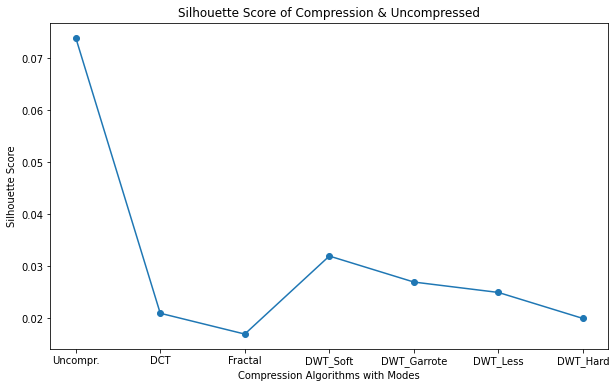

In [ ]:
import matplotlib.pyplot as plt


scores = [0.074, 0.021, 0.017,0.032, 0.027, 0.025, 0.020]
label = ['Uncompr.', 'DCT','Fractal','DWT_Soft', 'DWT_Garrote', 'DWT_Less', 'DWT_Hard']

# Set the figure width and height
plt.figure(figsize=(10, 6))

# Plot the silhouette scores
plt.plot(label, scores, marker='o')

# Add a title and labels to the plot
plt.title("Silhouette Score of Compression & Uncompressed")
plt.xlabel("Compression Algorithms with Modes")
plt.ylabel("Silhouette Score")

# Show the plot
plt.show()

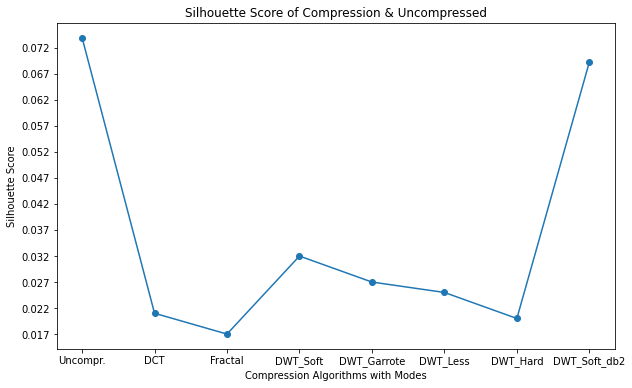

In [ ]:
import matplotlib.pyplot as plt

scores = [0.074, 0.021, 0.017,0.032, 0.027, 0.025, 0.020, 0.06927425737606756]
y = np.array(scores)
label = ['Uncompr.', 'DCT','Fractal','DWT_Soft', 'DWT_Garrote', 'DWT_Less', 'DWT_Hard', 'DWT_Soft_db2']

# Set the figure width and height
plt.figure(figsize=(10, 6))

# Plot the silhouette scores as a line plot
plt.plot(label, scores, marker='o')

# Add a title and labels to the plot
plt.title("Silhouette Score of Compression & Uncompressed")
plt.xlabel("Compression Algorithms with Modes")
plt.ylabel("Silhouette Score")
plt.yticks(np.arange(y.min(), y.max(), 0.005))
# Rotate the x-axis labels to avoid overlap
# plt.xticks(rotation=90)

# Show the plot
plt.show()



**COMPRESSION RATIO GRAPH**

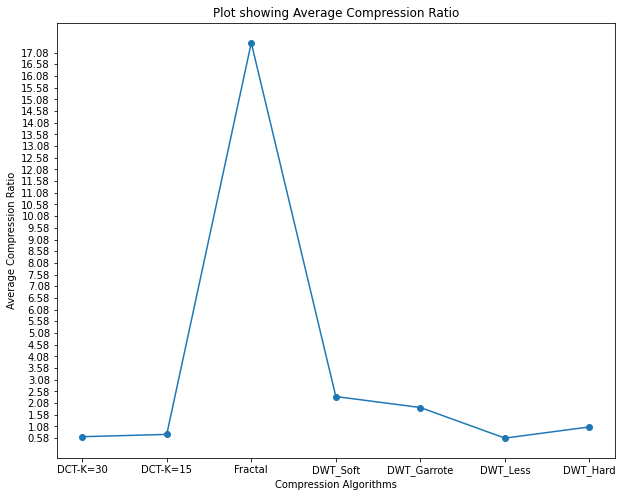

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Avg_compression_ratios = [0.64, 0.74, 17.5, 2.36,1.89, 0.58, 1.06]
y = np.array(Avg_compression_ratios)
label = ['DCT-K=30','DCT-K=15','Fractal','DWT_Soft', 'DWT_Garrote', 'DWT_Less', 'DWT_Hard']

# Set the figure width and height
plt.figure(figsize=(10, 8))

# Plot the silhouette scores
plt.plot(label, Avg_compression_ratios, marker='o')

# Add a title and labels to the plot
plt.title("Plot showing Average Compression Ratio")
plt.xlabel("Compression Algorithms")
plt.ylabel("Average Compression Ratio")
plt.yticks(np.arange(y.min(), y.max(), 0.5))
# Show the plot
plt.show()

**Computing Average SNR**

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from matplotlib.image import imread
from tqdm.notebook import tqdm
import os


dct_compress_path = "/content/drive/MyDrive/dct_images"
uploaded = os.listdir(dct_compress_path)
path = '/content/drive/MyDrive/dct_images/'

total_snr = 0
num_images = len(uploaded)

for filename in uploaded:
  # Load the original image and the compressed image
  original_img = cv2.imread(path + filename)
  compressed_img = cv2.imread("/content/drive/My Drive/compressed_images_15/compressed_" + filename)

  # Calculate the MSE between the original and compressed images
  mse = np.square(original_img - compressed_img).mean()

  # Calculate the SNR for this image
  snr = 10 * np.log10(np.square(original_img).mean() / mse)
  total_snr += snr

# Calculate the average SNR
average_snr = total_snr / num_images
print("Average SNR: {:.2f} dB".format(average_snr))


Average SNR: 1.52 dB


In [ ]:
# Average SNR for k = 30 1.98 dB
# k = 15 1.52 dB

**SNR PLOT**

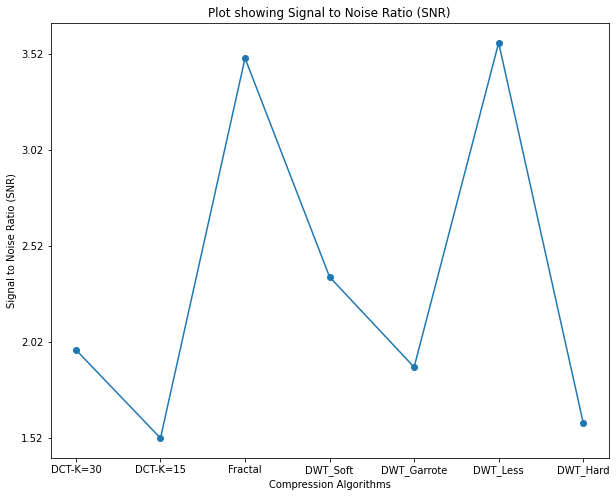

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

SNRs = [1.98, 1.52, 3.50, 2.36, 1.89, 3.58, 1.60]
y = np.array(SNRs)
label = ['DCT-K=30','DCT-K=15','Fractal','DWT_Soft', 'DWT_Garrote', 'DWT_Less', 'DWT_Hard']

# Set the figure width and height
plt.figure(figsize=(10, 8))

# Plot the silhouette scores
plt.plot(label, SNRs, marker='o')

# Add a title and labels to the plot
plt.title("Plot showing Signal to Noise Ratio (SNR)")
plt.xlabel("Compression Algorithms")
plt.ylabel("Signal to Noise Ratio (SNR)")
plt.yticks(np.arange(y.min(), y.max(), .5))
# Show the plot
plt.show()

**Calculating the Bitrate**

In [ ]:
import os
from google.colab import drive

def calculate_bit_rate(folder_path: str, file_name: str) -> float:
    """
    Calculates the bit rate of a compressed image
    :param folder_path: path of the folder on Google Drive where the image file is located
    :param file_name: name of the image file
    :return: bit rate in bits per second
    """
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=True)
    # Construct the full file path
    file_path = os.path.join('/content/drive/My Drive', folder_path, file_name)

    # Get the file size in bytes  
    file_size = os.path.getsize(file_path)

    # Open the image file and get its duration
    with open(file_path, 'rb') as file:
        # get all data in the file
        data = file.read()
        # get the length of data
        data_len = len(data)
        # bitrate calculation 
        bitrate = data_len * 8 / file_size
    return bitrate


In [ ]:
import os
from PIL import Image

def calculate_bit_rate(file_path):
    try:
        with Image.open(file_path) as im:
            width, height = im.size
            #calculate bitrate
            bitrate = (os.path.getsize(file_path) * 8) / (width * height)
            return bitrate
    except IOError:
        print(f"{file_path} is not a valid image file")
        return None

my_upload = '/content/drive/My Drive/compressed_images'

if os.path.exists(my_upload):
    my_files = os.listdir(my_upload)
    bitrate_sum = 0
    image_count = 0
    for my_file in my_files:
        if my_file.endswith(('.jpg','.jpeg','.png','.bmp')):
            file_path = os.path.join(my_upload, my_file)
            bitrate = calculate_bit_rate(file_path)
            if bitrate:
                bitrate_sum += bitrate
                image_count += 1
                print(f"Bit rate of the image {my_file} : {bitrate:.2f} bits per second")
        else:
            print(f"{my_file} is not a supported image format")
    if image_count > 0:
        average_bitrate = bitrate_sum / image_count
        print(f"Average bitrate for the images in the directory: {average_bitrate:.2f} bits per second")
    else:
        print("No image files found in the directory")
else:
    print(f"{my_upload} does not exist")


Bit rate of the image compressed_cat.470.jpg : 1.94 bits per second
Bit rate of the image compressed_cat.472.jpg : 1.74 bits per second
Bit rate of the image compressed_cat.469.jpg : 1.77 bits per second
Bit rate of the image compressed_cat.476.jpg : 2.04 bits per second
Bit rate of the image compressed_cat.468.jpg : 1.79 bits per second
Bit rate of the image compressed_cat.466.jpg : 1.51 bits per second
Bit rate of the image compressed_cat.467.jpg : 2.26 bits per second
Bit rate of the image compressed_cat.465.jpg : 1.92 bits per second
Bit rate of the image compressed_cat.464.jpg : 1.58 bits per second
Bit rate of the image compressed_cat.461.jpg : 1.17 bits per second
Bit rate of the image compressed_cat.460.jpg : 2.51 bits per second
Bit rate of the image compressed_cat.463.jpg : 1.73 bits per second
Bit rate of the image compressed_cat.46.jpg : 2.08 bits per second
Bit rate of the image compressed_cat.462.jpg : 1.27 bits per second
Bit rate of the image compressed_cat.459.jpg : 1.

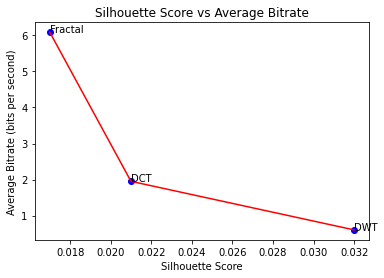

In [ ]:
import matplotlib.pyplot as plt

silhouette_score = [0.017, 0.021, 0.032]
average_bitrate = [6.09, 1.95, 0.60 ]
labels = ['Fractal', 'DCT', 'DWT' ]

# Plot the data
plt.plot(silhouette_score, average_bitrate, 'bo')

# Add a line
plt.plot(silhouette_score, average_bitrate,'r-')

# Add labels and title
plt.xlabel('Silhouette Score')
plt.ylabel('Average Bitrate (bits per second)')
plt.title('Silhouette Score vs Average Bitrate')

# Add labels to the data points
for i, txt in enumerate(labels):
    plt.annotate(txt, (silhouette_score[i], average_bitrate[i]))

# Show the plot
plt.savefig('plot.png')
plt.show()

